In [1]:
# Importing Libraries

import pandas as pd
import numpy as np

from pathlib import Path

from datetime import datetime, date

import matplotlib.pyplot as plt

import statsmodels.api as sm

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)

from sklearn import metrics

# Settings #

In [2]:
# Allow for more info to be displayed when printing
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Load Data #

In [3]:
# DATA_DIR = Path('/Users/mitchleeson/Library/CloudStorage/OneDrive-SharedLibraries-Queen\'sUniversity/GROUP-Dunning-2nd Half - Documents/Assignments/4 MMA831 - Marketing Analytics/Final Term Project/Datasets/Manchali')

# raw = pd.read_excel(DATA_DIR / 'VilMart_2021_2022_V2.xlsx')

raw = pd.read_excel('DunningMMA831.xlsx')

# Data Exploration

In [4]:
raw

,Sl No,Invoice Date,Bill No.,Customer code,Unnamed: 4,HSN Code,Item Name,Main Category,UOM,Price,GST Rate,Sale Qty,Sale Tax Amt,Sale Taxable Value,Sale Amt (After Tax),Profit,Price Per Item (Excluding GST),Tax,Profit earned Item
0,3090,2022-05-01,MART-202105011227,MDY/001/0061,NaN,713.0,Suggi Avarekalu 1 kg,Cereals & Pulses,pcs,102.0,0,200.0,0.00,20400.00,20400,2040.000,102.00,0.00,10.200
1,1714,2022-05-13,MART-202105012592,MDY/001/0092,NaN,1512.0,Sunpure oil 15 ltr Tin,Oil & Ghee,pcs,3150.0,5,5.0,750.00,15000.00,15750,1500.000,2992.50,157.50,299.250
2,333,2022-02-25,MART-202105004641,MDY/001/0371,NaN,NaN,Sunpure Refined - Sunflower Oil 1 L Pouch,Oil & Ghee,Pcs,147.0,0,70.0,0.00,10290.00,10290,1029.000,147.00,0.00,14.700
3,2982,2022-03-02,MART-202105005139,MDY/001/1014,NaN,NaN,Ruchi gold oil 1ltr pouch,Oil & Ghee,pcs,145.0,5,60.0,414.29,8285.71,8700,828.571,137.75,7.25,13.775
4,1771,2022-05-13,MART-202105012536,MDY/001/0092,NaN,NaN,BS Bullet Raw Rice 25 kg,Cereals & Pulses,pcs,1260.0,0,6.0,0.00,7560.00,7560,756.000,1260.00,0.00,126.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133768,2981,2022-09-03,MART-202105024538,MDY/001/1299,NaN,NaN,suggi sugar 1 kg,Salt & Sugar,1 kg,1.0,5,1.0,0.05,0.95,1,0.095,0.95,0.05,0.095
133769,3003,2022-09-03,MART-202105024516,MDY/001/0120,NaN,NaN,suggi sugar 1 kg,Salt & Sugar,1 kg,1.0,5,1.0,0.05,0.95,1,0.095,0.95,0.05,0.095
133770,3158,2022-09-01,MART-202105024361,MDY/001/0107,NaN,NaN,suggi sugar 1 kg,Salt & Sugar,1 kg,1.0,5,1.0,0.05,0.95,1,0.095,0.95,0.05,0.095
133771,3159,2022-09-01,MART-202105024360,MDY/001/0930,NaN,NaN,suggi sugar 1 kg,Salt & Sugar,1 kg,1.0,5,1.0,0.05,0.95,1,0.095,0.95,0.05,0.095


In [5]:
raw.columns = raw.columns.str.replace(' ', '_')

In [6]:
raw.describe()

,Sl_No,Unnamed:_4,HSN_Code,Price,GST_Rate,Sale_Qty,Sale_Tax_Amt,Sale_Taxable_Value,Sale_Amt_(After_Tax),Profit,Price_Per_Item_(Excluding_GST),Tax,Profit_earned_Item
count,133773.000000,0.0,1.177050e+05,133773.000000,133773.000000,133773.000000,133773.000000,133773.000000,133773.000000,133773.000000,133773.000000,133773.000000,133773.000000
mean,1536.995021,NaN,1.314720e+07,65.755413,10.035755,1.718803,6.058833,74.389600,80.449440,7.438960,59.958540,5.796873,5.995854
std,911.980499,NaN,2.781737e+07,118.102473,7.434191,3.317421,11.246830,163.688453,169.844818,16.368845,112.585262,10.837933,11.258526
min,1.000000,NaN,1.010000e+02,0.850000,0.000000,0.070000,0.000000,0.720000,1.000000,0.072000,0.697000,0.000000,0.069700
25%,762.000000,NaN,1.905000e+03,10.000000,5.000000,1.000000,0.620000,17.140000,20.000000,1.714000,10.000000,0.500000,1.000000
50%,1531.000000,NaN,2.105000e+06,38.000000,12.000000,1.000000,2.750000,40.180000,44.000000,4.018000,34.440000,2.000000,3.444000
75%,2266.000000,NaN,2.005200e+07,75.000000,18.000000,1.000000,7.320000,80.000000,89.000000,8.000000,66.500000,6.840000,6.650000
max,3336.000000,NaN,9.619000e+08,3150.000000,40.000000,242.000000,755.080000,20400.000000,20400.000000,2040.000000,2992.500000,539.820000,299.250000


In [7]:
raw.head()

,Sl_No,Invoice_Date,Bill_No.,Customer_code,Unnamed:_4,HSN_Code,Item_Name,Main_Category,UOM,Price,GST_Rate,Sale_Qty,Sale_Tax_Amt,Sale_Taxable_Value,Sale_Amt_(After_Tax),Profit,Price_Per_Item_(Excluding_GST),Tax,Profit_earned_Item
0,3090,2022-05-01,MART-202105011227,MDY/001/0061,NaN,713.0,Suggi Avarekalu 1 kg,Cereals & Pulses,pcs,102.0,0,200.0,0.00,20400.00,20400,2040.000,102.00,0.00,10.200
1,1714,2022-05-13,MART-202105012592,MDY/001/0092,NaN,1512.0,Sunpure oil 15 ltr Tin,Oil & Ghee,pcs,3150.0,5,5.0,750.00,15000.00,15750,1500.000,2992.50,157.50,299.250
2,333,2022-02-25,MART-202105004641,MDY/001/0371,NaN,NaN,Sunpure Refined - Sunflower Oil 1 L Pouch,Oil & Ghee,Pcs,147.0,0,70.0,0.00,10290.00,10290,1029.000,147.00,0.00,14.700
3,2982,2022-03-02,MART-202105005139,MDY/001/1014,NaN,NaN,Ruchi gold oil 1ltr pouch,Oil & Ghee,pcs,145.0,5,60.0,414.29,8285.71,8700,828.571,137.75,7.25,13.775
4,1771,2022-05-13,MART-202105012536,MDY/001/0092,NaN,NaN,BS Bullet Raw Rice 25 kg,Cereals & Pulses,pcs,1260.0,0,6.0,0.00,7560.00,7560,756.000,1260.00,0.00,126.000


In [8]:
raw['HSN_Code'].value_counts(dropna = False)

NaN           16068
713.0          7125
19053100.0     5577
1905.0         5117
3401.0         4767
              ...  
1513.0            1
80328129.0        1
80708750.0        1
9101040.0         1
3919.0            1
Name: HSN_Code, Length: 640, dtype: int64

In [9]:
raw.dtypes.value_counts()

float64           10
object             5
int64              3
datetime64[ns]     1
dtype: int64

In [10]:
raw.select_dtypes(object).head()

,Bill_No.,Customer_code,Item_Name,Main_Category,UOM
0,MART-202105011227,MDY/001/0061,Suggi Avarekalu 1 kg,Cereals & Pulses,pcs
1,MART-202105012592,MDY/001/0092,Sunpure oil 15 ltr Tin,Oil & Ghee,pcs
2,MART-202105004641,MDY/001/0371,Sunpure Refined - Sunflower Oil 1 L Pouch,Oil & Ghee,Pcs
3,MART-202105005139,MDY/001/1014,Ruchi gold oil 1ltr pouch,Oil & Ghee,pcs
4,MART-202105012536,MDY/001/0092,BS Bullet Raw Rice 25 kg,Cereals & Pulses,pcs


In [11]:
raw['Customer_code'].nunique()

3510

In [12]:
raw['Main_Category'].nunique()

34

In [13]:
# Top categories
categories = raw.groupby('Main_Category')
categories = categories[['Sale_Qty', 'Sale_Amt_(After_Tax)']].aggregate(np.sum)
categories.sort_values(by=['Sale_Amt_(After_Tax)'], ascending = False)

,Sale_Qty,Sale_Amt_(After_Tax)
Main_Category,,
Oil & Ghee,11681.200000,1982182
Cereals & Pulses,14580.580000,1740485
Soaps & Detergents,59058.831000,1479366
House hold & Stationary,14292.613000,915122
Spices Masala & Dry fruits,15713.069989,713556
Coffee Tea & Beverages,22975.000000,651555
personal hygiene materials and products,7857.000000,566986
Biscuits Choclates & Snacks,40098.303000,564034
Atta Flour & Sooji,7130.000000,489280


In [14]:
# Top Products
products = raw.groupby('Item_Name')
products = products[['Sale_Qty', 'Sale_Amt_(After_Tax)']].aggregate(np.sum)
products['total_rev'] = products['Sale_Amt_(After_Tax)']
pd.DataFrame(products)
products.sort_values(by=['Sale_Qty'], ascending = False)

,Sale_Qty,Sale_Amt_(After_Tax),total_rev
Item_Name,,,
Clinic Plus Strong &Long Shampoo 6.5 ml,5350.000,5268,5268
Nescafe Sunrise 2.2 gm,3658.000,7316,7316
Sunpure Refined - Sunflower Oil 1 L Pouch,2411.000,394410,394410
Suggi Sugar 1 kg,2387.000,94929,94929
Dove Hair Fall Rescue Shampoo 6 ml,2079.000,4158,4158
...,...,...,...
Chilli Sause,0.250,53,53
Black Rose,0.200,42,42
MTR Bisi Bele Bath Powder 10Rs,0.159,16,16


## Adding Information / Features to raw data ##

In [15]:
# Add day of week
raw['day_of_week'] = raw['Invoice_Date'].apply(date.isoweekday)

In [16]:
def f(row):
    if row['day_of_week'] > 5 :
        val = 1
    else:
        val = 0
    return val
    
raw['weekend'] = raw.apply(f, axis=1)

# Make DIM table #

In [17]:
# Make new df of unique 'Customer code' values
Cust = pd.DataFrame(set(raw['Customer_code']))

In [18]:
# Set column name to be 'Customer code'
Cust = Cust.rename(columns={0: 'Customer_code'})

In [19]:
Cust.reset_index()

,index,Customer_code
0,0,MDY/001/0150
1,1,MDY/001/0040
2,2,MDY/001/3085
3,3,MDY/001/1623
4,4,MDY/001/2628
...,...,...
3505,3505,MDY/001/2612
3506,3506,MDY/001/3129
3507,3507,MDY/001/1154
3508,3508,MDY/001/1912


In [20]:
# Check to make sure I have same number of unique values of 'Customer code'
a = raw['Customer_code'].nunique()
b = Cust['Customer_code'].nunique()

if a == b:
    print(True)
else:
    print(False)

True


# Features #

In [21]:
# Sum counts for Qty and revenue/price columns
sum_counts = raw.groupby('Customer_code')
sum_counts = sum_counts[['Sale_Qty', 'Sale_Amt_(After_Tax)']].aggregate(np.sum)
sum_counts = sum_counts.rename(columns={'Sale_Amt_(After_Tax)': 'total_rev'})
pd.DataFrame(sum_counts)
sum_counts = sum_counts.reset_index()

In [22]:
# Sum counts for Qty and revenue/price columns on WEEKENDS
filter_weekend = raw.loc[raw['weekend'] == 1]
sum_counts_weekend = filter_weekend.groupby('Customer_code')
sum_counts_weekend = sum_counts_weekend[['Sale_Qty', 'Sale_Amt_(After_Tax)']].aggregate(np.sum)
sum_counts_weekend = sum_counts_weekend.rename(columns={'Sale_Qty': 'Sale_Qty_weekend', 
                                                        'Sale_Amt_(After_Tax)': 'total_rev_weekend'})
pd.DataFrame(sum_counts_weekend)
sum_counts_weekend = sum_counts_weekend.reset_index()

In [23]:
# Transaction count
transaction_count = pd.DataFrame(raw.groupby(by = 'Customer_code').aggregate('Bill_No.').count())
transaction_count = transaction_count.rename(columns={'Bill_No.': 'transaction_count'})
pd.DataFrame(transaction_count)
transaction_count = transaction_count.reset_index()

In [24]:
# Transaction count on WEEKENDS
transaction_count_weekend = pd.DataFrame(filter_weekend.groupby(by = 'Customer_code').aggregate('Bill_No.').count())
transaction_count_weekend = transaction_count_weekend.rename(columns={'Bill_No.': 'transaction_count_weekend'})
pd.DataFrame(transaction_count_weekend)
transaction_count_weekend = transaction_count_weekend.reset_index()

In [25]:
# Unique items purchased 
unique_items = pd.DataFrame(raw.groupby(by = 'Customer_code').aggregate('Item_Name').nunique())
unique_items = unique_items.rename(columns={'Item_Name': 'unique_items'})
pd.DataFrame(unique_items)
unique_items = unique_items.reset_index()

### Quantity per category ###

In [26]:
# Qty of category = 'Soaps & Detergents'
Soaps_Q = pd.DataFrame(raw.loc[raw['Main_Category'] == 'Soaps & Detergents', :].groupby(by = 'Customer_code').aggregate('Sale_Qty').sum())
Soaps_Q = Soaps_Q.rename(columns={'Sale_Qty': 'Sale_Qty_cat_Soaps'})
pd.DataFrame(Soaps_Q)
Soaps_Q = Soaps_Q.reset_index()

In [27]:
# Qty of category = 'Cereals & Pulses'
Cereals_Q = pd.DataFrame(raw.loc[raw['Main_Category'] == 'Cereals & Pulses', :].groupby(by = 'Customer_code').aggregate('Sale_Qty').sum())
Cereals_Q = Cereals_Q.rename(columns={'Sale_Qty': 'Sale_Qty_cat_Cereals'})
pd.DataFrame(Cereals_Q)
Cereals_Q = Cereals_Q.reset_index()

In [28]:
# Qty of category = 'Biscuits Choclates & Snacks'
Biscuits_Q = pd.DataFrame(raw.loc[raw['Main_Category'] == 'Biscuits Choclates & Snacks', :].groupby(by = 'Customer_code').aggregate('Sale_Qty').sum())
Biscuits_Q = Biscuits_Q.rename(columns={'Sale_Qty': 'Sale_Qty_cat_Biscuits'})
pd.DataFrame(Biscuits_Q)
Biscuits_Q = Biscuits_Q.reset_index()

In [29]:
# Qty of category = 'Oil & Ghee'
Oils_Q = pd.DataFrame(raw.loc[raw['Main_Category'] == 'Oil & Ghee', :].groupby(by = 'Customer_code').aggregate('Sale_Qty').sum())
Oils_Q = Oils_Q.rename(columns={'Sale_Qty': 'Sale_Qty_cat_Oils'})
pd.DataFrame(Oils_Q)
Oils_Q = Oils_Q.reset_index()

In [30]:
# Qty of category = 'Coffee Tea & Beverages'
Coffee_Q = pd.DataFrame(raw.loc[raw['Main_Category'] == 'Coffee Tea & Beverages', :].groupby(by = 'Customer_code').aggregate('Sale_Qty').sum())
Coffee_Q = Coffee_Q.rename(columns={'Sale_Qty': 'Sale_Qty_cat_Coffee'})
pd.DataFrame(Coffee_Q)
Coffee_Q = Coffee_Q.reset_index()

In [31]:
# Qty of category = 'House hold & Stationary'
Stationary_Q = pd.DataFrame(raw.loc[raw['Main_Category'] == 'House hold & Stationary', :].groupby(by = 'Customer_code').aggregate('Sale_Qty').sum())
Stationary_Q = Stationary_Q.rename(columns={'Sale_Qty': 'Sale_Qty_cat_Stationary'})
pd.DataFrame(Stationary_Q)
Stationary_Q = Stationary_Q.reset_index()

In [32]:
# Qty of category = 'Spices Masala & Dry fruits'
Spices_Q = pd.DataFrame(raw.loc[raw['Main_Category'] == 'Spices Masala & Dry fruits', :].groupby(by = 'Customer_code').aggregate('Sale_Qty').sum())
Spices_Q = Spices_Q.rename(columns={'Sale_Qty': 'Sale_Qty_cat_Spices'})
pd.DataFrame(Spices_Q)
Spices_Q = Spices_Q.reset_index()

In [33]:
# Qty of category = 'personal hygiene materials and products'
P_Hygiene_Q = pd.DataFrame(raw.loc[raw['Main_Category'] == 'personal hygiene materials and products', :].groupby(by = 'Customer_code').aggregate('Sale_Qty').sum())
P_Hygiene_Q = P_Hygiene_Q.rename(columns={'Sale_Qty': 'Sale_Qty_cat_P_Hygiene'})
pd.DataFrame(P_Hygiene_Q)
P_Hygiene_Q = P_Hygiene_Q.reset_index()

In [34]:
# Qty of category = 'Atta Flour & Sooji'
Flour_Q = pd.DataFrame(raw.loc[raw['Main_Category'] == 'Atta Flour & Sooji', :].groupby(by = 'Customer_code').aggregate('Sale_Qty').sum())
Flour_Q = Flour_Q.rename(columns={'Sale_Qty': 'Sale_Qty_cat_Flour'})
pd.DataFrame(Flour_Q)
Flour_Q = Flour_Q.reset_index()

In [35]:
# Qty of category = 'Grocery'
Grocery_Q = pd.DataFrame(raw.loc[raw['Main_Category'] == 'Grocery', :].groupby(by = 'Customer_code').aggregate('Sale_Qty').sum())
Grocery_Q = Grocery_Q.rename(columns={'Sale_Qty': 'Sale_Qty_cat_Grocery'})
pd.DataFrame(Grocery_Q)
Grocery_Q = Grocery_Q.reset_index()

In [36]:
# Qty of category = 'Salt & Sugar'
Salt_Sugar_Q = pd.DataFrame(raw.loc[raw['Main_Category'] == 'Salt & Sugar', :].groupby(by = 'Customer_code').aggregate('Sale_Qty').sum())
Salt_Sugar_Q = Salt_Sugar_Q.rename(columns={'Sale_Qty': 'Sale_Qty_cat_Salt_Sugar'})
pd.DataFrame(Salt_Sugar_Q)
Salt_Sugar_Q = Salt_Sugar_Q.reset_index()

In [37]:
# Qty of category = 'Grocery - Daily'
Grocery_Daily_Q = pd.DataFrame(raw.loc[raw['Main_Category'] == 'Grocery - Daily', :].groupby(by = 'Customer_code').aggregate('Sale_Qty').sum())
Grocery_Daily_Q = Grocery_Daily_Q.rename(columns={'Sale_Qty': 'Sale_Qty_cat_Grocery_Daily'})
pd.DataFrame(Grocery_Daily_Q)
Grocery_Daily_Q = Grocery_Daily_Q.reset_index()

In [38]:
# Qty of category = 'Frozen Dessert'
Frozen_Dessert_Q = pd.DataFrame(raw.loc[raw['Main_Category'] == 'Frozen Dessert', :].groupby(by = 'Customer_code').aggregate('Sale_Qty').sum())
Frozen_Dessert_Q = Frozen_Dessert_Q.rename(columns={'Sale_Qty': 'Sale_Qty_cat_Frozen_Dessert'})
pd.DataFrame(Frozen_Dessert_Q)
Frozen_Dessert_Q = Frozen_Dessert_Q.reset_index()

In [39]:
# Qty of category = 'Packaged Food'
Packaged_Food_Q = pd.DataFrame(raw.loc[raw['Main_Category'] == 'Packaged Food', :].groupby(by = 'Customer_code').aggregate('Sale_Qty').sum())
Packaged_Food_Q = Packaged_Food_Q.rename(columns={'Sale_Qty': 'Sale_Qty_cat_Packaged_Food'})
pd.DataFrame(Packaged_Food_Q)
Packaged_Food_Q = Packaged_Food_Q.reset_index()

In [40]:
# Qty of category = 'Baby Products'
Baby_Products_Q = pd.DataFrame(raw.loc[raw['Main_Category'] == 'Baby Products', :].groupby(by = 'Customer_code').aggregate('Sale_Qty').sum())
Baby_Products_Q = Baby_Products_Q.rename(columns={'Sale_Qty': 'Sale_Qty_cat_Baby_Products'})
pd.DataFrame(Baby_Products_Q)
Baby_Products_Q = Baby_Products_Q.reset_index()

### Rev per category ###

In [41]:
# Rev of category = 'Soaps & Detergents'
Soaps_R = pd.DataFrame(raw.loc[raw['Main_Category'] == 'Soaps & Detergents', :].groupby(by = 'Customer_code').aggregate('Sale_Amt_(After_Tax)').sum())
Soaps_R = Soaps_R.rename(columns={'Sale_Amt_(After_Tax)': 'Rev_cat_Soaps'})
pd.DataFrame(Soaps_R)
Soaps_R = Soaps_R.reset_index()

In [42]:
# Rev of category = 'Cereals & Pulses'
Cereals_R = pd.DataFrame(raw.loc[raw['Main_Category'] == 'Cereals & Pulses', :].groupby(by = 'Customer_code').aggregate('Sale_Amt_(After_Tax)').sum())
Cereals_R = Cereals_R.rename(columns={'Sale_Amt_(After_Tax)': 'Rev_cat_Cereals'})
pd.DataFrame(Cereals_R)
Cereals_R = Cereals_R.reset_index()

In [43]:
# Rev of category = 'Biscuits Choclates & Snacks'
Biscuits_R = pd.DataFrame(raw.loc[raw['Main_Category'] == 'Biscuits Choclates & Snacks', :].groupby(by = 'Customer_code').aggregate('Sale_Amt_(After_Tax)').sum())
Biscuits_R = Biscuits_R.rename(columns={'Sale_Amt_(After_Tax)': 'Rev_cat_Biscuits'})
pd.DataFrame(Biscuits_R)
Biscuits_R = Biscuits_R.reset_index()

In [44]:
# Rev of category = 'Oil & Ghee'
Oils_R = pd.DataFrame(raw.loc[raw['Main_Category'] == 'Oil & Ghee', :].groupby(by = 'Customer_code').aggregate('Sale_Amt_(After_Tax)').sum())
Oils_R = Oils_R.rename(columns={'Sale_Amt_(After_Tax)': 'Rev_cat_Oils'})
pd.DataFrame(Oils_R)
Oils_R = Oils_R.reset_index()

In [45]:
# Rev of category = 'Coffee Tea & Beverages'
Coffee_R = pd.DataFrame(raw.loc[raw['Main_Category'] == 'Coffee Tea & Beverages', :].groupby(by = 'Customer_code').aggregate('Sale_Amt_(After_Tax)').sum())
Coffee_R = Coffee_R.rename(columns={'Sale_Amt_(After_Tax)': 'Rev_cat_Coffee'})
pd.DataFrame(Coffee_R)
Coffee_R = Coffee_R.reset_index()

In [46]:
# Rev of category = 'House hold & Stationary'
Stationary_R = pd.DataFrame(raw.loc[raw['Main_Category'] == 'House hold & Stationary', :].groupby(by = 'Customer_code').aggregate('Sale_Amt_(After_Tax)').sum())
Stationary_R = Stationary_R.rename(columns={'Sale_Amt_(After_Tax)': 'Rev_cat_Stationary'})
pd.DataFrame(Stationary_R)
Stationary_R = Stationary_R.reset_index()

In [47]:
# Rev of category = 'Spices Masala & Dry fruits'
Spices_R = pd.DataFrame(raw.loc[raw['Main_Category'] == 'Spices Masala & Dry fruits', :].groupby(by = 'Customer_code').aggregate('Sale_Amt_(After_Tax)').sum())
Spices_R = Spices_R.rename(columns={'Sale_Amt_(After_Tax)': 'Rev_cat_Spices'})
pd.DataFrame(Spices_R)
Spices_R = Spices_R.reset_index()

In [48]:
# Rev of category = 'personal hygiene materials and products'
P_Hygiene_R = pd.DataFrame(raw.loc[raw['Main_Category'] == 'personal hygiene materials and products', :].groupby(by = 'Customer_code').aggregate('Sale_Amt_(After_Tax)').sum())
P_Hygiene_R = P_Hygiene_R.rename(columns={'Sale_Amt_(After_Tax)': 'Rev_cat_P_Hygiene'})
pd.DataFrame(P_Hygiene_R)
P_Hygiene_R = P_Hygiene_R.reset_index()

In [49]:
# Rev of category = 'Atta Flour & Sooji'
Flour_R = pd.DataFrame(raw.loc[raw['Main_Category'] == 'Atta Flour & Sooji', :].groupby(by = 'Customer_code').aggregate('Sale_Amt_(After_Tax)').sum())
Flour_R = Flour_R.rename(columns={'Sale_Amt_(After_Tax)': 'Rev_cat_Flour'})
pd.DataFrame(Flour_R)
Flour_R = Flour_R.reset_index()

In [50]:
# Rev of category = 'Grocery'
Grocery_R = pd.DataFrame(raw.loc[raw['Main_Category'] == 'Grocery', :].groupby(by = 'Customer_code').aggregate('Sale_Amt_(After_Tax)').sum())
Grocery_R = Grocery_R.rename(columns={'Sale_Amt_(After_Tax)': 'Rev_cat_Grocery'})
pd.DataFrame(Grocery_R)
Grocery_R = Grocery_R.reset_index()

In [51]:
# Rev of category = 'Salt & Sugar'
Salt_Sugar_R = pd.DataFrame(raw.loc[raw['Main_Category'] == 'Salt & Sugar', :].groupby(by = 'Customer_code').aggregate('Sale_Amt_(After_Tax)').sum())
Salt_Sugar_R = Salt_Sugar_R.rename(columns={'Sale_Amt_(After_Tax)': 'Rev_cat_Salt_Sugar'})
pd.DataFrame(Salt_Sugar_R)
Salt_Sugar_R = Salt_Sugar_R.reset_index()

In [52]:
# Rev of category = 'Grocery - Daily'
Grocery_Daily_R = pd.DataFrame(raw.loc[raw['Main_Category'] == 'Grocery - Daily', :].groupby(by = 'Customer_code').aggregate('Sale_Amt_(After_Tax)').sum())
Grocery_Daily_R = Grocery_Daily_R.rename(columns={'Sale_Amt_(After_Tax)': 'Rev_cat_Grocery_Daily'})
pd.DataFrame(Grocery_Daily_R)
Grocery_Daily_R = Grocery_Daily_R.reset_index()

In [53]:
# Rev of category = 'Frozen Dessert'
Frozen_Dessert_R = pd.DataFrame(raw.loc[raw['Main_Category'] == 'Frozen Dessert', :].groupby(by = 'Customer_code').aggregate('Sale_Amt_(After_Tax)').sum())
Frozen_Dessert_R = Frozen_Dessert_R.rename(columns={'Sale_Amt_(After_Tax)': 'Rev_cat_Frozen_Dessert'})
pd.DataFrame(Frozen_Dessert_R)
Frozen_Dessert_R = Frozen_Dessert_R.reset_index()

In [54]:
# Rev of category = 'Packaged Food'
Packaged_Food_R = pd.DataFrame(raw.loc[raw['Main_Category'] == 'Packaged Food', :].groupby(by = 'Customer_code').aggregate('Sale_Amt_(After_Tax)').sum())
Packaged_Food_R = Packaged_Food_R.rename(columns={'Sale_Amt_(After_Tax)': 'Rev_cat_Packaged_Food'})
pd.DataFrame(Packaged_Food_R)
Packaged_Food_R = Packaged_Food_R.reset_index()

In [55]:
# Rev of category = 'Baby Products'
Baby_Products_R = pd.DataFrame(raw.loc[raw['Main_Category'] == 'Baby Products', :].groupby(by = 'Customer_code').aggregate('Sale_Amt_(After_Tax)').sum())
Baby_Products_R = Baby_Products_R.rename(columns={'Sale_Amt_(After_Tax)': 'Rev_cat_Baby_Products'})
pd.DataFrame(Baby_Products_R)
Baby_Products_R = Baby_Products_R.reset_index()

# Joining Features # 

In [56]:
# # trick to combine all at once?? 
# # https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns

merge = [sum_counts, sum_counts_weekend, transaction_count, transaction_count_weekend, unique_items,
         Soaps_Q, Soaps_R, Cereals_Q, Cereals_R, Biscuits_Q, Biscuits_R, Oils_Q, Oils_R, Coffee_Q, Coffee_R, 
         Stationary_Q, Stationary_R, Spices_Q, Spices_R, P_Hygiene_Q, P_Hygiene_R, Flour_Q, Flour_R, 
         Grocery_Q, Grocery_R, Salt_Sugar_Q, Salt_Sugar_R, Grocery_Daily_Q, Grocery_Daily_R, Frozen_Dessert_Q,
         Frozen_Dessert_R, Packaged_Food_Q, Packaged_Food_R, Baby_Products_Q, Baby_Products_R]

merge = [df.set_index("Customer_code") for df in merge]
merge = merge[0].join(merge[1:])
merge = merge.fillna(0)

In [57]:
merge

,Sale_Qty,total_rev,Sale_Qty_weekend,total_rev_weekend,transaction_count,transaction_count_weekend,unique_items,Sale_Qty_cat_Soaps,Rev_cat_Soaps,Sale_Qty_cat_Cereals,Rev_cat_Cereals,Sale_Qty_cat_Biscuits,Rev_cat_Biscuits,Sale_Qty_cat_Oils,Rev_cat_Oils,Sale_Qty_cat_Coffee,Rev_cat_Coffee,Sale_Qty_cat_Stationary,Rev_cat_Stationary,Sale_Qty_cat_Spices,Rev_cat_Spices,Sale_Qty_cat_P_Hygiene,Rev_cat_P_Hygiene,Sale_Qty_cat_Flour,Rev_cat_Flour,Sale_Qty_cat_Grocery,Rev_cat_Grocery,Sale_Qty_cat_Salt_Sugar,Rev_cat_Salt_Sugar,Sale_Qty_cat_Grocery_Daily,Rev_cat_Grocery_Daily,Sale_Qty_cat_Frozen_Dessert,Rev_cat_Frozen_Dessert,Sale_Qty_cat_Packaged_Food,Rev_cat_Packaged_Food,Sale_Qty_cat_Baby_Products,Rev_cat_Baby_Products
Customer_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
MDY/001/0001,42.0,965,13.0,505.0,31,11.0,29,4.0,208.0,0.0,0.0,18.0,140.0,1.0,204.0,7.0,138.0,1.0,15.0,2.00,10.0,1.0,23.0,0.0,0.0,2.0,20.0,1.0,55.0,0.0,0.0,4.0,70.0,0.0,0.0,0.0,0.0
MDY/001/0002,813.0,20631,336.0,7231.0,240,90.0,170,286.0,5092.0,32.0,3239.0,31.0,372.0,17.0,3361.0,345.0,1553.0,8.0,531.0,21.00,1665.0,18.0,1795.0,9.0,1008.0,4.0,305.0,16.0,529.0,18.0,857.0,0.0,0.0,0.0,0.0,0.0,0.0
MDY/001/0003,274.0,17017,128.0,6276.0,171,69.0,149,86.0,1827.0,25.0,3460.0,20.0,821.0,12.0,2151.0,23.0,2026.0,26.0,2437.0,31.00,1119.0,9.0,891.0,6.0,259.0,9.0,627.0,12.0,461.0,4.0,314.0,6.0,314.0,0.0,0.0,0.0,0.0
MDY/001/0004,124.0,5342,30.0,1609.0,92,20.0,81,15.0,886.0,3.0,161.0,43.0,581.0,5.0,809.0,11.0,795.0,6.0,336.0,8.00,374.0,3.0,169.0,6.0,252.0,1.0,58.0,4.0,156.0,1.0,27.0,11.0,302.0,0.0,0.0,1.0,25.0
MDY/001/0005,659.0,42433,182.0,10788.0,473,117.0,355,127.0,10098.0,85.0,5340.0,54.0,980.0,36.0,6346.0,40.0,2998.0,80.0,3201.0,39.25,2888.0,32.0,2830.0,28.0,1451.0,45.0,2825.0,24.0,791.0,32.0,1275.0,9.0,493.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MDY/001/3507,3.0,48,0.0,0.0,2,0.0,2,0.0,0.0,0.0,0.0,3.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MDY/001/3508,1.0,10,0.0,0.0,1,0.0,1,0.0,0.0,0.0,0.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MDY/001/3509,2.0,70,0.0,0.0,2,0.0,2,1.0,65.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
# Creating 'other' bucket by subtracting sales quantity of each category minus total sales quantity
cols_Q = ['Sale_Qty_cat_Soaps', 'Sale_Qty_cat_Cereals', 'Sale_Qty_cat_Biscuits', 'Sale_Qty_cat_Oils',
        'Sale_Qty_cat_Coffee', 'Sale_Qty_cat_Stationary', 'Sale_Qty_cat_Spices', 'Sale_Qty_cat_P_Hygiene',
        'Sale_Qty_cat_Flour', 'Sale_Qty_cat_Grocery', 'Sale_Qty_cat_Salt_Sugar', 'Sale_Qty_cat_Grocery_Daily',
        'Sale_Qty_cat_Frozen_Dessert', 'Sale_Qty_cat_Packaged_Food', 'Sale_Qty_cat_Baby_Products']

merge['Sale_Qty_cat_Other'] = merge['Sale_Qty'] - merge[cols_Q].sum(axis=1)

cols_R = ['Rev_cat_Soaps', 'Rev_cat_Cereals', 'Rev_cat_Biscuits', 'Rev_cat_Oils',
        'Rev_cat_Coffee', 'Rev_cat_Stationary', 'Rev_cat_Spices', 'Rev_cat_P_Hygiene',
        'Rev_cat_Flour', 'Rev_cat_Grocery', 'Rev_cat_Salt_Sugar', 'Rev_cat_Grocery_Daily',
        'Rev_cat_Frozen_Dessert', 'Rev_cat_Packaged_Food', 'Rev_cat_Baby_Products']

merge['Rev_cat_Other'] = merge['total_rev'] - merge[cols_R].sum(axis=1)

In [59]:
merge.reset_index()

,Customer_code,Sale_Qty,total_rev,Sale_Qty_weekend,total_rev_weekend,transaction_count,transaction_count_weekend,unique_items,Sale_Qty_cat_Soaps,Rev_cat_Soaps,Sale_Qty_cat_Cereals,Rev_cat_Cereals,Sale_Qty_cat_Biscuits,Rev_cat_Biscuits,Sale_Qty_cat_Oils,Rev_cat_Oils,Sale_Qty_cat_Coffee,Rev_cat_Coffee,Sale_Qty_cat_Stationary,Rev_cat_Stationary,Sale_Qty_cat_Spices,Rev_cat_Spices,Sale_Qty_cat_P_Hygiene,Rev_cat_P_Hygiene,Sale_Qty_cat_Flour,Rev_cat_Flour,Sale_Qty_cat_Grocery,Rev_cat_Grocery,Sale_Qty_cat_Salt_Sugar,Rev_cat_Salt_Sugar,Sale_Qty_cat_Grocery_Daily,Rev_cat_Grocery_Daily,Sale_Qty_cat_Frozen_Dessert,Rev_cat_Frozen_Dessert,Sale_Qty_cat_Packaged_Food,Rev_cat_Packaged_Food,Sale_Qty_cat_Baby_Products,Rev_cat_Baby_Products,Sale_Qty_cat_Other,Rev_cat_Other
0,MDY/001/0001,42.0,965,13.0,505.0,31,11.0,29,4.0,208.0,0.0,0.0,18.0,140.0,1.0,204.0,7.0,138.0,1.0,15.0,2.00,10.0,1.0,23.0,0.0,0.0,2.0,20.0,1.0,55.0,0.0,0.0,4.0,70.0,0.0,0.0,0.0,0.0,1.00,82.0
1,MDY/001/0002,813.0,20631,336.0,7231.0,240,90.0,170,286.0,5092.0,32.0,3239.0,31.0,372.0,17.0,3361.0,345.0,1553.0,8.0,531.0,21.00,1665.0,18.0,1795.0,9.0,1008.0,4.0,305.0,16.0,529.0,18.0,857.0,0.0,0.0,0.0,0.0,0.0,0.0,8.00,324.0
2,MDY/001/0003,274.0,17017,128.0,6276.0,171,69.0,149,86.0,1827.0,25.0,3460.0,20.0,821.0,12.0,2151.0,23.0,2026.0,26.0,2437.0,31.00,1119.0,9.0,891.0,6.0,259.0,9.0,627.0,12.0,461.0,4.0,314.0,6.0,314.0,0.0,0.0,0.0,0.0,5.00,310.0
3,MDY/001/0004,124.0,5342,30.0,1609.0,92,20.0,81,15.0,886.0,3.0,161.0,43.0,581.0,5.0,809.0,11.0,795.0,6.0,336.0,8.00,374.0,3.0,169.0,6.0,252.0,1.0,58.0,4.0,156.0,1.0,27.0,11.0,302.0,0.0,0.0,1.0,25.0,6.00,411.0
4,MDY/001/0005,659.0,42433,182.0,10788.0,473,117.0,355,127.0,10098.0,85.0,5340.0,54.0,980.0,36.0,6346.0,40.0,2998.0,80.0,3201.0,39.25,2888.0,32.0,2830.0,28.0,1451.0,45.0,2825.0,24.0,791.0,32.0,1275.0,9.0,493.0,0.0,0.0,0.0,0.0,27.75,917.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3505,MDY/001/3507,3.0,48,0.0,0.0,2,0.0,2,0.0,0.0,0.0,0.0,3.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
3506,MDY/001/3508,1.0,10,0.0,0.0,1,0.0,1,0.0,0.0,0.0,0.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
3507,MDY/001/3509,2.0,70,0.0,0.0,2,0.0,2,1.0,65.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
3508,MDY/001/3510,8.0,106,0.0,0.0,4,0.0,4,7.0,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0


## Additional features ##

In [60]:
# Average order value
merge['aov'] = merge['total_rev'] / merge['transaction_count']

In [61]:
# units per transaction
merge['upt'] = merge['Sale_Qty'] / merge['transaction_count']

In [62]:
merge

,Sale_Qty,total_rev,Sale_Qty_weekend,total_rev_weekend,transaction_count,transaction_count_weekend,unique_items,Sale_Qty_cat_Soaps,Rev_cat_Soaps,Sale_Qty_cat_Cereals,Rev_cat_Cereals,Sale_Qty_cat_Biscuits,Rev_cat_Biscuits,Sale_Qty_cat_Oils,Rev_cat_Oils,Sale_Qty_cat_Coffee,Rev_cat_Coffee,Sale_Qty_cat_Stationary,Rev_cat_Stationary,Sale_Qty_cat_Spices,Rev_cat_Spices,Sale_Qty_cat_P_Hygiene,Rev_cat_P_Hygiene,Sale_Qty_cat_Flour,Rev_cat_Flour,Sale_Qty_cat_Grocery,Rev_cat_Grocery,Sale_Qty_cat_Salt_Sugar,Rev_cat_Salt_Sugar,Sale_Qty_cat_Grocery_Daily,Rev_cat_Grocery_Daily,Sale_Qty_cat_Frozen_Dessert,Rev_cat_Frozen_Dessert,Sale_Qty_cat_Packaged_Food,Rev_cat_Packaged_Food,Sale_Qty_cat_Baby_Products,Rev_cat_Baby_Products,Sale_Qty_cat_Other,Rev_cat_Other,aov,upt
Customer_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
MDY/001/0001,42.0,965,13.0,505.0,31,11.0,29,4.0,208.0,0.0,0.0,18.0,140.0,1.0,204.0,7.0,138.0,1.0,15.0,2.00,10.0,1.0,23.0,0.0,0.0,2.0,20.0,1.0,55.0,0.0,0.0,4.0,70.0,0.0,0.0,0.0,0.0,1.00,82.0,31.129032,1.354839
MDY/001/0002,813.0,20631,336.0,7231.0,240,90.0,170,286.0,5092.0,32.0,3239.0,31.0,372.0,17.0,3361.0,345.0,1553.0,8.0,531.0,21.00,1665.0,18.0,1795.0,9.0,1008.0,4.0,305.0,16.0,529.0,18.0,857.0,0.0,0.0,0.0,0.0,0.0,0.0,8.00,324.0,85.962500,3.387500
MDY/001/0003,274.0,17017,128.0,6276.0,171,69.0,149,86.0,1827.0,25.0,3460.0,20.0,821.0,12.0,2151.0,23.0,2026.0,26.0,2437.0,31.00,1119.0,9.0,891.0,6.0,259.0,9.0,627.0,12.0,461.0,4.0,314.0,6.0,314.0,0.0,0.0,0.0,0.0,5.00,310.0,99.514620,1.602339
MDY/001/0004,124.0,5342,30.0,1609.0,92,20.0,81,15.0,886.0,3.0,161.0,43.0,581.0,5.0,809.0,11.0,795.0,6.0,336.0,8.00,374.0,3.0,169.0,6.0,252.0,1.0,58.0,4.0,156.0,1.0,27.0,11.0,302.0,0.0,0.0,1.0,25.0,6.00,411.0,58.065217,1.347826
MDY/001/0005,659.0,42433,182.0,10788.0,473,117.0,355,127.0,10098.0,85.0,5340.0,54.0,980.0,36.0,6346.0,40.0,2998.0,80.0,3201.0,39.25,2888.0,32.0,2830.0,28.0,1451.0,45.0,2825.0,24.0,791.0,32.0,1275.0,9.0,493.0,0.0,0.0,0.0,0.0,27.75,917.0,89.710359,1.393235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MDY/001/3507,3.0,48,0.0,0.0,2,0.0,2,0.0,0.0,0.0,0.0,3.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,24.000000,1.500000
MDY/001/3508,1.0,10,0.0,0.0,1,0.0,1,0.0,0.0,0.0,0.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,10.000000,1.000000
MDY/001/3509,2.0,70,0.0,0.0,2,0.0,2,1.0,65.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,35.000000,1.000000


# EDA - Exploratory Data Analysis Prior to RFM

In [63]:
#Load the required libraries
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [64]:
# df = pd.read_excel(DATA_DIR / 'VilMart_2021_2022.xlsx')
df = pd.read_excel('DunningMMA831.xlsx')
df.head()

,Sl No,Invoice Date,Bill No.,Customer code,Unnamed: 4,HSN Code,Item Name,Main Category,UOM,Price,GST Rate,Sale Qty,Sale Tax Amt,Sale Taxable Value,Sale Amt (After Tax),Profit,Price Per Item (Excluding GST),Tax,Profit earned Item
0,3090,2022-05-01,MART-202105011227,MDY/001/0061,NaN,713.0,Suggi Avarekalu 1 kg,Cereals & Pulses,pcs,102.0,0,200.0,0.00,20400.00,20400,2040.000,102.00,0.00,10.200
1,1714,2022-05-13,MART-202105012592,MDY/001/0092,NaN,1512.0,Sunpure oil 15 ltr Tin,Oil & Ghee,pcs,3150.0,5,5.0,750.00,15000.00,15750,1500.000,2992.50,157.50,299.250
2,333,2022-02-25,MART-202105004641,MDY/001/0371,NaN,NaN,Sunpure Refined - Sunflower Oil 1 L Pouch,Oil & Ghee,Pcs,147.0,0,70.0,0.00,10290.00,10290,1029.000,147.00,0.00,14.700
3,2982,2022-03-02,MART-202105005139,MDY/001/1014,NaN,NaN,Ruchi gold oil 1ltr pouch,Oil & Ghee,pcs,145.0,5,60.0,414.29,8285.71,8700,828.571,137.75,7.25,13.775
4,1771,2022-05-13,MART-202105012536,MDY/001/0092,NaN,NaN,BS Bullet Raw Rice 25 kg,Cereals & Pulses,pcs,1260.0,0,6.0,0.00,7560.00,7560,756.000,1260.00,0.00,126.000


In [65]:
# BASIC INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133773 entries, 0 to 133772
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Sl No                           133773 non-null  int64         
 1   Invoice Date                    133773 non-null  datetime64[ns]
 2   Bill No.                        133773 non-null  object        
 3   Customer code                   133773 non-null  object        
 4   Unnamed: 4                      0 non-null       float64       
 5   HSN Code                        117705 non-null  float64       
 6   Item Name                       133773 non-null  object        
 7   Main Category                   133773 non-null  object        
 8   UOM                             133088 non-null  object        
 9   Price                           133773 non-null  float64       
 10  GST Rate                        133773 non-null  int64  

In [66]:
df.describe()

,Sl No,Unnamed: 4,HSN Code,Price,GST Rate,Sale Qty,Sale Tax Amt,Sale Taxable Value,Sale Amt (After Tax),Profit,Price Per Item (Excluding GST),Tax,Profit earned Item
count,133773.000000,0.0,1.177050e+05,133773.000000,133773.000000,133773.000000,133773.000000,133773.000000,133773.000000,133773.000000,133773.000000,133773.000000,133773.000000
mean,1536.995021,NaN,1.314720e+07,65.755413,10.035755,1.718803,6.058833,74.389600,80.449440,7.438960,59.958540,5.796873,5.995854
std,911.980499,NaN,2.781737e+07,118.102473,7.434191,3.317421,11.246830,163.688453,169.844818,16.368845,112.585262,10.837933,11.258526
min,1.000000,NaN,1.010000e+02,0.850000,0.000000,0.070000,0.000000,0.720000,1.000000,0.072000,0.697000,0.000000,0.069700
25%,762.000000,NaN,1.905000e+03,10.000000,5.000000,1.000000,0.620000,17.140000,20.000000,1.714000,10.000000,0.500000,1.000000
50%,1531.000000,NaN,2.105000e+06,38.000000,12.000000,1.000000,2.750000,40.180000,44.000000,4.018000,34.440000,2.000000,3.444000
75%,2266.000000,NaN,2.005200e+07,75.000000,18.000000,1.000000,7.320000,80.000000,89.000000,8.000000,66.500000,6.840000,6.650000
max,3336.000000,NaN,9.619000e+08,3150.000000,40.000000,242.000000,755.080000,20400.000000,20400.000000,2040.000000,2992.500000,539.820000,299.250000


In [67]:
# To find duplicate values
df.duplicated().sum()

20

In [68]:
df = df.drop_duplicates()

In [69]:
# Find unique values in some columns
print(df['Customer code'].nunique())
print(df['Bill No.'].nunique())
print(df['Item Name'].nunique())
print(df['Main Category'].nunique())

3510
30106
6345
34


/Users/mitchleeson/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


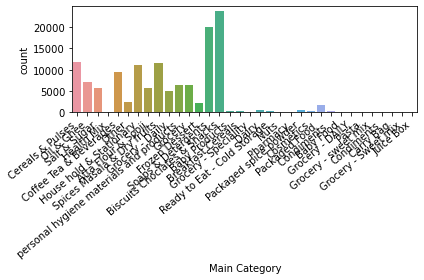

In [70]:
#Plot counts for 'Main Catgegory'

ax = sns.countplot(df['Main Category'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

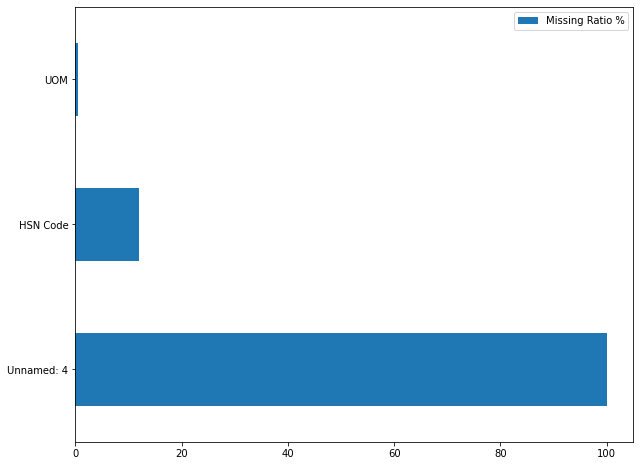

Sl No                                  0
Invoice Date                           0
Bill No.                               0
Customer code                          0
Unnamed: 4                        133753
HSN Code                           16064
Item Name                              0
Main Category                          0
UOM                                  684
Price                                  0
GST Rate                               0
Sale Qty                               0
Sale Tax Amt                           0
Sale Taxable Value                     0
Sale Amt (After Tax)                   0
Profit                                 0
Price Per Item (Excluding GST)         0
Tax                                    0
Profit earned Item                     0
dtype: int64


In [71]:
# Find null values

import matplotlib.pyplot as plt

plot_width, plot_height = (10,8)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)

def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(df)
print(df.isnull().sum())

In [72]:
# Create subset of only the numeric columns
df_num = df.select_dtypes(include=['int','float'])
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133753 entries, 0 to 133772
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Sl No                           133753 non-null  int64  
 1   Unnamed: 4                      0 non-null       float64
 2   HSN Code                        117689 non-null  float64
 3   Price                           133753 non-null  float64
 4   GST Rate                        133753 non-null  int64  
 5   Sale Qty                        133753 non-null  float64
 6   Sale Tax Amt                    133753 non-null  float64
 7   Sale Taxable Value              133753 non-null  float64
 8   Sale Amt (After Tax)            133753 non-null  int64  
 9   Profit                          133753 non-null  float64
 10  Price Per Item (Excluding GST)  133753 non-null  float64
 11  Tax                             133753 non-null  float64
 12  Profit earned It

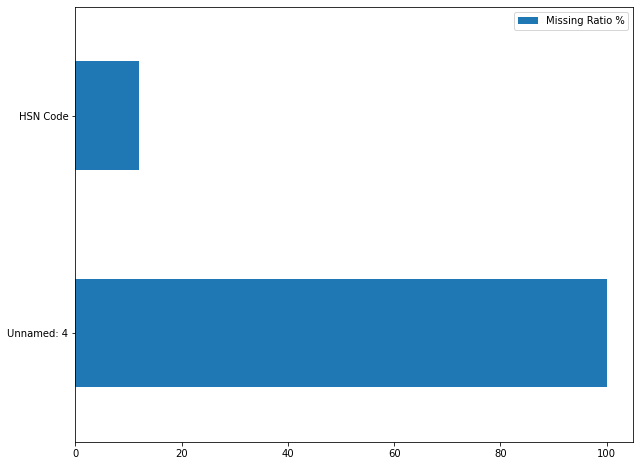

Sl No                                  0
Unnamed: 4                        133753
HSN Code                           16064
Price                                  0
GST Rate                               0
Sale Qty                               0
Sale Tax Amt                           0
Sale Taxable Value                     0
Sale Amt (After Tax)                   0
Profit                                 0
Price Per Item (Excluding GST)         0
Tax                                    0
Profit earned Item                     0
dtype: int64


In [73]:
# Find null values

import matplotlib.pyplot as plt

plot_width, plot_height = (10,8)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)

def plot_nas(df_num: pd.DataFrame):
    if df_num.isnull().sum().sum() != 0:
        na_df = (df_num.isnull().sum() / len(df_num)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(df_num)
print(df_num.isnull().sum())

# Dates:

In [74]:
# Just working with Purchase Date:
df['p_date'] = pd.to_datetime(df['Invoice Date'])
print(df.p_date.head())
print(df['Invoice Date'].head())

0   2022-05-01
1   2022-05-13
2   2022-02-25
3   2022-03-02
4   2022-05-13
Name: p_date, dtype: datetime64[ns]
0   2022-05-01
1   2022-05-13
2   2022-02-25
3   2022-03-02
4   2022-05-13
Name: Invoice Date, dtype: datetime64[ns]


In [75]:
df['p_day'] = df['p_date'].dt.weekday #Monday = 0

print(df.p_date.head())
print(df['Invoice Date'].head())
print(df.p_day.head())

0   2022-05-01
1   2022-05-13
2   2022-02-25
3   2022-03-02
4   2022-05-13
Name: p_date, dtype: datetime64[ns]
0   2022-05-01
1   2022-05-13
2   2022-02-25
3   2022-03-02
4   2022-05-13
Name: Invoice Date, dtype: datetime64[ns]
0    6
1    4
2    4
3    2
4    4
Name: p_day, dtype: int64


In [76]:
# Truncate to get the 1st day of the month for the month 
import datetime as dt
def get_month(x): return dt.datetime(x.year, x.month, 1) #Function that truncates a given date object with the 1st date of the month 
df['p_month'] = df['p_date'].apply(get_month) 
print(df.p_month.head())

0   2022-05-01
1   2022-05-01
2   2022-02-01
3   2022-03-01
4   2022-05-01
Name: p_month, dtype: datetime64[ns]


# Cohort Analysis

In [77]:
#Create a simple cohort table for assigned cohorts
# Assign acquisition month cohort
grouping = df.groupby('Customer code')['p_month'] #Create a groupby object with the customer ID and the purchase month
df['CohortMonth'] = grouping.transform('min') #Use transforming together with the min function to asign the smallest purchase month value to each customer 


In [78]:
df.head(3)

,Sl No,Invoice Date,Bill No.,Customer code,Unnamed: 4,HSN Code,Item Name,Main Category,UOM,Price,GST Rate,Sale Qty,Sale Tax Amt,Sale Taxable Value,Sale Amt (After Tax),Profit,Price Per Item (Excluding GST),Tax,Profit earned Item,p_date,p_day,p_month,CohortMonth
0,3090,2022-05-01,MART-202105011227,MDY/001/0061,NaN,713.0,Suggi Avarekalu 1 kg,Cereals & Pulses,pcs,102.0,0,200.0,0.0,20400.0,20400,2040.0,102.0,0.0,10.20,2022-05-01,6,2022-05-01,2022-02-01
1,1714,2022-05-13,MART-202105012592,MDY/001/0092,NaN,1512.0,Sunpure oil 15 ltr Tin,Oil & Ghee,pcs,3150.0,5,5.0,750.0,15000.0,15750,1500.0,2992.5,157.5,299.25,2022-05-13,4,2022-05-01,2022-01-01
2,333,2022-02-25,MART-202105004641,MDY/001/0371,NaN,NaN,Sunpure Refined - Sunflower Oil 1 L Pouch,Oil & Ghee,Pcs,147.0,0,70.0,0.0,10290.0,10290,1029.0,147.0,0.0,14.70,2022-02-25,4,2022-02-01,2021-12-01


In [79]:
# Create a function to stract integer values from the year, month, and day
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [80]:
# Calculate the # of months between any tx and the 1st tx of each customer (Using p_month & CohortMonth)
# Create two objects with year and month value for purchase and cohort
purchase_year, purchase_month, _ = get_date_int(df, 'p_month')
cohort_year, cohort_month, _ = get_date_int(df, 'CohortMonth')
print(purchase_year.head(3))
print(purchase_month.head(3))

0    2022
1    2022
2    2022
Name: p_month, dtype: int64
0    5
1    5
2    2
Name: p_month, dtype: int64


In [81]:
# Calculate the difference in years and months between them 
years_diff = purchase_year - cohort_year
months_diff = purchase_month - cohort_month
print(years_diff.head(3))
print(months_diff.head(3))

0    0
1    0
2    1
dtype: int64
0     3
1     4
2   -10
dtype: int64


In [82]:
# COnvert the difference to months by multiplying the year differnece by 12 and adding them together +1
# (+1 to deffine the 1st month as 1 instead of 0)
df['CohortIndex'] = years_diff*12 + months_diff +1 
df.head(5)


,Sl No,Invoice Date,Bill No.,Customer code,Unnamed: 4,HSN Code,Item Name,Main Category,UOM,Price,GST Rate,Sale Qty,Sale Tax Amt,Sale Taxable Value,Sale Amt (After Tax),Profit,Price Per Item (Excluding GST),Tax,Profit earned Item,p_date,p_day,p_month,CohortMonth,CohortIndex
0,3090,2022-05-01,MART-202105011227,MDY/001/0061,NaN,713.0,Suggi Avarekalu 1 kg,Cereals & Pulses,pcs,102.0,0,200.0,0.00,20400.00,20400,2040.000,102.00,0.00,10.200,2022-05-01,6,2022-05-01,2022-02-01,4
1,1714,2022-05-13,MART-202105012592,MDY/001/0092,NaN,1512.0,Sunpure oil 15 ltr Tin,Oil & Ghee,pcs,3150.0,5,5.0,750.00,15000.00,15750,1500.000,2992.50,157.50,299.250,2022-05-13,4,2022-05-01,2022-01-01,5
2,333,2022-02-25,MART-202105004641,MDY/001/0371,NaN,NaN,Sunpure Refined - Sunflower Oil 1 L Pouch,Oil & Ghee,Pcs,147.0,0,70.0,0.00,10290.00,10290,1029.000,147.00,0.00,14.700,2022-02-25,4,2022-02-01,2021-12-01,3
3,2982,2022-03-02,MART-202105005139,MDY/001/1014,NaN,NaN,Ruchi gold oil 1ltr pouch,Oil & Ghee,pcs,145.0,5,60.0,414.29,8285.71,8700,828.571,137.75,7.25,13.775,2022-03-02,2,2022-03-01,2022-01-01,3
4,1771,2022-05-13,MART-202105012536,MDY/001/0092,NaN,NaN,BS Bullet Raw Rice 25 kg,Cereals & Pulses,pcs,1260.0,0,6.0,0.00,7560.00,7560,756.000,1260.00,0.00,126.000,2022-05-13,4,2022-05-01,2022-01-01,5


In [83]:
# Calculate the # of monthly active customers in each cohort 
grouping = df.groupby(['CohortMonth','CohortIndex'])
cohort_data = grouping['Customer code'].apply(pd.Series.nunique)

# Reset the index and create a panda pivot with cohort month in the rows, and cohort index in the columns, and customer counts as values
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index = 'CohortMonth',
                                 columns = 'CohortIndex',
                                 values = 'Customer code')
print(cohort_counts)

CohortIndex      1      2      3      4      5      6      7      8      9      10    11
CohortMonth                                                                             
2021-12-01     70.0   31.0   34.0   38.0   39.0   36.0   38.0   38.0   43.0   41.0  38.0
2022-01-01   1061.0  453.0  479.0  450.0  438.0  404.0  421.0  437.0  423.0  396.0   NaN
2022-02-01    449.0  194.0  159.0  149.0  130.0  139.0  130.0  128.0  107.0    NaN   NaN
2022-03-01    407.0  104.0   97.0  103.0  103.0  101.0   82.0   82.0    NaN    NaN   NaN
2022-04-01    297.0   62.0   49.0   60.0   66.0   59.0   57.0    NaN    NaN    NaN   NaN
2022-05-01    229.0   40.0   48.0   39.0   48.0   45.0    NaN    NaN    NaN    NaN   NaN
2022-06-01    195.0   48.0   41.0   39.0   30.0    NaN    NaN    NaN    NaN    NaN   NaN
2022-07-01    221.0   54.0   50.0   45.0    NaN    NaN    NaN    NaN    NaN    NaN   NaN
2022-08-01    228.0   50.0   35.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN
2022-09-01    196.0  

Calculate business metrics for customers' cohort.

Customer Retention: cohort_counts table

How many customers originally in eachg cohort? How many of them were active in the following months?


In [84]:
# Select the 1st column of the table and store it as cohort sizes
cohort_sizes = cohort_counts.iloc[:,0]
print(cohort_sizes)

#Use the divide function on the cohort counts data frame against the cohort sizes
retention = cohort_counts.divide(cohort_sizes, axis = 0)
#print(retention)

# Round the ration to 3
retention.round(3)*100

CohortMonth
2021-12-01      70.0
2022-01-01    1061.0
2022-02-01     449.0
2022-03-01     407.0
2022-04-01     297.0
2022-05-01     229.0
2022-06-01     195.0
2022-07-01     221.0
2022-08-01     228.0
2022-09-01     196.0
2022-10-01     157.0
Name: 1, dtype: float64


CohortIndex,1,2,3,4,5,6,7,8,9,10,11
CohortMonth,,,,,,,,,,,
2021-12-01,100.0,44.3,48.6,54.3,55.7,51.4,54.3,54.3,61.4,58.6,54.3
2022-01-01,100.0,42.7,45.1,42.4,41.3,38.1,39.7,41.2,39.9,37.3,NaN
2022-02-01,100.0,43.2,35.4,33.2,29.0,31.0,29.0,28.5,23.8,NaN,NaN
2022-03-01,100.0,25.6,23.8,25.3,25.3,24.8,20.1,20.1,NaN,NaN,NaN
2022-04-01,100.0,20.9,16.5,20.2,22.2,19.9,19.2,NaN,NaN,NaN,NaN
2022-05-01,100.0,17.5,21.0,17.0,21.0,19.7,NaN,NaN,NaN,NaN,NaN
2022-06-01,100.0,24.6,21.0,20.0,15.4,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-01,100.0,24.4,22.6,20.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-01,100.0,21.9,15.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Retention Rate'}, xlabel='CohortIndex', ylabel='CohortMonth'>

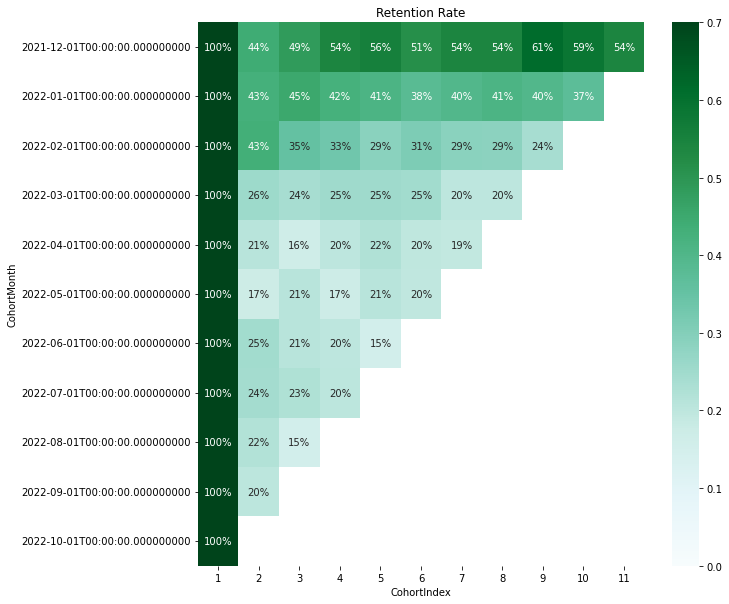

In [86]:
plt.figure(figsize = (10,10)) #Create an empty table in inches
plt.title('Retention Rate') # Add a title
sns.heatmap(data = retention,
           annot = True,
           fmt = '.0%',
           vmin = 0.0,
           vmax = 0.7,
           cmap = 'BuGn')

# Recency, Frequency, Monetary (RFM) Segmentation

In [87]:
print('Min:{}; Max:{}'.format(min(df['Invoice Date']),
                                 max(df['Invoice Date'])))

Min:2021-12-12 00:00:00; Max:2022-10-31 00:00:00


In [88]:
# Create an snapshot date with the last date of the data set +1, to simlate that we are working today with all the previous data
snapshot_date = max(df['Invoice Date']) + dt.timedelta(days=1)
print(snapshot_date)

2022-11-01 00:00:00


In [89]:
df['Invoice Date 2'] = df['Invoice Date']

In [90]:
##### Calculate RFM metrics
###############################
datamart = df.groupby(['Customer code']).agg({
    'Invoice Date': lambda x: (snapshot_date - x.max()).days,
    'Invoice Date 2': lambda x: (x.max() - x.min()).days + 1,
     #'Bill No.': 'count', # Need to convert to unique transaction count
    'Bill No.': lambda x: x.nunique(),
    'Sale Taxable Value': 'sum', # Need to convert to a per-month 
    'Profit': 'sum' # Need to convert to a per-month 
})

datamart.rename(columns = {'Invoice Date': 'Recency',
                           'Invoice Date 2': 'Tenure',
                          'Bill No.': 'Frequency',
                          'Sale Taxable Value': 'MonetaryValue',
                          'Profit': 'Profit' }, inplace = True)
print(datamart.head(10))

               Recency  Tenure  Frequency  MonetaryValue    Profit
Customer code                                                     
MDY/001/0001       182      46         20         850.14    85.014
MDY/001/0002         3     302         52       18970.74  1897.074
MDY/001/0003         6     285         33       15692.36  1569.236
MDY/001/0004       177      58         57        4837.29   483.729
MDY/001/0005         6     255         56       38692.03  3869.203
MDY/001/0006        60     225          8        2140.19   214.019
MDY/001/0007        13     266         27       20493.39  2049.339
MDY/001/0008         6     297         79       39763.60  3976.360
MDY/001/0009       215       1          1          56.10     5.610
MDY/001/0010       215       1          1        2675.70   267.570


In [91]:
datamart['Frequency'] = datamart['Frequency'] / datamart['Tenure']
datamart['MonetaryValue'] = datamart['MonetaryValue'] / datamart['Tenure']
datamart['Profit'] = datamart['Profit'] / datamart['Tenure']

In [92]:
print(datamart.head(10))

               Recency  Tenure  Frequency  MonetaryValue      Profit
Customer code                                                       
MDY/001/0001       182      46   0.434783      18.481304    1.848130
MDY/001/0002         3     302   0.172185      62.817020    6.281702
MDY/001/0003         6     285   0.115789      55.060912    5.506091
MDY/001/0004       177      58   0.982759      83.401552    8.340155
MDY/001/0005         6     255   0.219608     151.733451   15.173345
MDY/001/0006        60     225   0.035556       9.511956    0.951196
MDY/001/0007        13     266   0.101504      77.042820    7.704282
MDY/001/0008         6     297   0.265993     133.884175   13.388418
MDY/001/0009       215       1   1.000000      56.100000    5.610000
MDY/001/0010       215       1   1.000000    2675.700000  267.570000


In [93]:
# Recency quartiles 

r_labels = range(4,0,-1) 
r_quartiles = pd.qcut(datamart['Recency'], 4, labels = r_labels) #This is to rate customer i.e., if cusotmer interacted recently will have a 4, if not 0, if interacted long time ago 1
datamart = datamart.assign(R = r_quartiles.values)
print(datamart.head(10))

               Recency  Tenure  Frequency  MonetaryValue      Profit  R
Customer code                                                          
MDY/001/0001       182      46   0.434783      18.481304    1.848130  2
MDY/001/0002         3     302   0.172185      62.817020    6.281702  4
MDY/001/0003         6     285   0.115789      55.060912    5.506091  4
MDY/001/0004       177      58   0.982759      83.401552    8.340155  2
MDY/001/0005         6     255   0.219608     151.733451   15.173345  4
MDY/001/0006        60     225   0.035556       9.511956    0.951196  3
MDY/001/0007        13     266   0.101504      77.042820    7.704282  4
MDY/001/0008         6     297   0.265993     133.884175   13.388418  4
MDY/001/0009       215       1   1.000000      56.100000    5.610000  1
MDY/001/0010       215       1   1.000000    2675.700000  267.570000  1


In [94]:
#Frequency and Monetary Value quartiles 
f_labels = range(1,5)
m_labels = range(1,5)
p_labels = range(1,5)
f_quartiles = pd.qcut(datamart['Frequency'], 4, labels = f_labels)
m_quartiles = pd.qcut(datamart['MonetaryValue'], 4, labels = m_labels)
p_quartiles = pd.qcut(datamart['Profit'], 4, labels = m_labels)
datamart = datamart.assign(F = f_quartiles.values)
datamart = datamart.assign(M = m_quartiles.values )
datamart = datamart.assign(P = p_quartiles.values )
print(datamart.head())

               Recency  Tenure  Frequency  MonetaryValue     Profit  R  F  M  P
Customer code                                                                  
MDY/001/0001       182      46   0.434783      18.481304   1.848130  2  3  2  2
MDY/001/0002         3     302   0.172185      62.817020   6.281702  4  3  3  3
MDY/001/0003         6     285   0.115789      55.060912   5.506091  4  2  3  3
MDY/001/0004       177      58   0.982759      83.401552   8.340155  2  3  3  3
MDY/001/0005         6     255   0.219608     151.733451  15.173345  4  3  4  4


### Build RFM segment and RFM score ###

In [95]:
#Function that creates a concatenates list from RFM values converted to strings
def join_rfm(datamart): return str(datamart['R']) + str(datamart['F']) + str(datamart['M']) 
#Create RFM segment by applying the function below to the dataset across the columns
datamart['RFM_Segment']= datamart.apply(join_rfm, axis =1)
# Create RFM score by summing RFM values across the columns
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis=1)
print(datamart.head())

               Recency  Tenure  Frequency  MonetaryValue     Profit  R  F  M  P RFM_Segment  RFM_Score
Customer code                                                                                         
MDY/001/0001       182      46   0.434783      18.481304   1.848130  2  3  2  2   2.03.02.0          7
MDY/001/0002         3     302   0.172185      62.817020   6.281702  4  3  3  3   4.03.03.0         10
MDY/001/0003         6     285   0.115789      55.060912   5.506091  4  2  3  3   4.02.03.0          9
MDY/001/0004       177      58   0.982759      83.401552   8.340155  2  3  3  3   2.03.03.0          8
MDY/001/0005         6     255   0.219608     151.733451  15.173345  4  3  4  4   4.03.04.0         11


### Analyzing RFM segments ###

In [96]:
#LArgest RFM segments: 
datamart.groupby('RFM_Segment').size().sort_values(ascending=False)[:10]

RFM_Segment
1.03.04.0    349
2.03.04.0    236
1.03.03.0    225
3.01.01.0    218
2.01.01.0    192
4.02.02.0    176
4.01.01.0    172
3.03.04.0    150
2.03.03.0    141
4.03.03.0    133
dtype: int64

In [97]:
#Filtering RFM Segments
# Select bottom RFM segment '111' and view top 5
datamart[datamart['RFM_Segment']=='111'][:5]

,Recency,Tenure,Frequency,MonetaryValue,Profit,R,F,M,P,RFM_Segment,RFM_Score
Customer code,,,,,,,,,,,


In [98]:
# Select bottom RFM segment '111' and view top 5
datamart[datamart['RFM_Segment']=='444'][:5]

,Recency,Tenure,Frequency,MonetaryValue,Profit,R,F,M,P,RFM_Segment,RFM_Score
Customer code,,,,,,,,,,,


In [99]:
# Summary metrics per RFM score
datamart.groupby('RFM_Score').agg({
    'Recency':'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'Profit': ['mean', 'count']}).round(1)

Recency Frequency MonetaryValue Profit      
             mean      mean          mean   mean count
RFM_Score                                             
3           205.4       0.0           3.8    0.4    31
4           144.4       0.0           4.9    0.5   250
5            99.1       0.1           7.9    0.8   391
6            95.2       0.2          15.5    1.6   534
7           127.7       0.5          39.4    3.9   599
8           144.8       0.7         289.5   29.0   790
9            82.5       0.8         307.1   30.7   517
10           34.2       0.8         474.7   47.5   297
11           13.2       0.8         431.8   43.2    97
12            5.5       4.0        1091.1  109.1     4

In [100]:
# Grouping into named segments
# Gold, Silver, and Bronze segments
def segment_me(db): 
    if db['RFM_Score'] >= 11:
        return '1. Gold'
    elif (db['RFM_Score'] >= 7) and (db['RFM_Score']<11):
        return '2. Silver'
    else:
        return '3. Bronze'

In [101]:
datamart['General_Segment'] = datamart.apply(segment_me, axis=1)
print(datamart.head())

               Recency  Tenure  Frequency  MonetaryValue     Profit  R  F  M  P RFM_Segment  RFM_Score General_Segment
Customer code                                                                                                         
MDY/001/0001       182      46   0.434783      18.481304   1.848130  2  3  2  2   2.03.02.0          7       2. Silver
MDY/001/0002         3     302   0.172185      62.817020   6.281702  4  3  3  3   4.03.03.0         10       2. Silver
MDY/001/0003         6     285   0.115789      55.060912   5.506091  4  2  3  3   4.02.03.0          9       2. Silver
MDY/001/0004       177      58   0.982759      83.401552   8.340155  2  3  3  3   2.03.03.0          8       2. Silver
MDY/001/0005         6     255   0.219608     151.733451  15.173345  4  3  4  4   4.03.04.0         11         1. Gold


In [102]:
datamart.groupby('General_Segment').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue': 'mean',
    'Profit': ['mean','count']}).round(1)

Recency Frequency MonetaryValue Profit      
                   mean      mean          mean   mean count
General_Segment                                             
1. Gold            12.9       1.0         457.9   45.8   101
2. Silver         110.6       0.6         250.6   25.1  2203
3. Bronze         109.5       0.1          10.6    1.1  1206

# K-Means Clustering
===============================================================
===============================================================

# Data pre-processing


In [103]:
#Apply  log transform to manage skewness
#Monetary Value
############

/Users/mitchleeson/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


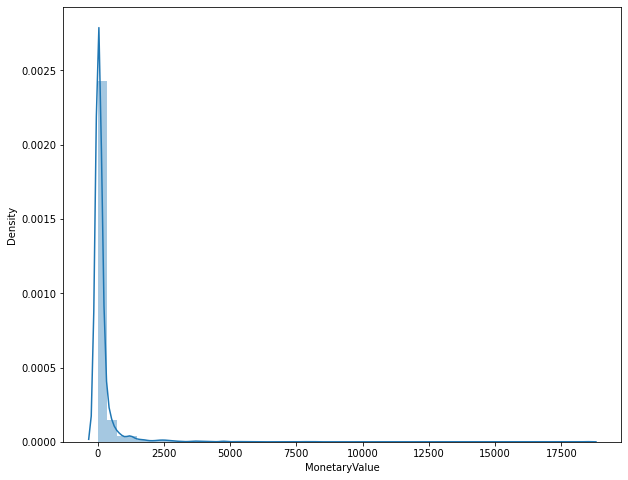

In [104]:
sns.distplot(datamart['MonetaryValue'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8aae85bbb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8aae841310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8aae85b850>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8aae841a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8aae841dc0>],
 'means': []}

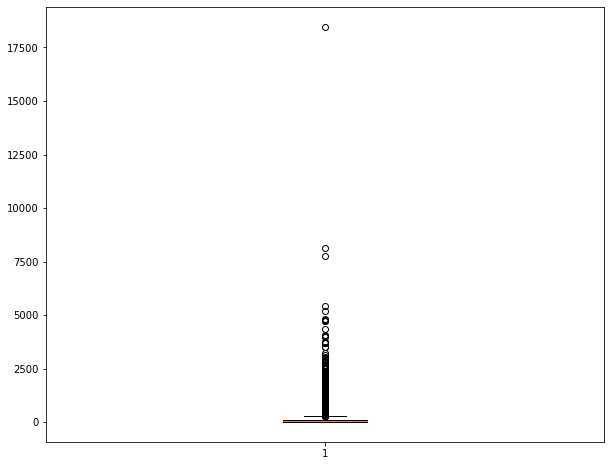

In [105]:
plt.boxplot(datamart['MonetaryValue'])

In [106]:
datamart.describe()

,Recency,Tenure,Frequency,MonetaryValue,Profit,RFM_Score
count,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000
mean,107.424217,98.967521,0.476047,174.087486,17.408749,7.265812
std,93.951373,109.178260,0.515901,569.366248,56.936625,1.832156
min,1.000000,1.000000,0.006689,0.123268,0.012327,3.000000
25%,24.000000,1.000000,0.040000,9.378075,0.937808,6.000000
50%,77.000000,45.000000,0.139770,33.930000,3.393000,7.000000
75%,184.000000,204.000000,1.000000,117.793011,11.779301,9.000000
max,306.000000,306.000000,10.062914,18472.090000,1847.209000,12.000000


In [107]:
print("Highest allowed",datamart['MonetaryValue'].mean() + 3*datamart['MonetaryValue'].std())
#print("Lowest allowed",datamart['MonetaryValue'].mean() - 3*datamart['MonetaryValue'].std())

Highest allowed 1882.1862297156529


In [108]:
datamart = datamart[datamart['MonetaryValue'] < 1882.1862297156529]

In [109]:
# for x in ['MonetaryValue']:
#     q75,q25 = np.percentile(datamart.loc[:,x],[75,25])
#     intr_qr = q75-q25
#     max = q75+(1.5*intr_qr)
#     min = q25-(1.5*intr_qr)
#     datamart.loc[datamart[x] < min,x] = np.nan
#     datamart.loc[datamart[x] > max,x] = np.nan

In [110]:
datamart

,Recency,Tenure,Frequency,MonetaryValue,Profit,R,F,M,P,RFM_Segment,RFM_Score,General_Segment
Customer code,,,,,,,,,,,,
MDY/001/0001,182,46,0.434783,18.481304,1.848130,2,3,2,2,2.03.02.0,7,2. Silver
MDY/001/0002,3,302,0.172185,62.817020,6.281702,4,3,3,3,4.03.03.0,10,2. Silver
MDY/001/0003,6,285,0.115789,55.060912,5.506091,4,2,3,3,4.02.03.0,9,2. Silver
MDY/001/0004,177,58,0.982759,83.401552,8.340155,2,3,3,3,2.03.03.0,8,2. Silver
MDY/001/0005,6,255,0.219608,151.733451,15.173345,4,3,4,4,4.03.04.0,11,1. Gold
...,...,...,...,...,...,...,...,...,...,...,...,...
MDY/001/3507,305,1,1.000000,43.730000,4.373000,1,3,3,3,1.03.03.0,7,2. Silver
MDY/001/3508,305,1,1.000000,8.470000,0.847000,1,3,1,1,1.03.01.0,5,3. Bronze
MDY/001/3509,306,1,1.000000,60.080000,6.008000,1,3,3,3,1.03.03.0,7,2. Silver


/Users/mitchleeson/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


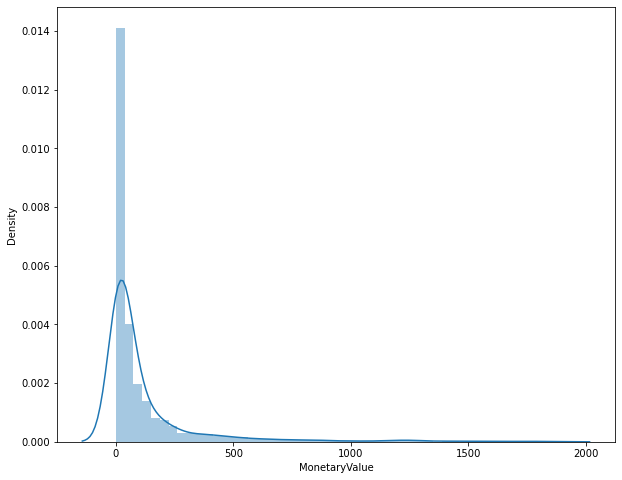

In [111]:
sns.distplot(datamart['MonetaryValue'])
plt.show()

/Users/mitchleeson/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


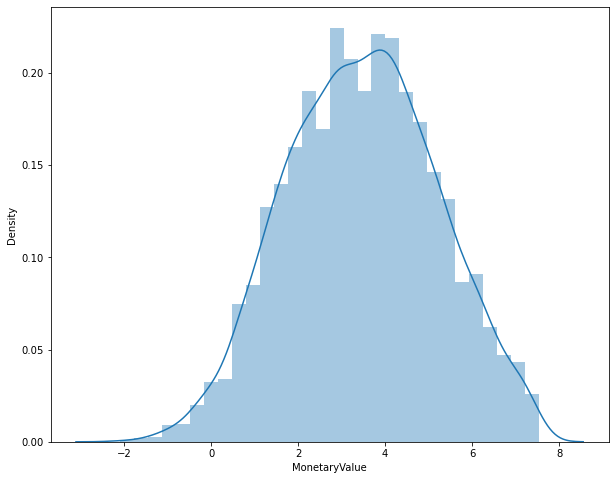

In [112]:
monetary_log = np.log(datamart['MonetaryValue'])
sns.distplot(monetary_log)
plt.show()

/Users/mitchleeson/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


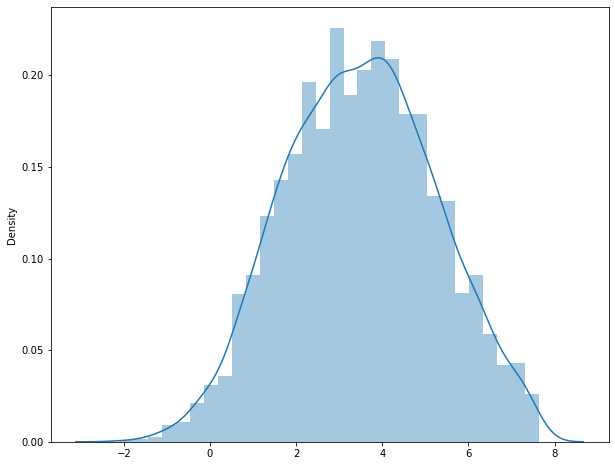

In [113]:
from scipy.stats import boxcox
monetary_box, best_lambda = boxcox(datamart['MonetaryValue']) 
sns.distplot(monetary_box)
plt.show()

In [114]:
datamart['monetary_box'] = monetary_box
print(datamart.head())

               Recency  Tenure  Frequency  MonetaryValue     Profit  R  F  M  P RFM_Segment  RFM_Score General_Segment  monetary_box
Customer code                                                                                                                       
MDY/001/0001       182      46   0.434783      18.481304   1.848130  2  3  2  2   2.03.02.0          7       2. Silver      2.931820
MDY/001/0002         3     302   0.172185      62.817020   6.281702  4  3  3  3   4.03.03.0         10       2. Silver      4.170615
MDY/001/0003         6     285   0.115789      55.060912   5.506091  4  2  3  3   4.02.03.0          9       2. Silver      4.036921
MDY/001/0004       177      58   0.982759      83.401552   8.340155  2  3  3  3   2.03.03.0          8       2. Silver      4.458371
MDY/001/0005         6     255   0.219608     151.733451  15.173345  4  3  4  4   4.03.04.0         11         1. Gold      5.066886


/Users/mitchleeson/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


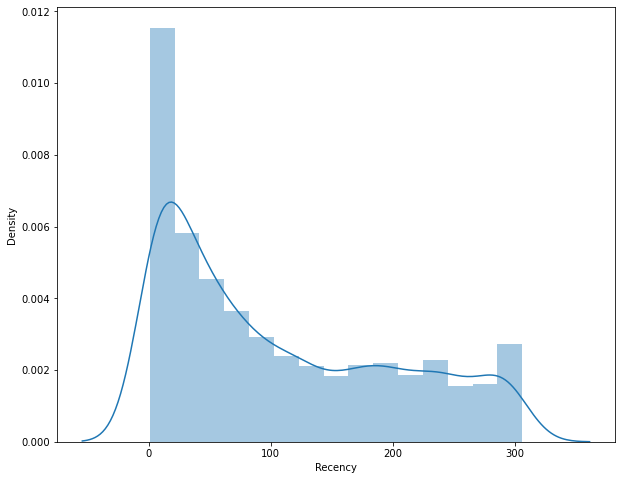

In [115]:
# Exploring the distributions for the variables"
sns.distplot(datamart['Recency'])
plt.show()

/Users/mitchleeson/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


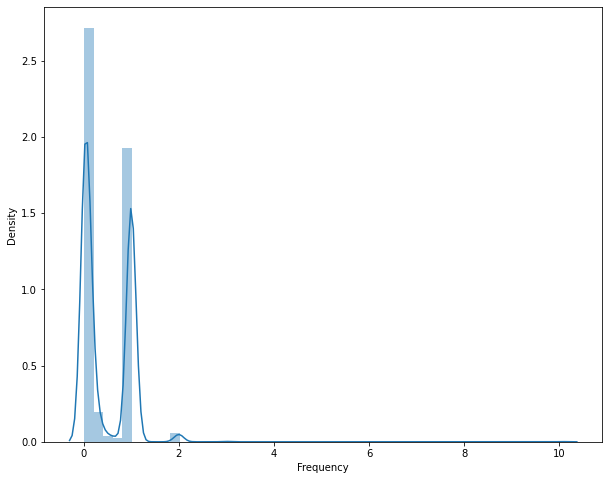

In [116]:
sns.distplot(datamart['Frequency'])
plt.show()

/Users/mitchleeson/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


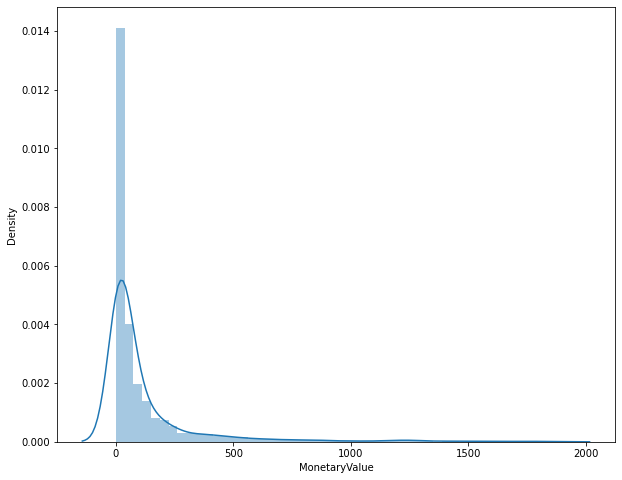

In [117]:
sns.distplot(datamart['MonetaryValue'])
plt.show()

/Users/mitchleeson/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


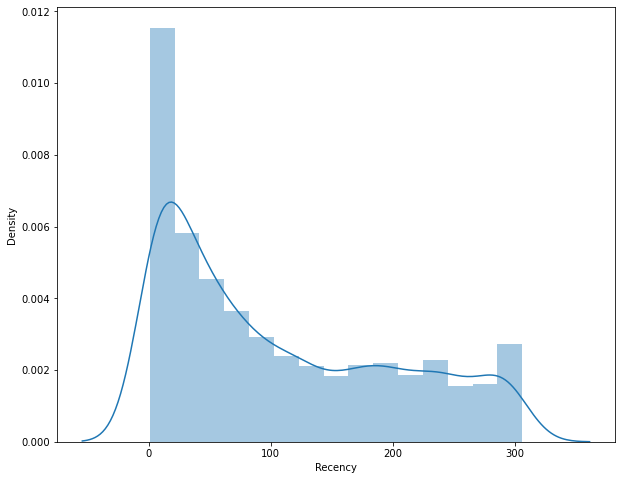

In [118]:
sns.distplot(datamart['Recency'])
plt.show()

/Users/mitchleeson/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


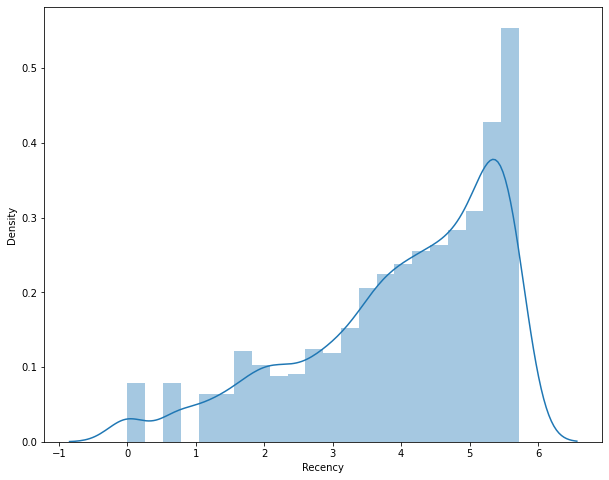

In [119]:
Recency_log = np.log(datamart['Recency'])
sns.distplot(Recency_log)
plt.show()

/Users/mitchleeson/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


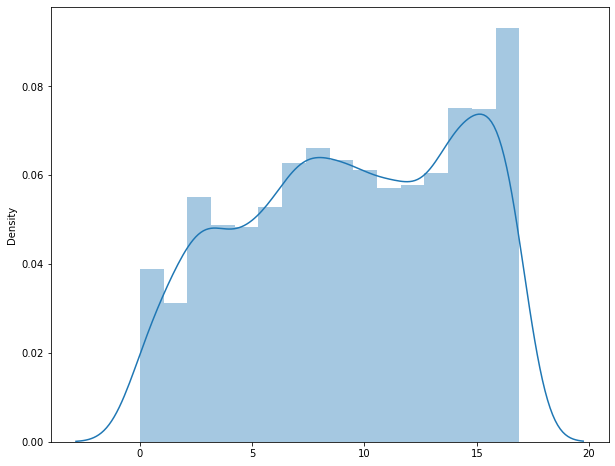

In [120]:
Recency_box, best_lambda = boxcox(datamart['Recency']) 
sns.distplot(Recency_box)
plt.show()

In [121]:
datamart['recency_box'] = Recency_box
print(datamart.head())

               Recency  Tenure  Frequency  MonetaryValue     Profit  R  F  M  P RFM_Segment  RFM_Score General_Segment  monetary_box  recency_box
Customer code                                                                                                                                    
MDY/001/0001       182      46   0.434783      18.481304   1.848130  2  3  2  2   2.03.02.0          7       2. Silver      2.931820    13.767610
MDY/001/0002         3     302   0.172185      62.817020   6.281702  4  3  3  3   4.03.03.0         10       2. Silver      4.170615     1.322832
MDY/001/0003         6     285   0.115789      55.060912   5.506091  4  2  3  3   4.02.03.0          9       2. Silver      4.036921     2.439151
MDY/001/0004       177      58   0.982759      83.401552   8.340155  2  3  3  3   2.03.03.0          8       2. Silver      4.458371    13.614559
MDY/001/0005         6     255   0.219608     151.733451  15.173345  4  3  4  4   4.03.04.0         11         1. Gold      

In [122]:
#Apply  log transform to manage skewness
#Frequency
############

/Users/mitchleeson/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


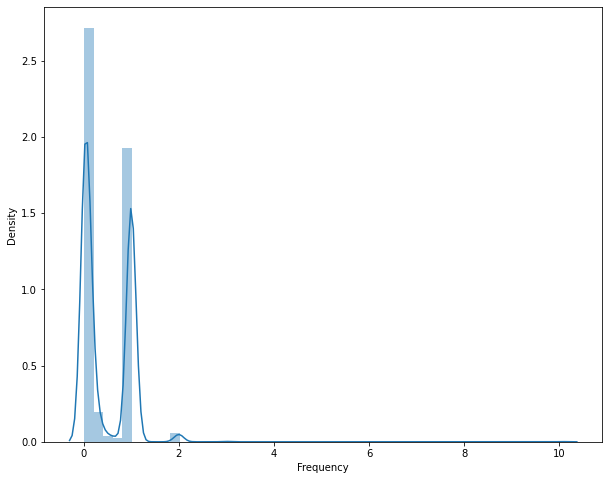

In [123]:
sns.distplot(datamart['Frequency'])
plt.show()

/Users/mitchleeson/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


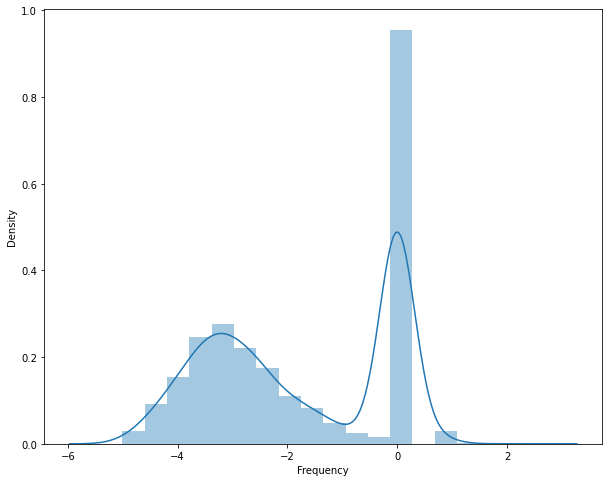

In [124]:
frequency_log = np.log(datamart['Frequency'])
sns.distplot(frequency_log)
plt.show()

/Users/mitchleeson/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


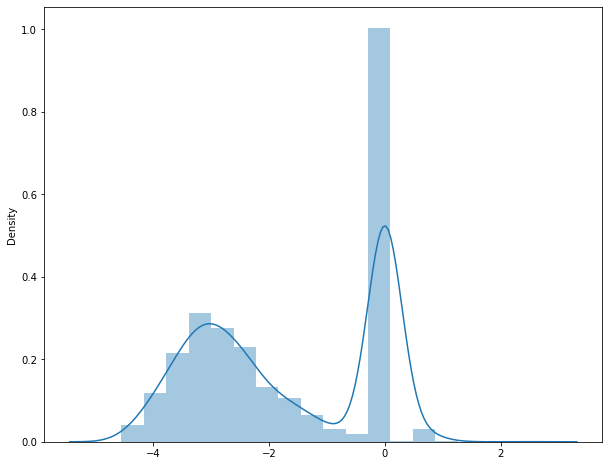

In [125]:
frequency_box, best_lambda = boxcox(datamart['Frequency']) 
sns.distplot(frequency_box)
plt.show()

In [126]:
datamart['Frequency'].max(skipna = False)

10.062913907284768

In [127]:
datamart['frequency_box'] = frequency_box
print(datamart.head())

               Recency  Tenure  Frequency  MonetaryValue     Profit  R  F  M  P RFM_Segment  RFM_Score General_Segment  monetary_box  recency_box  frequency_box
Customer code                                                                                                                                                   
MDY/001/0001       182      46   0.434783      18.481304   1.848130  2  3  2  2   2.03.02.0          7       2. Silver      2.931820    13.767610      -0.819459
MDY/001/0002         3     302   0.172185      62.817020   6.281702  4  3  3  3   4.03.03.0         10       2. Silver      4.170615     1.322832      -1.699899
MDY/001/0003         6     285   0.115789      55.060912   5.506091  4  2  3  3   4.02.03.0          9       2. Silver      4.036921     2.439151      -2.067391
MDY/001/0004       177      58   0.982759      83.401552   8.340155  2  3  3  3   2.03.03.0          8       2. Silver      4.458371    13.614559      -0.017386
MDY/001/0005         6     255   0

In [128]:
selected_features = ['recency_box', 
                     'frequency_box', 
                     'monetary_box']

datamart_box = datamart[selected_features]
print(datamart_box.head())

               recency_box  frequency_box  monetary_box
Customer code                                          
MDY/001/0001     13.767610      -0.819459      2.931820
MDY/001/0002      1.322832      -1.699899      4.170615
MDY/001/0003      2.439151      -2.067391      4.036921
MDY/001/0004     13.614559      -0.017386      4.458371
MDY/001/0005      2.439151      -1.471751      5.066886


In [129]:
selected_features = ['Recency', 
                     'Frequency', 
                     'MonetaryValue']

datamart_rfm = datamart[selected_features]
print(datamart_rfm.head())

               Recency  Frequency  MonetaryValue
Customer code                                   
MDY/001/0001       182   0.434783      18.481304
MDY/001/0002         3   0.172185      62.817020
MDY/001/0003         6   0.115789      55.060912
MDY/001/0004       177   0.982759      83.401552
MDY/001/0005         6   0.219608     151.733451


In [130]:

datamart_box.describe()

,recency_box,frequency_box,monetary_box
count,3455.000000,3455.000000,3455.000000
mean,9.431504,-1.656965,3.499547
std,4.837420,1.522750,1.744616
min,0.000000,-4.546511,-2.085682
25%,5.600307,-3.042313,2.224215
50%,9.631306,-1.950262,3.513556
75%,13.797880,0.000000,4.742291
max,16.894402,2.416563,7.636665


In [131]:
#Centering variables
datamart_centered = datamart_box - datamart_box.mean()
datamart_centered.describe().round(2)

,recency_box,frequency_box,monetary_box
count,3455.00,3455.00,3455.00
mean,-0.00,0.00,-0.00
std,4.84,1.52,1.74
min,-9.43,-2.89,-5.59
25%,-3.83,-1.39,-1.28
50%,0.20,-0.29,0.01
75%,4.37,1.66,1.24
max,7.46,4.07,4.14


In [132]:
#Scaling 
datamart_scaled = datamart_box/datamart_box.std()
datamart_scaled.describe().round(2)

,recency_box,frequency_box,monetary_box
count,3455.00,3455.00,3455.00
mean,1.95,-1.09,2.01
std,1.00,1.00,1.00
min,0.00,-2.99,-1.20
25%,1.16,-2.00,1.27
50%,1.99,-1.28,2.01
75%,2.85,0.00,2.72
max,3.49,1.59,4.38


In [133]:
# Combining centering and scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(datamart_box)
datamart_normalized = scaler.transform(datamart_box)
print('mean:', datamart_normalized.mean(axis=0).round(2))
print('std:', datamart_normalized.std(axis=0).round(2))

mean: [-0.  0. -0.]
std: [1. 1. 1.]


{'whiskers': [<matplotlib.lines.Line2D at 0x7f8aad22b4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8aad22bbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8aad22b130>,
 'medians': [<matplotlib.lines.Line2D at 0x7f8aaf924340>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8aaf9246d0>,
 'means': []}

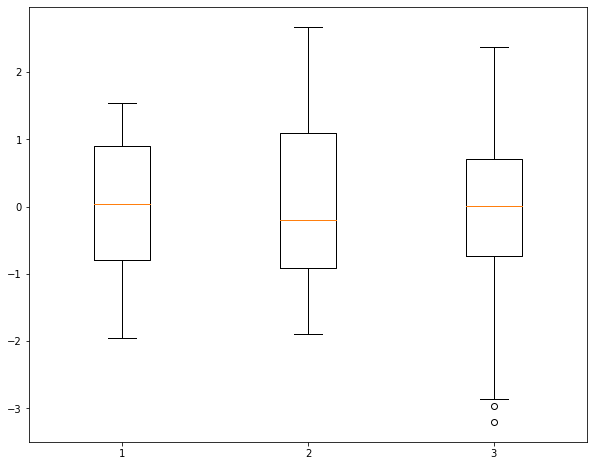

In [134]:
import numpy as np
import matplotlib.pyplot as plt
plt.boxplot(datamart_normalized)

# Choose the number of clusters 

In [135]:
from sklearn.cluster import KMeans

In [136]:
# Elbow criterion
######################

In [137]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(datamart_normalized)
    sse[k] = kmeans.inertia_ #sum of squared distances to closest cluster centre

<function matplotlib.pyplot.show(close=None, block=None)>

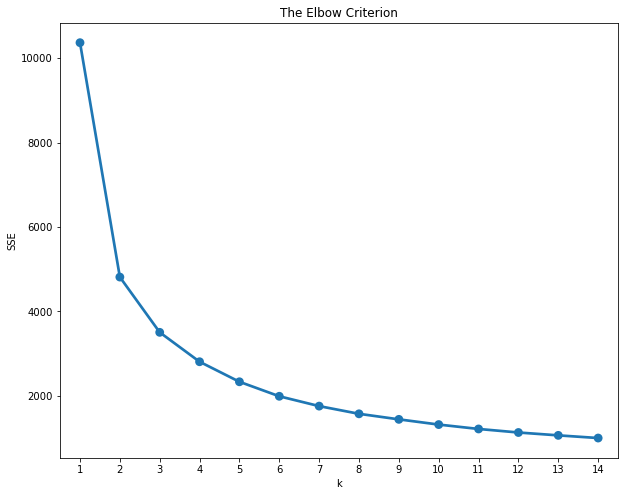

In [138]:
plt.title('The Elbow Criterion')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()),y=list(sse.values()))
plt.show
# TWO CLUSTERS 

# K=4 #

In [139]:
# Initialize Kmeans
kmeans_4 = KMeans(n_clusters = 4, random_state=1)
kmeans_4.fit(datamart_normalized)
cluster_labels_4 = kmeans_4.labels_

In [140]:
# Create a new DataFrame by adding a cluster label column to datamart_rfmt
datamart_rfm_4 = datamart_rfm.assign(Cluster_4=cluster_labels_4)
print(datamart_rfm_4)

               Recency  Frequency  MonetaryValue  Cluster_4
Customer code                                              
MDY/001/0001       182   0.434783      18.481304          1
MDY/001/0002         3   0.172185      62.817020          2
MDY/001/0003         6   0.115789      55.060912          2
MDY/001/0004       177   0.982759      83.401552          1
MDY/001/0005         6   0.219608     151.733451          3
...                ...        ...            ...        ...
MDY/001/3507       305   1.000000      43.730000          1
MDY/001/3508       305   1.000000       8.470000          1
MDY/001/3509       306   1.000000      60.080000          1
MDY/001/3510       306   1.000000      89.830000          1
MDY/001/3511       306   1.000000     240.790000          1

[3455 rows x 4 columns]


In [141]:
# Group by cluster
grouped_4 = datamart_rfm_4.groupby(['Cluster_4'])

In [142]:
grouped_4.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
Cluster_4                                      
0           115.0       0.0          11.6   916
1           213.8       1.0         252.4  1051
2            17.2       0.1          23.6   937
3            42.0       0.9         219.2   551

# Profiling 

In [143]:
#SNAKE PLOT
datamart_normalized_4 = pd.DataFrame(datamart_normalized, 
                                   index = datamart_rfm.index,
                                  columns = datamart_rfm.columns)
datamart_normalized_4['Cluster_4'] = datamart_rfm_4['Cluster_4']
print(datamart_normalized_4.head())

                Recency  Frequency  MonetaryValue  Cluster_4
Customer code                                               
MDY/001/0001   0.896497   0.550075      -0.325463          1
MDY/001/0002  -1.676482  -0.028199       0.384707          2
MDY/001/0003  -1.445681  -0.269569       0.308063          2
MDY/001/0004   0.864854   1.076878       0.549670          1
MDY/001/0005  -1.445681   0.121649       0.898516          3


In [144]:
datamart_normalized_melt_4 = pd.melt(datamart_normalized_4.reset_index(),
                                  id_vars=['Customer code','Cluster_4'],
                                  value_vars=['Recency','Frequency','MonetaryValue'],
                                  var_name='Attribute',
                                  value_name='Value')

<AxesSubplot:title={'center':'Snake plot of standardized variables'}, xlabel='Attribute', ylabel='Value'>

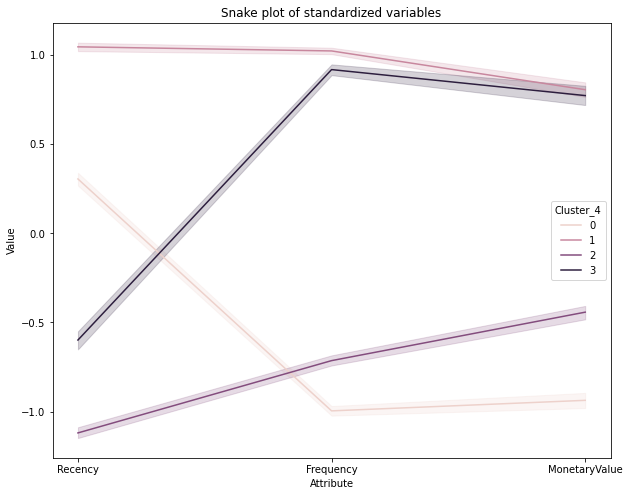

In [145]:
plt.title('Snake plot of standardized variables')
sns.lineplot(x='Attribute', y='Value', hue='Cluster_4', data = datamart_normalized_melt_4)

In [146]:
# Relative importance
cluster_avg_4 = datamart_rfm_4.groupby(['Cluster_4']).mean()
population_avg_4 = datamart_rfm.mean()
relative_imp_4 = cluster_avg_4/population_avg_4-1

In [147]:
relative_imp_4.round(2)

,Recency,Frequency,MonetaryValue
Cluster_4,,,
0,0.08,-0.90,-0.90
1,1.00,1.08,1.08
2,-0.84,-0.85,-0.81
3,-0.61,0.89,0.81


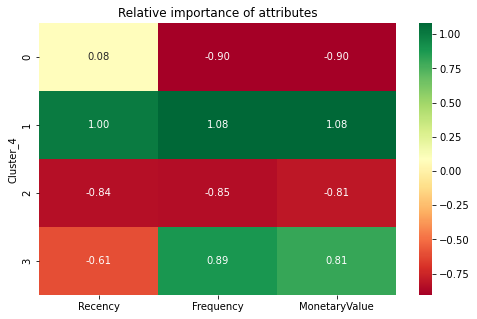

In [148]:
plt.figure(figsize=(8,5))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp_4, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

# K=3 #

In [149]:
# Initialize Kmeans
kmeans_3 = KMeans(n_clusters = 3, random_state=1)
kmeans_3.fit(datamart_normalized)
cluster_labels_3 = kmeans_3.labels_

In [150]:
# Create a new DataFrame by adding a cluster label column to datamart_rfmt
datamart_rfm_3 = datamart_rfm.assign(Cluster_3=cluster_labels_3)
print(datamart_rfm_3)

               Recency  Frequency  MonetaryValue  Cluster_3
Customer code                                              
MDY/001/0001       182   0.434783      18.481304          1
MDY/001/0002         3   0.172185      62.817020          2
MDY/001/0003         6   0.115789      55.060912          2
MDY/001/0004       177   0.982759      83.401552          1
MDY/001/0005         6   0.219608     151.733451          2
...                ...        ...            ...        ...
MDY/001/3507       305   1.000000      43.730000          1
MDY/001/3508       305   1.000000       8.470000          1
MDY/001/3509       306   1.000000      60.080000          1
MDY/001/3510       306   1.000000      89.830000          1
MDY/001/3511       306   1.000000     240.790000          1

[3455 rows x 4 columns]


In [151]:
# Group by cluster
grouped_3 = datamart_rfm_3.groupby(['Cluster_3'])

In [152]:
grouped_3.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
Cluster_3                                      
0            95.3       0.0          10.4  1139
1           172.5       1.0         255.0  1437
2            14.6       0.2          46.1   879

# Profiling 

In [153]:
#SNAKE PLOT
datamart_normalized_3 = pd.DataFrame(datamart_normalized, 
                                   index = datamart_rfm.index,
                                  columns = datamart_rfm.columns)
datamart_normalized_3['Cluster_3'] = datamart_rfm_3['Cluster_3']
print(datamart_normalized_3.head())

                Recency  Frequency  MonetaryValue  Cluster_3
Customer code                                               
MDY/001/0001   0.896497   0.550075      -0.325463          1
MDY/001/0002  -1.676482  -0.028199       0.384707          2
MDY/001/0003  -1.445681  -0.269569       0.308063          2
MDY/001/0004   0.864854   1.076878       0.549670          1
MDY/001/0005  -1.445681   0.121649       0.898516          2


In [154]:
datamart_normalized_melt_3 = pd.melt(datamart_normalized_3.reset_index(),
                                  id_vars=['Customer code','Cluster_3'],
                                  value_vars=['Recency','Frequency','MonetaryValue'],
                                  var_name='Attribute',
                                  value_name='Value')

<AxesSubplot:title={'center':'Snake plot of standardized variables'}, xlabel='Attribute', ylabel='Value'>

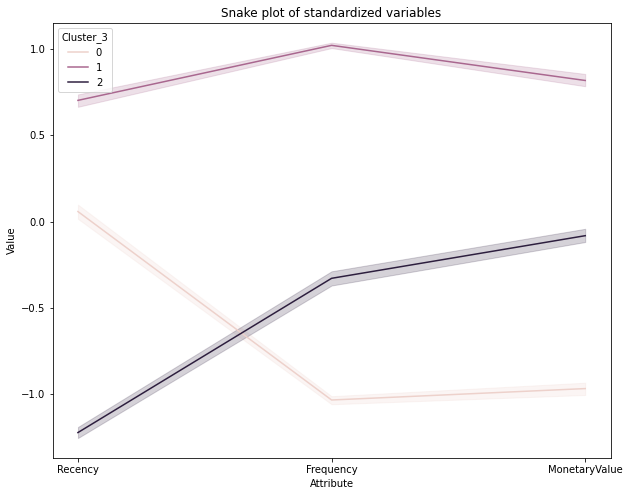

In [155]:
plt.title('Snake plot of standardized variables')
sns.lineplot(x='Attribute', y='Value', hue='Cluster_3', data = datamart_normalized_melt_3)

In [156]:
# Relative importance
cluster_avg_3 = datamart_rfm_3.groupby(['Cluster_3']).mean()
population_avg_3 = datamart_rfm.mean()
relative_imp_3 = cluster_avg_3/population_avg_3-1

In [157]:
relative_imp_3.round(2)

,Recency,Frequency,MonetaryValue
Cluster_3,,,
0,-0.11,-0.91,-0.91
1,0.61,1.08,1.10
2,-0.86,-0.59,-0.62


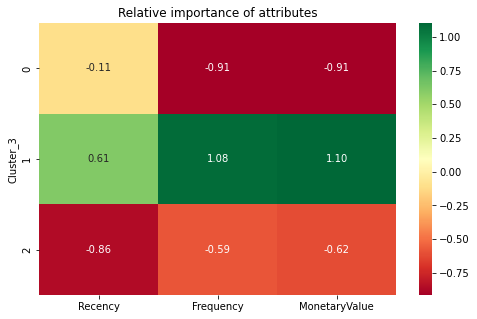

In [158]:
plt.figure(figsize=(8,5))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp_3, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

# Investigating Clusters #

In [159]:
# Add Cluster levels from k=3 and k=4
datamart['Cluster_3'] = datamart_rfm_3['Cluster_3']
datamart['Cluster_4'] = datamart_rfm_4['Cluster_4']
datamart

,Recency,Tenure,Frequency,MonetaryValue,Profit,R,F,M,P,RFM_Segment,RFM_Score,General_Segment,monetary_box,recency_box,frequency_box,Cluster_3,Cluster_4
Customer code,,,,,,,,,,,,,,,,,
MDY/001/0001,182,46,0.434783,18.481304,1.848130,2,3,2,2,2.03.02.0,7,2. Silver,2.931820,13.767610,-0.819459,1,1
MDY/001/0002,3,302,0.172185,62.817020,6.281702,4,3,3,3,4.03.03.0,10,2. Silver,4.170615,1.322832,-1.699899,2,2
MDY/001/0003,6,285,0.115789,55.060912,5.506091,4,2,3,3,4.02.03.0,9,2. Silver,4.036921,2.439151,-2.067391,2,2
MDY/001/0004,177,58,0.982759,83.401552,8.340155,2,3,3,3,2.03.03.0,8,2. Silver,4.458371,13.614559,-0.017386,1,1
MDY/001/0005,6,255,0.219608,151.733451,15.173345,4,3,4,4,4.03.04.0,11,1. Gold,5.066886,2.439151,-1.471751,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MDY/001/3507,305,1,1.000000,43.730000,4.373000,1,3,3,3,1.03.03.0,7,2. Silver,3.803328,16.872987,0.000000,1,1
MDY/001/3508,305,1,1.000000,8.470000,0.847000,1,3,1,1,1.03.01.0,5,3. Bronze,2.144604,16.872987,0.000000,1,1
MDY/001/3509,306,1,1.000000,60.080000,6.008000,1,3,3,3,1.03.03.0,7,2. Silver,4.125414,16.894402,0.000000,1,1


# Load RFM Data #

In [160]:
#DATA_DIR = Path('/Users/mitchleeson/Library/CloudStorage/OneDrive-SharedLibraries-Queen\'sUniversity/GROUP-Dunning-2nd Half - Documents/Assignments/4 MMA831 - Marketing Analytics/Final Term Project/Modelling/Segmentation')

rfm = datamart.copy()
rfm = rfm.reset_index()

In [161]:
rfm = rfm.rename(columns={'Customer code': 'Customer_code'})

In [162]:
rfm = rfm.drop(columns=['Profit', 'R', 'F', 'M', 'P', 'RFM_Segment', 
                        'monetary_box', 'recency_box', 'frequency_box', 'Cluster_3', 
                        'RFM_Score', 'General_Segment'])

In [163]:
rfm

,Customer_code,Recency,Tenure,Frequency,MonetaryValue,Cluster_4
0,MDY/001/0001,182,46,0.434783,18.481304,1
1,MDY/001/0002,3,302,0.172185,62.817020,2
2,MDY/001/0003,6,285,0.115789,55.060912,2
3,MDY/001/0004,177,58,0.982759,83.401552,1
4,MDY/001/0005,6,255,0.219608,151.733451,3
...,...,...,...,...,...,...
3450,MDY/001/3507,305,1,1.000000,43.730000,1
3451,MDY/001/3508,305,1,1.000000,8.470000,1
3452,MDY/001/3509,306,1,1.000000,60.080000,1
3453,MDY/001/3510,306,1,1.000000,89.830000,1


## join merge with rfm ##

In [164]:
mba = pd.merge(left=rfm, right=merge, how="left", left_on="Customer_code", right_on="Customer_code")

In [165]:
mba

,Customer_code,Recency,Tenure,Frequency,MonetaryValue,Cluster_4,Sale_Qty,total_rev,Sale_Qty_weekend,total_rev_weekend,transaction_count,transaction_count_weekend,unique_items,Sale_Qty_cat_Soaps,Rev_cat_Soaps,Sale_Qty_cat_Cereals,Rev_cat_Cereals,Sale_Qty_cat_Biscuits,Rev_cat_Biscuits,Sale_Qty_cat_Oils,Rev_cat_Oils,Sale_Qty_cat_Coffee,Rev_cat_Coffee,Sale_Qty_cat_Stationary,Rev_cat_Stationary,Sale_Qty_cat_Spices,Rev_cat_Spices,Sale_Qty_cat_P_Hygiene,Rev_cat_P_Hygiene,Sale_Qty_cat_Flour,Rev_cat_Flour,Sale_Qty_cat_Grocery,Rev_cat_Grocery,Sale_Qty_cat_Salt_Sugar,Rev_cat_Salt_Sugar,Sale_Qty_cat_Grocery_Daily,Rev_cat_Grocery_Daily,Sale_Qty_cat_Frozen_Dessert,Rev_cat_Frozen_Dessert,Sale_Qty_cat_Packaged_Food,Rev_cat_Packaged_Food,Sale_Qty_cat_Baby_Products,Rev_cat_Baby_Products,Sale_Qty_cat_Other,Rev_cat_Other,aov,upt
0,MDY/001/0001,182,46,0.434783,18.481304,1,42.0,965,13.0,505.0,31,11.0,29,4.0,208.0,0.0,0.0,18.0,140.0,1.0,204.0,7.0,138.0,1.0,15.0,2.00,10.0,1.0,23.0,0.0,0.0,2.0,20.0,1.0,55.0,0.0,0.0,4.0,70.0,0.0,0.0,0.0,0.0,1.00,82.0,31.129032,1.354839
1,MDY/001/0002,3,302,0.172185,62.817020,2,813.0,20631,336.0,7231.0,240,90.0,170,286.0,5092.0,32.0,3239.0,31.0,372.0,17.0,3361.0,345.0,1553.0,8.0,531.0,21.00,1665.0,18.0,1795.0,9.0,1008.0,4.0,305.0,16.0,529.0,18.0,857.0,0.0,0.0,0.0,0.0,0.0,0.0,8.00,324.0,85.962500,3.387500
2,MDY/001/0003,6,285,0.115789,55.060912,2,274.0,17017,128.0,6276.0,171,69.0,149,86.0,1827.0,25.0,3460.0,20.0,821.0,12.0,2151.0,23.0,2026.0,26.0,2437.0,31.00,1119.0,9.0,891.0,6.0,259.0,9.0,627.0,12.0,461.0,4.0,314.0,6.0,314.0,0.0,0.0,0.0,0.0,5.00,310.0,99.514620,1.602339
3,MDY/001/0004,177,58,0.982759,83.401552,1,124.0,5342,30.0,1609.0,92,20.0,81,15.0,886.0,3.0,161.0,43.0,581.0,5.0,809.0,11.0,795.0,6.0,336.0,8.00,374.0,3.0,169.0,6.0,252.0,1.0,58.0,4.0,156.0,1.0,27.0,11.0,302.0,0.0,0.0,1.0,25.0,6.00,411.0,58.065217,1.347826
4,MDY/001/0005,6,255,0.219608,151.733451,3,659.0,42433,182.0,10788.0,473,117.0,355,127.0,10098.0,85.0,5340.0,54.0,980.0,36.0,6346.0,40.0,2998.0,80.0,3201.0,39.25,2888.0,32.0,2830.0,28.0,1451.0,45.0,2825.0,24.0,791.0,32.0,1275.0,9.0,493.0,0.0,0.0,0.0,0.0,27.75,917.0,89.710359,1.393235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,MDY/001/3507,305,1,1.000000,43.730000,1,3.0,48,0.0,0.0,2,0.0,2,0.0,0.0,0.0,0.0,3.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,24.000000,1.500000
3451,MDY/001/3508,305,1,1.000000,8.470000,1,1.0,10,0.0,0.0,1,0.0,1,0.0,0.0,0.0,0.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,10.000000,1.000000
3452,MDY/001/3509,306,1,1.000000,60.080000,1,2.0,70,0.0,0.0,2,0.0,2,1.0,65.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,35.000000,1.000000
3453,MDY/001/3510,306,1,1.000000,89.830000,1,8.0,106,0.0,0.0,4,0.0,4,7.0,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,26.500000,2.000000


In [166]:
# # Export
# from pathlib import Path
# DATA_DIR_EXPORT = Path("/Users/mitchleeson/Library/CloudStorage/OneDrive-SharedLibraries-Queen'sUniversity/GROUP-Dunning-2nd Half - Documents/Assignments/4 MMA831 - Marketing Analytics/Final Term Project/Modelling/MBA")
# my_submission = mba
# my_submission.to_csv(DATA_DIR_EXPORT / 'MBA_Export_V3.csv', index='Customer code')

In [167]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import (confusion_matrix, roc_auc_score,f1_score,
                           accuracy_score)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load Data

In [168]:
df = mba.copy()
df = df.reset_index()

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3455 entries, 0 to 3454
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        3455 non-null   int64  
 1   Customer_code                3455 non-null   object 
 2   Recency                      3455 non-null   int64  
 3   Tenure                       3455 non-null   int64  
 4   Frequency                    3455 non-null   float64
 5   MonetaryValue                3455 non-null   float64
 6   Cluster_4                    3455 non-null   int32  
 7   Sale_Qty                     3455 non-null   float64
 8   total_rev                    3455 non-null   int64  
 9   Sale_Qty_weekend             3455 non-null   float64
 10  total_rev_weekend            3455 non-null   float64
 11  transaction_count            3455 non-null   int64  
 12  transaction_count_weekend    3455 non-null   float64
 13  unique_items      

In [170]:
df.head()

,index,Customer_code,Recency,Tenure,Frequency,MonetaryValue,Cluster_4,Sale_Qty,total_rev,Sale_Qty_weekend,total_rev_weekend,transaction_count,transaction_count_weekend,unique_items,Sale_Qty_cat_Soaps,Rev_cat_Soaps,Sale_Qty_cat_Cereals,Rev_cat_Cereals,Sale_Qty_cat_Biscuits,Rev_cat_Biscuits,Sale_Qty_cat_Oils,Rev_cat_Oils,Sale_Qty_cat_Coffee,Rev_cat_Coffee,Sale_Qty_cat_Stationary,Rev_cat_Stationary,Sale_Qty_cat_Spices,Rev_cat_Spices,Sale_Qty_cat_P_Hygiene,Rev_cat_P_Hygiene,Sale_Qty_cat_Flour,Rev_cat_Flour,Sale_Qty_cat_Grocery,Rev_cat_Grocery,Sale_Qty_cat_Salt_Sugar,Rev_cat_Salt_Sugar,Sale_Qty_cat_Grocery_Daily,Rev_cat_Grocery_Daily,Sale_Qty_cat_Frozen_Dessert,Rev_cat_Frozen_Dessert,Sale_Qty_cat_Packaged_Food,Rev_cat_Packaged_Food,Sale_Qty_cat_Baby_Products,Rev_cat_Baby_Products,Sale_Qty_cat_Other,Rev_cat_Other,aov,upt
0,0,MDY/001/0001,182,46,0.434783,18.481304,1,42.0,965,13.0,505.0,31,11.0,29,4.0,208.0,0.0,0.0,18.0,140.0,1.0,204.0,7.0,138.0,1.0,15.0,2.00,10.0,1.0,23.0,0.0,0.0,2.0,20.0,1.0,55.0,0.0,0.0,4.0,70.0,0.0,0.0,0.0,0.0,1.00,82.0,31.129032,1.354839
1,1,MDY/001/0002,3,302,0.172185,62.817020,2,813.0,20631,336.0,7231.0,240,90.0,170,286.0,5092.0,32.0,3239.0,31.0,372.0,17.0,3361.0,345.0,1553.0,8.0,531.0,21.00,1665.0,18.0,1795.0,9.0,1008.0,4.0,305.0,16.0,529.0,18.0,857.0,0.0,0.0,0.0,0.0,0.0,0.0,8.00,324.0,85.962500,3.387500
2,2,MDY/001/0003,6,285,0.115789,55.060912,2,274.0,17017,128.0,6276.0,171,69.0,149,86.0,1827.0,25.0,3460.0,20.0,821.0,12.0,2151.0,23.0,2026.0,26.0,2437.0,31.00,1119.0,9.0,891.0,6.0,259.0,9.0,627.0,12.0,461.0,4.0,314.0,6.0,314.0,0.0,0.0,0.0,0.0,5.00,310.0,99.514620,1.602339
3,3,MDY/001/0004,177,58,0.982759,83.401552,1,124.0,5342,30.0,1609.0,92,20.0,81,15.0,886.0,3.0,161.0,43.0,581.0,5.0,809.0,11.0,795.0,6.0,336.0,8.00,374.0,3.0,169.0,6.0,252.0,1.0,58.0,4.0,156.0,1.0,27.0,11.0,302.0,0.0,0.0,1.0,25.0,6.00,411.0,58.065217,1.347826
4,4,MDY/001/0005,6,255,0.219608,151.733451,3,659.0,42433,182.0,10788.0,473,117.0,355,127.0,10098.0,85.0,5340.0,54.0,980.0,36.0,6346.0,40.0,2998.0,80.0,3201.0,39.25,2888.0,32.0,2830.0,28.0,1451.0,45.0,2825.0,24.0,791.0,32.0,1275.0,9.0,493.0,0.0,0.0,0.0,0.0,27.75,917.0,89.710359,1.393235


In [171]:
df.shape

(3455, 48)

In [172]:
#drop the first column
df = df.iloc[: , 1:]

In [173]:
df.head()

,Customer_code,Recency,Tenure,Frequency,MonetaryValue,Cluster_4,Sale_Qty,total_rev,Sale_Qty_weekend,total_rev_weekend,transaction_count,transaction_count_weekend,unique_items,Sale_Qty_cat_Soaps,Rev_cat_Soaps,Sale_Qty_cat_Cereals,Rev_cat_Cereals,Sale_Qty_cat_Biscuits,Rev_cat_Biscuits,Sale_Qty_cat_Oils,Rev_cat_Oils,Sale_Qty_cat_Coffee,Rev_cat_Coffee,Sale_Qty_cat_Stationary,Rev_cat_Stationary,Sale_Qty_cat_Spices,Rev_cat_Spices,Sale_Qty_cat_P_Hygiene,Rev_cat_P_Hygiene,Sale_Qty_cat_Flour,Rev_cat_Flour,Sale_Qty_cat_Grocery,Rev_cat_Grocery,Sale_Qty_cat_Salt_Sugar,Rev_cat_Salt_Sugar,Sale_Qty_cat_Grocery_Daily,Rev_cat_Grocery_Daily,Sale_Qty_cat_Frozen_Dessert,Rev_cat_Frozen_Dessert,Sale_Qty_cat_Packaged_Food,Rev_cat_Packaged_Food,Sale_Qty_cat_Baby_Products,Rev_cat_Baby_Products,Sale_Qty_cat_Other,Rev_cat_Other,aov,upt
0,MDY/001/0001,182,46,0.434783,18.481304,1,42.0,965,13.0,505.0,31,11.0,29,4.0,208.0,0.0,0.0,18.0,140.0,1.0,204.0,7.0,138.0,1.0,15.0,2.00,10.0,1.0,23.0,0.0,0.0,2.0,20.0,1.0,55.0,0.0,0.0,4.0,70.0,0.0,0.0,0.0,0.0,1.00,82.0,31.129032,1.354839
1,MDY/001/0002,3,302,0.172185,62.817020,2,813.0,20631,336.0,7231.0,240,90.0,170,286.0,5092.0,32.0,3239.0,31.0,372.0,17.0,3361.0,345.0,1553.0,8.0,531.0,21.00,1665.0,18.0,1795.0,9.0,1008.0,4.0,305.0,16.0,529.0,18.0,857.0,0.0,0.0,0.0,0.0,0.0,0.0,8.00,324.0,85.962500,3.387500
2,MDY/001/0003,6,285,0.115789,55.060912,2,274.0,17017,128.0,6276.0,171,69.0,149,86.0,1827.0,25.0,3460.0,20.0,821.0,12.0,2151.0,23.0,2026.0,26.0,2437.0,31.00,1119.0,9.0,891.0,6.0,259.0,9.0,627.0,12.0,461.0,4.0,314.0,6.0,314.0,0.0,0.0,0.0,0.0,5.00,310.0,99.514620,1.602339
3,MDY/001/0004,177,58,0.982759,83.401552,1,124.0,5342,30.0,1609.0,92,20.0,81,15.0,886.0,3.0,161.0,43.0,581.0,5.0,809.0,11.0,795.0,6.0,336.0,8.00,374.0,3.0,169.0,6.0,252.0,1.0,58.0,4.0,156.0,1.0,27.0,11.0,302.0,0.0,0.0,1.0,25.0,6.00,411.0,58.065217,1.347826
4,MDY/001/0005,6,255,0.219608,151.733451,3,659.0,42433,182.0,10788.0,473,117.0,355,127.0,10098.0,85.0,5340.0,54.0,980.0,36.0,6346.0,40.0,2998.0,80.0,3201.0,39.25,2888.0,32.0,2830.0,28.0,1451.0,45.0,2825.0,24.0,791.0,32.0,1275.0,9.0,493.0,0.0,0.0,0.0,0.0,27.75,917.0,89.710359,1.393235


In [174]:
df.isnull().values.any()

False

In [175]:
df['Rev_cat_Baby_Products'].mean()

26.584659913169318

In [176]:
# #setting target variable as if purchase baby category
# df['target_cat_baby_products'] = df['Sale_Qty_cat_Baby_Products'].apply(lambda x: 0 if x <= 0 else 1)
# df['target_cat_baby_products'] = df['Sale_Qty_cat_Baby_Products'].astype('int')

In [177]:
# Create target for purchasing baby product category
def f(row):
    if row['Sale_Qty_cat_Baby_Products'] > 0 :
        val = 1
    else:
        val = 0
    return val
    
df['target_cat_baby'] = df.apply(f, axis=1)

In [178]:
df.groupby(['target_cat_baby'])['Customer_code'].count()

target_cat_baby
0    3307
1     148
Name: Customer_code, dtype: int64

In [179]:
df

,Customer_code,Recency,Tenure,Frequency,MonetaryValue,Cluster_4,Sale_Qty,total_rev,Sale_Qty_weekend,total_rev_weekend,transaction_count,transaction_count_weekend,unique_items,Sale_Qty_cat_Soaps,Rev_cat_Soaps,Sale_Qty_cat_Cereals,Rev_cat_Cereals,Sale_Qty_cat_Biscuits,Rev_cat_Biscuits,Sale_Qty_cat_Oils,Rev_cat_Oils,Sale_Qty_cat_Coffee,Rev_cat_Coffee,Sale_Qty_cat_Stationary,Rev_cat_Stationary,Sale_Qty_cat_Spices,Rev_cat_Spices,Sale_Qty_cat_P_Hygiene,Rev_cat_P_Hygiene,Sale_Qty_cat_Flour,Rev_cat_Flour,Sale_Qty_cat_Grocery,Rev_cat_Grocery,Sale_Qty_cat_Salt_Sugar,Rev_cat_Salt_Sugar,Sale_Qty_cat_Grocery_Daily,Rev_cat_Grocery_Daily,Sale_Qty_cat_Frozen_Dessert,Rev_cat_Frozen_Dessert,Sale_Qty_cat_Packaged_Food,Rev_cat_Packaged_Food,Sale_Qty_cat_Baby_Products,Rev_cat_Baby_Products,Sale_Qty_cat_Other,Rev_cat_Other,aov,upt,target_cat_baby
0,MDY/001/0001,182,46,0.434783,18.481304,1,42.0,965,13.0,505.0,31,11.0,29,4.0,208.0,0.0,0.0,18.0,140.0,1.0,204.0,7.0,138.0,1.0,15.0,2.00,10.0,1.0,23.0,0.0,0.0,2.0,20.0,1.0,55.0,0.0,0.0,4.0,70.0,0.0,0.0,0.0,0.0,1.00,82.0,31.129032,1.354839,0
1,MDY/001/0002,3,302,0.172185,62.817020,2,813.0,20631,336.0,7231.0,240,90.0,170,286.0,5092.0,32.0,3239.0,31.0,372.0,17.0,3361.0,345.0,1553.0,8.0,531.0,21.00,1665.0,18.0,1795.0,9.0,1008.0,4.0,305.0,16.0,529.0,18.0,857.0,0.0,0.0,0.0,0.0,0.0,0.0,8.00,324.0,85.962500,3.387500,0
2,MDY/001/0003,6,285,0.115789,55.060912,2,274.0,17017,128.0,6276.0,171,69.0,149,86.0,1827.0,25.0,3460.0,20.0,821.0,12.0,2151.0,23.0,2026.0,26.0,2437.0,31.00,1119.0,9.0,891.0,6.0,259.0,9.0,627.0,12.0,461.0,4.0,314.0,6.0,314.0,0.0,0.0,0.0,0.0,5.00,310.0,99.514620,1.602339,0
3,MDY/001/0004,177,58,0.982759,83.401552,1,124.0,5342,30.0,1609.0,92,20.0,81,15.0,886.0,3.0,161.0,43.0,581.0,5.0,809.0,11.0,795.0,6.0,336.0,8.00,374.0,3.0,169.0,6.0,252.0,1.0,58.0,4.0,156.0,1.0,27.0,11.0,302.0,0.0,0.0,1.0,25.0,6.00,411.0,58.065217,1.347826,1
4,MDY/001/0005,6,255,0.219608,151.733451,3,659.0,42433,182.0,10788.0,473,117.0,355,127.0,10098.0,85.0,5340.0,54.0,980.0,36.0,6346.0,40.0,2998.0,80.0,3201.0,39.25,2888.0,32.0,2830.0,28.0,1451.0,45.0,2825.0,24.0,791.0,32.0,1275.0,9.0,493.0,0.0,0.0,0.0,0.0,27.75,917.0,89.710359,1.393235,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,MDY/001/3507,305,1,1.000000,43.730000,1,3.0,48,0.0,0.0,2,0.0,2,0.0,0.0,0.0,0.0,3.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,24.000000,1.500000,0
3451,MDY/001/3508,305,1,1.000000,8.470000,1,1.0,10,0.0,0.0,1,0.0,1,0.0,0.0,0.0,0.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,10.000000,1.000000,0
3452,MDY/001/3509,306,1,1.000000,60.080000,1,2.0,70,0.0,0.0,2,0.0,2,1.0,65.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,35.000000,1.000000,0
3453,MDY/001/3510,306,1,1.000000,89.830000,1,8.0,106,0.0,0.0,4,0.0,4,7.0,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,26.500000,2.000000,0


In [180]:
#split data into training and testing based on cluster_4
grouped = df.groupby(df.Cluster_4)
#df_testing = grouped.get_group(3)  #target customer group

In [181]:
df_training0 = grouped.get_group(0) #cluster = 0
df_testing = grouped.get_group(1) #cluster = 1
df_training2 = grouped.get_group(2) #cluster = 2
df_training3 = grouped.get_group(3) #cluster = 3
frame1 = [df_training0,df_training2,df_training3]

df_training = pd.concat(frame1) #cluster 2,3 as our current customers that recency <3 months
df_testingID = df_testing['Customer_code']
df_testing = df_testing.drop('Customer_code',axis=1)
df_training = df_training.drop('Customer_code',axis=1)

In [182]:
#imbalanced dataset
df_training['target_cat_baby'].value_counts()

0    2264
1     140
Name: target_cat_baby, dtype: int64

<AxesSubplot:xlabel='target_cat_baby', ylabel='count'>

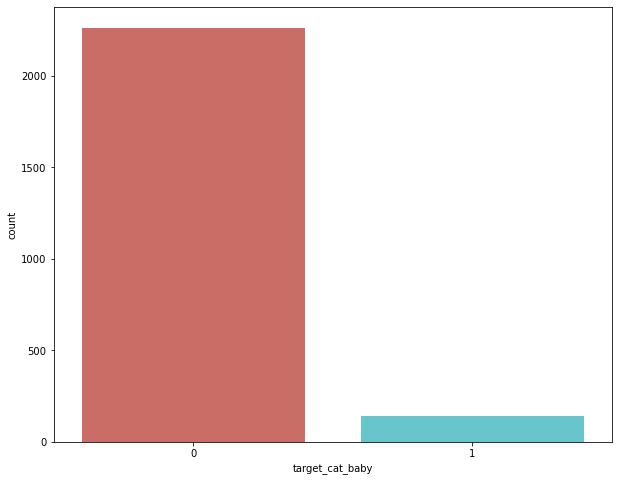

In [183]:
sns.countplot(x='target_cat_baby',data=df_training,palette='hls')
plt.show()

<Figure size 720x720 with 0 Axes>

<AxesSubplot:>

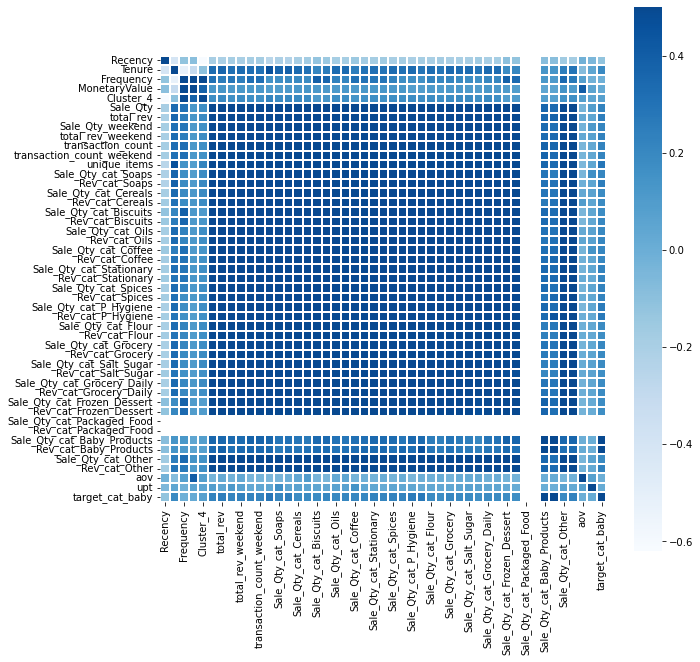

In [184]:
#Corrletion Map

corr = df_training.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=0.5, center=0,
            square=True, linewidths=2, cmap='Blues')
plt.show()

In [185]:
df_training.corr()['target_cat_baby'].sort_values(ascending=False)

target_cat_baby                1.000000
Rev_cat_Baby_Products          0.603394
Sale_Qty_cat_Baby_Products     0.550937
unique_items                   0.277981
Rev_cat_P_Hygiene              0.272705
Sale_Qty_cat_P_Hygiene         0.263837
total_rev                      0.249355
Rev_cat_Soaps                  0.246716
Rev_cat_Other                  0.225520
total_rev_weekend              0.224753
Sale_Qty                       0.224309
Sale_Qty_cat_Spices            0.223261
transaction_count              0.223138
Sale_Qty_cat_Stationary        0.222659
Rev_cat_Spices                 0.222432
transaction_count_weekend      0.216757
Sale_Qty_weekend               0.214378
Rev_cat_Stationary             0.213829
Sale_Qty_cat_Soaps             0.209041
Sale_Qty_cat_Grocery           0.206813
Sale_Qty_cat_Coffee            0.204729
Rev_cat_Oils                   0.202927
Rev_cat_Coffee                 0.202747
Rev_cat_Biscuits               0.199449
Sale_Qty_cat_Oils              0.196057


In [186]:
#drop high correlated features 
drop_cor_columns = ['Rev_cat_Baby_Products','Sale_Qty_cat_Packaged_Food','Rev_cat_Packaged_Food','Cluster_4','Sale_Qty_cat_Baby_Products']
df_training1 = df_training.drop(drop_cor_columns,axis = 1)

In [187]:
df_training = df_training1 
df_training

,Recency,Tenure,Frequency,MonetaryValue,Sale_Qty,total_rev,Sale_Qty_weekend,total_rev_weekend,transaction_count,transaction_count_weekend,unique_items,Sale_Qty_cat_Soaps,Rev_cat_Soaps,Sale_Qty_cat_Cereals,Rev_cat_Cereals,Sale_Qty_cat_Biscuits,Rev_cat_Biscuits,Sale_Qty_cat_Oils,Rev_cat_Oils,Sale_Qty_cat_Coffee,Rev_cat_Coffee,Sale_Qty_cat_Stationary,Rev_cat_Stationary,Sale_Qty_cat_Spices,Rev_cat_Spices,Sale_Qty_cat_P_Hygiene,Rev_cat_P_Hygiene,Sale_Qty_cat_Flour,Rev_cat_Flour,Sale_Qty_cat_Grocery,Rev_cat_Grocery,Sale_Qty_cat_Salt_Sugar,Rev_cat_Salt_Sugar,Sale_Qty_cat_Grocery_Daily,Rev_cat_Grocery_Daily,Sale_Qty_cat_Frozen_Dessert,Rev_cat_Frozen_Dessert,Sale_Qty_cat_Other,Rev_cat_Other,aov,upt,target_cat_baby
5,60,225,0.035556,9.511956,41.0,2281,0.0,0.0,34,0.0,28,4.0,187.0,2.0,67.0,0.0,0.0,0.0,0.0,1.0,100.0,15.0,1235.0,1.0,26.0,1.0,58.0,4.0,161.0,3.0,91.0,4.0,147.0,3.0,154.0,1.0,35.0,2.0,20.0,67.088235,1.205882,0
10,89,127,0.015748,36.193780,119.0,4922,0.0,0.0,59,0.0,57,54.0,370.0,7.0,461.0,10.0,117.0,8.0,1250.0,4.0,577.0,7.0,427.0,6.0,438.0,4.0,143.0,9.0,704.0,2.0,127.0,4.0,145.0,0.0,0.0,0.0,0.0,4.0,163.0,83.423729,2.016949,0
18,115,101,0.069307,100.874653,250.1,10913,6.0,191.0,163,6.0,139,50.0,1493.0,31.1,1919.0,23.0,196.0,14.0,2294.0,29.0,310.0,21.0,1375.0,28.0,785.0,4.0,361.0,7.0,278.0,13.0,516.0,21.0,793.0,4.0,309.0,0.0,0.0,5.0,284.0,66.950920,1.534356,0
20,52,251,0.071713,9.270040,70.0,2581,26.0,1413.0,52,19.0,45,3.0,46.0,1.0,110.0,12.0,193.0,3.0,551.0,1.0,18.0,6.0,374.0,4.0,40.0,2.0,33.0,1.0,42.0,1.0,42.0,2.0,78.0,2.0,284.0,9.0,375.0,23.0,395.0,49.634615,1.346154,0
24,207,79,0.088608,23.118228,34.0,1879,11.0,481.0,28,9.0,28,2.0,133.0,9.0,508.0,7.0,113.0,4.0,493.0,0.0,0.0,0.0,0.0,3.0,165.0,1.0,28.0,1.0,38.0,4.0,296.0,2.0,31.0,1.0,74.0,0.0,0.0,0.0,0.0,67.107143,1.214286,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3439,60,1,1.000000,119.640000,1.0,134,0.0,0.0,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134.000000,1.000000,0
3440,61,1,1.000000,614.530000,7.0,661,0.0,0.0,5,0.0,5,1.0,100.0,0.0,0.0,3.0,43.0,2.0,322.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,196.0,0.0,0.0,0.0,0.0,0.0,0.0,132.200000,1.400000,0
3441,61,1,1.000000,391.790000,6.0,421,0.0,0.0,6,0.0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,95.0,3.0,129.0,0.0,0.0,1.0,180.0,0.0,0.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,70.166667,1.000000,0
3442,61,1,1.000000,144.760000,1.0,152,0.0,0.0,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,152.000000,1.000000,0


### Splitting the data

In [188]:
X = df_training.drop(['target_cat_baby',], axis=1)
y = df_training[['target_cat_baby']]

<Figure size 1440x1080 with 0 Axes>

<AxesSubplot:>

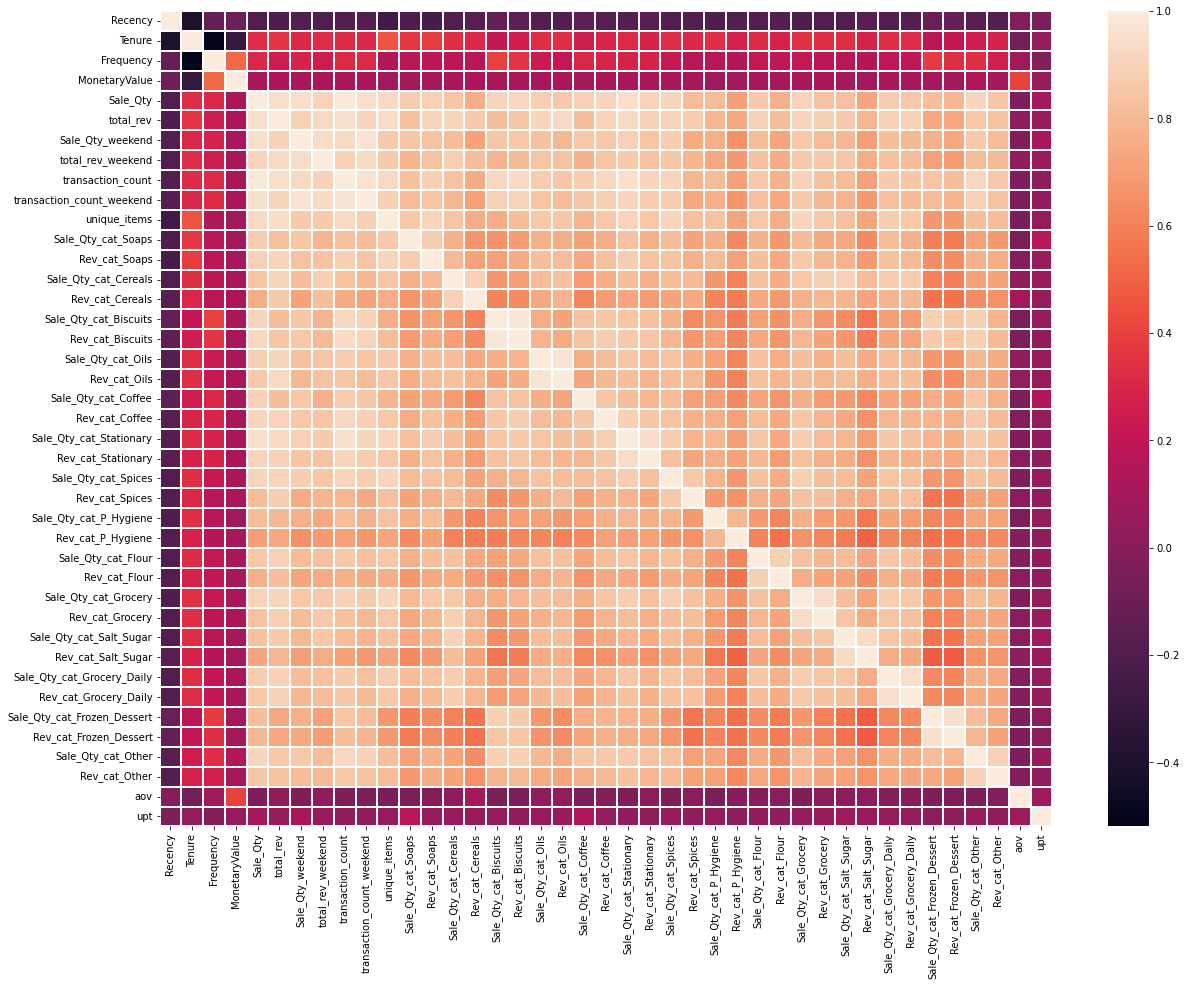

In [189]:
#Plotting again
plt.figure(figsize=(20,15))
sns.heatmap(X.corr(),linewidth=2)
plt.show()

In [190]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [191]:
corr_features = correlation(X, 0.9)
len(set(corr_features))

22

In [192]:
corr_features

{'Rev_cat_Biscuits',
 'Rev_cat_Coffee',
 'Rev_cat_Frozen_Dessert',
 'Rev_cat_Grocery',
 'Rev_cat_Grocery_Daily',
 'Rev_cat_Oils',
 'Rev_cat_Salt_Sugar',
 'Rev_cat_Soaps',
 'Rev_cat_Stationary',
 'Sale_Qty_cat_Biscuits',
 'Sale_Qty_cat_Cereals',
 'Sale_Qty_cat_Grocery',
 'Sale_Qty_cat_Oils',
 'Sale_Qty_cat_Other',
 'Sale_Qty_cat_Spices',
 'Sale_Qty_cat_Stationary',
 'Sale_Qty_weekend',
 'total_rev',
 'total_rev_weekend',
 'transaction_count',
 'transaction_count_weekend',
 'unique_items'}

In [193]:
#removed corrlection >0.9 in features
X = X.drop(corr_features,axis=1)
X


,Recency,Tenure,Frequency,MonetaryValue,Sale_Qty,Sale_Qty_cat_Soaps,Rev_cat_Cereals,Sale_Qty_cat_Coffee,Rev_cat_Spices,Sale_Qty_cat_P_Hygiene,Rev_cat_P_Hygiene,Sale_Qty_cat_Flour,Rev_cat_Flour,Sale_Qty_cat_Salt_Sugar,Sale_Qty_cat_Grocery_Daily,Sale_Qty_cat_Frozen_Dessert,Rev_cat_Other,aov,upt
5,60,225,0.035556,9.511956,41.0,4.0,67.0,1.0,26.0,1.0,58.0,4.0,161.0,4.0,3.0,1.0,20.0,67.088235,1.205882
10,89,127,0.015748,36.193780,119.0,54.0,461.0,4.0,438.0,4.0,143.0,9.0,704.0,4.0,0.0,0.0,163.0,83.423729,2.016949
18,115,101,0.069307,100.874653,250.1,50.0,1919.0,29.0,785.0,4.0,361.0,7.0,278.0,21.0,4.0,0.0,284.0,66.950920,1.534356
20,52,251,0.071713,9.270040,70.0,3.0,110.0,1.0,40.0,2.0,33.0,1.0,42.0,2.0,2.0,9.0,395.0,49.634615,1.346154
24,207,79,0.088608,23.118228,34.0,2.0,508.0,0.0,165.0,1.0,28.0,1.0,38.0,2.0,1.0,0.0,0.0,67.107143,1.214286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3439,60,1,1.000000,119.640000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134.000000,1.000000
3440,61,1,1.000000,614.530000,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,132.200000,1.400000
3441,61,1,1.000000,391.790000,6.0,0.0,0.0,0.0,129.0,0.0,0.0,1.0,180.0,1.0,0.0,0.0,0.0,70.166667,1.000000
3442,61,1,1.000000,144.760000,1.0,0.0,0.0,0.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,152.000000,1.000000


In [194]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=44)

In [195]:
y_train.value_counts()
y_test.value_counts()

target_cat_baby
0                  1811
1                   112
dtype: int64

target_cat_baby
0                  453
1                   28
dtype: int64

# Standardization 

In [196]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Model Building


In [197]:
from sklearn.linear_model import LogisticRegression
#adding class_weight to balance y
classifier7 = LogisticRegression(solver='liblinear', class_weight='balanced')
classifier7.fit(X_train,y_train.values.ravel())


LogisticRegression(class_weight='balanced', solver='liblinear')

In [198]:
y_pred7 = classifier7.predict(X_test)
print(np.concatenate((y_pred7.reshape(len(y_pred7),1), y_test.values.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]

# Metric Evaluation

[[366  87]
 [ 11  17]]


Text(0.5, 0, 'Predictions')

Text(0, 0.5, 'Actuals')

Text(0.5, 1.0, 'Confusion Matrix')

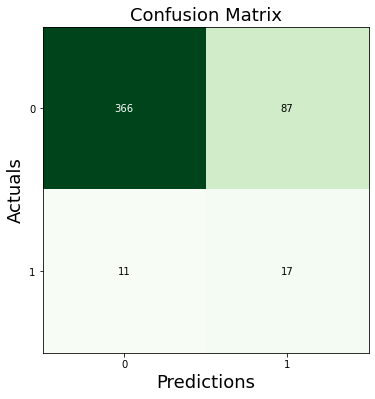

In [199]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm7 = confusion_matrix(y_test, y_pred7)
print(cm7)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm7, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [200]:
logreg=accuracy_score(y_test,y_pred7)
rocreg=roc_auc_score(y_test, y_pred7)
print('Accuracy : ',logreg,'\nROC Score : ',rocreg)

Accuracy :  0.7962577962577962 
ROC Score :  0.7075449385052035


Text(0.5, 1.0, 'Receiver Operating Characteristic')

(0.0, 1.0)

(0.0, 1.0)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

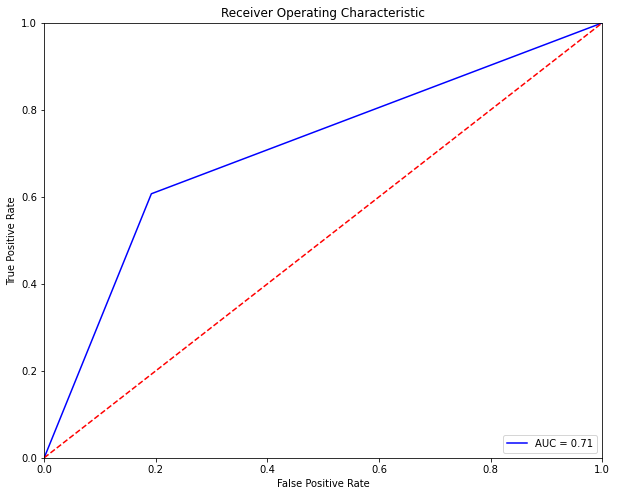

In [201]:
#Plotting curve
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier7.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred7)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Hyperparameter tunning

In [202]:
from sklearn.model_selection import GridSearchCV
parameters_lr = [{'penalty':['l1','l2'],'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
grid_search_lr = GridSearchCV(estimator = classifier7,
                           param_grid = parameters_lr,
                           scoring = 'roc_auc',
                           cv = 10,
                           n_jobs = -1)
grid_search_lr.fit(X_train, y_train.values.ravel())
best_accuracy_lr = grid_search_lr.best_score_
best_paramaeter_lr = grid_search_lr.best_params_  
print("Best roc_auc of LR: {:.2f} %".format(best_accuracy_lr.mean()*100))
print("Best Parameter of LR:", best_paramaeter_lr)

GridSearchCV(cv=10,
             estimator=LogisticRegression(class_weight='balanced',
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l1', 'l2']}],
             scoring='roc_auc')

Best roc_auc of LR: 78.25 %
Best Parameter of LR: {'C': 0.01, 'penalty': 'l1'}


### Apply the parameters

In [203]:
final_clf = LogisticRegression(C=0.01,penalty='l1',solver='liblinear', class_weight='balanced', random_state=42)
final_clf.fit(X_train,y_train.values.ravel())

LogisticRegression(C=0.01, class_weight='balanced', penalty='l1',
                   random_state=42, solver='liblinear')

In [204]:
y_pred = final_clf.predict(X_test)

[[292 161]
 [  5  23]]


Text(0.5, 0, 'Predictions')

Text(0, 0.5, 'Actuals')

Text(0.5, 1.0, 'Confusion Matrix')

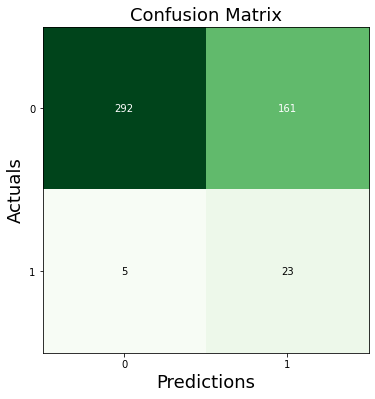

In [205]:
cm7 = confusion_matrix(y_test, y_pred)
print(cm7)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm7, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [206]:
logreg=accuracy_score(y_test,y_pred)
rocreg=roc_auc_score(y_test, y_pred)
print('Accuracy : ',logreg,'\nROC Score : ',rocreg)


Accuracy :  0.6548856548856549 
ROC Score :  0.7330100914538


In [207]:
#print summary
logreg = final_clf.fit(X_train,y_train)
logreg
print("Training set score: {:.3f}".format(logreg.score(X_train,y_train.values.ravel())))
print("Test set score: {:.3f}".format(logreg.score(X_test,y_test.values.ravel())))

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

/Users/mitchleeson/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, class_weight='balanced', penalty='l1',
                   random_state=42, solver='liblinear')

Training set score: 0.603
Test set score: 0.655
Optimization terminated successfully.
         Current function value: 0.198145
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:        target_cat_baby   No. Observations:                 2404
Model:                          Logit   Df Residuals:                     2385
Method:                           MLE   Df Model:                           18
Date:                Wed, 07 Dec 2022   Pseudo R-squ.:                  0.1078
Time:                        19:08:16   Log-Likelihood:                -476.34
converged:                       True   LL-Null:                       -533.90
Covariance Type:            nonrobust   LLR p-value:                 3.486e-16
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Recency                   

Text(0.5, 1.0, 'Receiver Operating Characteristic')

(0.0, 1.0)

(0.0, 1.0)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

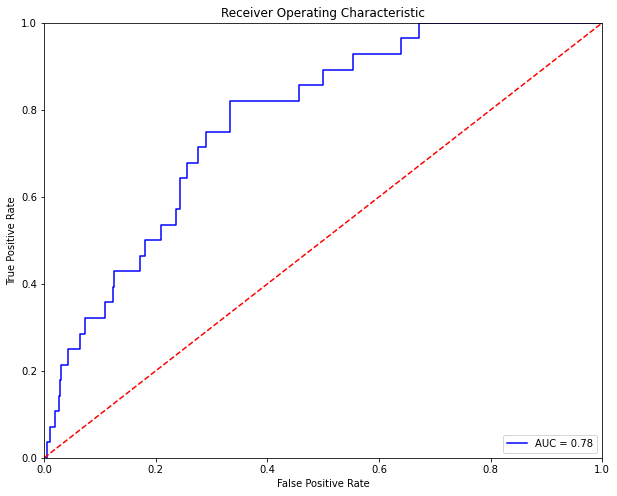

In [208]:
#Plotting curve
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = final_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [209]:
# Storing the params
result_params = pd.DataFrame(result.params,columns=['coef'],)
result_params['odds'] = np.exp(result_params['coef'])
result_params.sort_values(by=['coef'], ascending = False)

,coef,odds
Sale_Qty_cat_Frozen_Dessert,0.029306,1.029739
Sale_Qty,0.004484,1.004494
Sale_Qty_cat_Coffee,0.004477,1.004487
MonetaryValue,0.002543,1.002546
Rev_cat_P_Hygiene,0.000506,1.000506
Rev_cat_Flour,0.000133,1.000133
Rev_cat_Other,0.000098,1.000098
Rev_cat_Cereals,0.000069,1.000069
Rev_cat_Spices,0.000056,1.000056
aov,-0.002069,0.997933


In [210]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print('recall score = ',recall_score(y_test,y_pred))
print('precision score = ',precision_score(y_test,y_pred))

recall score =  0.8214285714285714
precision score =  0.125


In [211]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.64      0.78       453
           1       0.12      0.82      0.22        28

    accuracy                           0.65       481
   macro avg       0.55      0.73      0.50       481
weighted avg       0.93      0.65      0.75       481



## Predict Cluster=1 our target customers

In [212]:
target_1 = df_testing

In [213]:
target_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1051 entries, 0 to 3454
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Recency                      1051 non-null   int64  
 1   Tenure                       1051 non-null   int64  
 2   Frequency                    1051 non-null   float64
 3   MonetaryValue                1051 non-null   float64
 4   Cluster_4                    1051 non-null   int32  
 5   Sale_Qty                     1051 non-null   float64
 6   total_rev                    1051 non-null   int64  
 7   Sale_Qty_weekend             1051 non-null   float64
 8   total_rev_weekend            1051 non-null   float64
 9   transaction_count            1051 non-null   int64  
 10  transaction_count_weekend    1051 non-null   float64
 11  unique_items                 1051 non-null   int64  
 12  Sale_Qty_cat_Soaps           1051 non-null   float64
 13  Rev_cat_Soaps     

In [214]:
target_1.head()

,Recency,Tenure,Frequency,MonetaryValue,Cluster_4,Sale_Qty,total_rev,Sale_Qty_weekend,total_rev_weekend,transaction_count,transaction_count_weekend,unique_items,Sale_Qty_cat_Soaps,Rev_cat_Soaps,Sale_Qty_cat_Cereals,Rev_cat_Cereals,Sale_Qty_cat_Biscuits,Rev_cat_Biscuits,Sale_Qty_cat_Oils,Rev_cat_Oils,Sale_Qty_cat_Coffee,Rev_cat_Coffee,Sale_Qty_cat_Stationary,Rev_cat_Stationary,Sale_Qty_cat_Spices,Rev_cat_Spices,Sale_Qty_cat_P_Hygiene,Rev_cat_P_Hygiene,Sale_Qty_cat_Flour,Rev_cat_Flour,Sale_Qty_cat_Grocery,Rev_cat_Grocery,Sale_Qty_cat_Salt_Sugar,Rev_cat_Salt_Sugar,Sale_Qty_cat_Grocery_Daily,Rev_cat_Grocery_Daily,Sale_Qty_cat_Frozen_Dessert,Rev_cat_Frozen_Dessert,Sale_Qty_cat_Packaged_Food,Rev_cat_Packaged_Food,Sale_Qty_cat_Baby_Products,Rev_cat_Baby_Products,Sale_Qty_cat_Other,Rev_cat_Other,aov,upt,target_cat_baby
0,182,46,0.434783,18.481304,1,42.0,965,13.0,505.0,31,11.0,29,4.0,208.0,0.0,0.0,18.0,140.0,1.0,204.0,7.0,138.0,1.0,15.0,2.0,10.0,1.0,23.0,0.0,0.0,2.0,20.0,1.0,55.0,0.0,0.0,4.0,70.0,0.0,0.0,0.0,0.0,1.0,82.0,31.129032,1.354839,0
3,177,58,0.982759,83.401552,1,124.0,5342,30.0,1609.0,92,20.0,81,15.0,886.0,3.0,161.0,43.0,581.0,5.0,809.0,11.0,795.0,6.0,336.0,8.0,374.0,3.0,169.0,6.0,252.0,1.0,58.0,4.0,156.0,1.0,27.0,11.0,302.0,0.0,0.0,1.0,25.0,6.0,411.0,58.065217,1.347826,1
8,215,1,1.000000,56.100000,1,3.0,60,0.0,0.0,3,0.0,3,0.0,0.0,0.0,0.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.000000,1.000000,0
25,215,1,1.000000,37.000000,1,1.0,37,0.0,0.0,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.000000,1.000000,0
32,167,126,0.119048,51.474444,1,221.0,6867,0.0,0.0,94,0.0,72,126.0,1727.0,13.0,730.0,14.0,157.0,10.0,1599.0,5.0,90.0,7.0,126.0,17.0,485.0,5.0,190.0,7.0,997.0,6.0,139.0,2.0,71.0,4.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,356.0,73.053191,2.351064,0


In [215]:
#userids=target_1.Customer_code
#target_1 = target_1.drop('Customer_code',axis=1)
#target_1 = target_1.drop('Cluster_4',axis=1)
target_1 = target_1.drop(drop_cor_columns, axis=1)
target_1 = target_1.drop(corr_features, axis=1)
target_1_actual = target_1['target_cat_baby']
target_1_prediction = target_1.drop('target_cat_baby',axis=1)

In [216]:
propensities_cat_baby = final_clf.predict_proba(target_1_prediction)
propensities_cat_baby = pd.DataFrame(propensities_cat_baby)

/Users/mitchleeson/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [217]:
propensities_cat_baby.sort_values(by=[1], ascending = False)

,0,1
305,0.000000,1.000000
955,0.000000,1.000000
333,0.000000,1.000000
717,0.000000,1.000000
564,0.000000,1.000000
...,...,...
416,0.420602,0.579398
418,0.420602,0.579398
419,0.420602,0.579398
420,0.420602,0.579398


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>]], dtype=object)

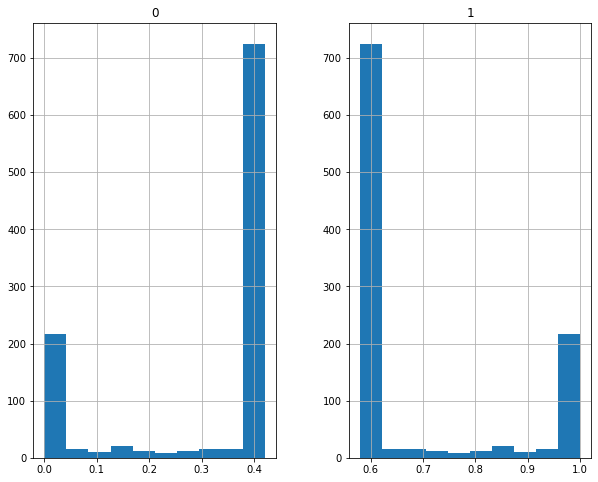

In [218]:
propensities_cat_baby.hist()

In [219]:
df_testingID = df_testingID.to_frame()

In [220]:
merged = df_testingID.merge(propensities_cat_baby, left_index=True, right_index=True, how='inner')
merged.sort_values(by = 1, ascending = False)

#### WHY IS THERE ONLY 157 MATCHING ROWS???

,Customer_code,0,1
1033,MDY/001/1044,0.000000e+00,1.000000
810,MDY/001/0820,0.000000e+00,1.000000
675,MDY/001/0681,0.000000e+00,1.000000
939,MDY/001/0950,0.000000e+00,1.000000
60,MDY/001/0063,0.000000e+00,1.000000
507,MDY/001/0512,0.000000e+00,1.000000
483,MDY/001/0488,0.000000e+00,1.000000
431,MDY/001/0436,0.000000e+00,1.000000
414,MDY/001/0418,0.000000e+00,1.000000
154,MDY/001/0158,0.000000e+00,1.000000


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>]], dtype=object)

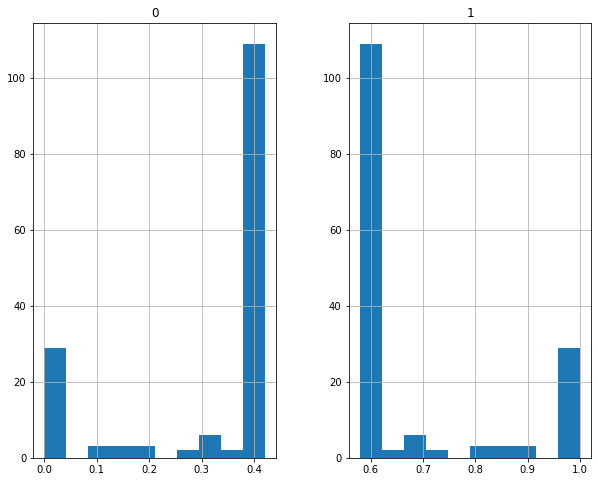

In [221]:
merged.hist()

In [222]:
over_50 = propensities_cat_baby[1] >= 0.8
pd.DataFrame(over_50).value_counts()

1    
False    779
True     272
dtype: int64

In [223]:
propensities_cat_baby_binary = final_clf.predict(target_1_prediction)
propensities_cat_baby_binary = pd.DataFrame(propensities_cat_baby_binary)

/Users/mitchleeson/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [224]:
propensities_cat_baby_binary.sort_values(by=[0], ascending = False)

,0
0,1
690,1
692,1
693,1
694,1
...,...
355,1
356,1
357,1
358,1


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

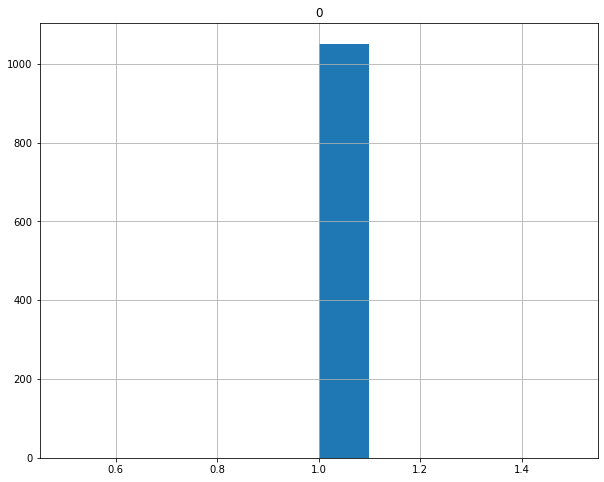

In [225]:
propensities_cat_baby_binary.hist()

/Users/mitchleeson/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

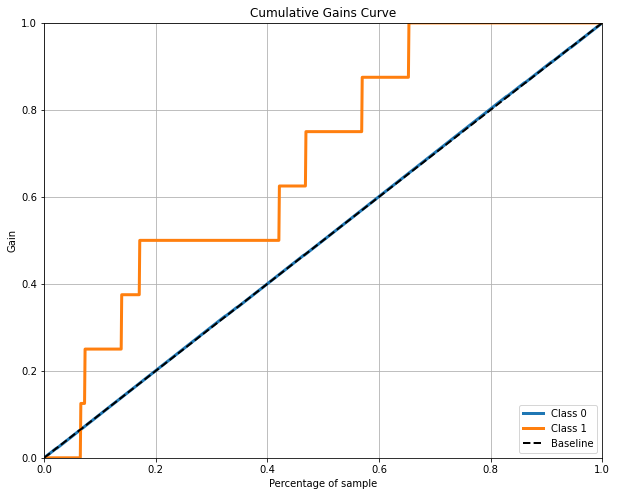

In [226]:
import matplotlib.pyplot as plt
import scikitplot as skplt

predicted_probas = final_clf.predict_proba(target_1_prediction)

skplt.metrics.plot_cumulative_gain(target_1_actual, predicted_probas)
plt.show()

In [227]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import (confusion_matrix, roc_auc_score,f1_score,
                           accuracy_score)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load Data

In [228]:
df = mba.copy()
df = df.reset_index()

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3455 entries, 0 to 3454
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        3455 non-null   int64  
 1   Customer_code                3455 non-null   object 
 2   Recency                      3455 non-null   int64  
 3   Tenure                       3455 non-null   int64  
 4   Frequency                    3455 non-null   float64
 5   MonetaryValue                3455 non-null   float64
 6   Cluster_4                    3455 non-null   int32  
 7   Sale_Qty                     3455 non-null   float64
 8   total_rev                    3455 non-null   int64  
 9   Sale_Qty_weekend             3455 non-null   float64
 10  total_rev_weekend            3455 non-null   float64
 11  transaction_count            3455 non-null   int64  
 12  transaction_count_weekend    3455 non-null   float64
 13  unique_items      

In [230]:
df.head()

,index,Customer_code,Recency,Tenure,Frequency,MonetaryValue,Cluster_4,Sale_Qty,total_rev,Sale_Qty_weekend,total_rev_weekend,transaction_count,transaction_count_weekend,unique_items,Sale_Qty_cat_Soaps,Rev_cat_Soaps,Sale_Qty_cat_Cereals,Rev_cat_Cereals,Sale_Qty_cat_Biscuits,Rev_cat_Biscuits,Sale_Qty_cat_Oils,Rev_cat_Oils,Sale_Qty_cat_Coffee,Rev_cat_Coffee,Sale_Qty_cat_Stationary,Rev_cat_Stationary,Sale_Qty_cat_Spices,Rev_cat_Spices,Sale_Qty_cat_P_Hygiene,Rev_cat_P_Hygiene,Sale_Qty_cat_Flour,Rev_cat_Flour,Sale_Qty_cat_Grocery,Rev_cat_Grocery,Sale_Qty_cat_Salt_Sugar,Rev_cat_Salt_Sugar,Sale_Qty_cat_Grocery_Daily,Rev_cat_Grocery_Daily,Sale_Qty_cat_Frozen_Dessert,Rev_cat_Frozen_Dessert,Sale_Qty_cat_Packaged_Food,Rev_cat_Packaged_Food,Sale_Qty_cat_Baby_Products,Rev_cat_Baby_Products,Sale_Qty_cat_Other,Rev_cat_Other,aov,upt
0,0,MDY/001/0001,182,46,0.434783,18.481304,1,42.0,965,13.0,505.0,31,11.0,29,4.0,208.0,0.0,0.0,18.0,140.0,1.0,204.0,7.0,138.0,1.0,15.0,2.00,10.0,1.0,23.0,0.0,0.0,2.0,20.0,1.0,55.0,0.0,0.0,4.0,70.0,0.0,0.0,0.0,0.0,1.00,82.0,31.129032,1.354839
1,1,MDY/001/0002,3,302,0.172185,62.817020,2,813.0,20631,336.0,7231.0,240,90.0,170,286.0,5092.0,32.0,3239.0,31.0,372.0,17.0,3361.0,345.0,1553.0,8.0,531.0,21.00,1665.0,18.0,1795.0,9.0,1008.0,4.0,305.0,16.0,529.0,18.0,857.0,0.0,0.0,0.0,0.0,0.0,0.0,8.00,324.0,85.962500,3.387500
2,2,MDY/001/0003,6,285,0.115789,55.060912,2,274.0,17017,128.0,6276.0,171,69.0,149,86.0,1827.0,25.0,3460.0,20.0,821.0,12.0,2151.0,23.0,2026.0,26.0,2437.0,31.00,1119.0,9.0,891.0,6.0,259.0,9.0,627.0,12.0,461.0,4.0,314.0,6.0,314.0,0.0,0.0,0.0,0.0,5.00,310.0,99.514620,1.602339
3,3,MDY/001/0004,177,58,0.982759,83.401552,1,124.0,5342,30.0,1609.0,92,20.0,81,15.0,886.0,3.0,161.0,43.0,581.0,5.0,809.0,11.0,795.0,6.0,336.0,8.00,374.0,3.0,169.0,6.0,252.0,1.0,58.0,4.0,156.0,1.0,27.0,11.0,302.0,0.0,0.0,1.0,25.0,6.00,411.0,58.065217,1.347826
4,4,MDY/001/0005,6,255,0.219608,151.733451,3,659.0,42433,182.0,10788.0,473,117.0,355,127.0,10098.0,85.0,5340.0,54.0,980.0,36.0,6346.0,40.0,2998.0,80.0,3201.0,39.25,2888.0,32.0,2830.0,28.0,1451.0,45.0,2825.0,24.0,791.0,32.0,1275.0,9.0,493.0,0.0,0.0,0.0,0.0,27.75,917.0,89.710359,1.393235


In [231]:
df.shape

(3455, 48)

In [232]:
#drop the first column
df = df.iloc[: , 1:]

In [233]:
df.head()

,Customer_code,Recency,Tenure,Frequency,MonetaryValue,Cluster_4,Sale_Qty,total_rev,Sale_Qty_weekend,total_rev_weekend,transaction_count,transaction_count_weekend,unique_items,Sale_Qty_cat_Soaps,Rev_cat_Soaps,Sale_Qty_cat_Cereals,Rev_cat_Cereals,Sale_Qty_cat_Biscuits,Rev_cat_Biscuits,Sale_Qty_cat_Oils,Rev_cat_Oils,Sale_Qty_cat_Coffee,Rev_cat_Coffee,Sale_Qty_cat_Stationary,Rev_cat_Stationary,Sale_Qty_cat_Spices,Rev_cat_Spices,Sale_Qty_cat_P_Hygiene,Rev_cat_P_Hygiene,Sale_Qty_cat_Flour,Rev_cat_Flour,Sale_Qty_cat_Grocery,Rev_cat_Grocery,Sale_Qty_cat_Salt_Sugar,Rev_cat_Salt_Sugar,Sale_Qty_cat_Grocery_Daily,Rev_cat_Grocery_Daily,Sale_Qty_cat_Frozen_Dessert,Rev_cat_Frozen_Dessert,Sale_Qty_cat_Packaged_Food,Rev_cat_Packaged_Food,Sale_Qty_cat_Baby_Products,Rev_cat_Baby_Products,Sale_Qty_cat_Other,Rev_cat_Other,aov,upt
0,MDY/001/0001,182,46,0.434783,18.481304,1,42.0,965,13.0,505.0,31,11.0,29,4.0,208.0,0.0,0.0,18.0,140.0,1.0,204.0,7.0,138.0,1.0,15.0,2.00,10.0,1.0,23.0,0.0,0.0,2.0,20.0,1.0,55.0,0.0,0.0,4.0,70.0,0.0,0.0,0.0,0.0,1.00,82.0,31.129032,1.354839
1,MDY/001/0002,3,302,0.172185,62.817020,2,813.0,20631,336.0,7231.0,240,90.0,170,286.0,5092.0,32.0,3239.0,31.0,372.0,17.0,3361.0,345.0,1553.0,8.0,531.0,21.00,1665.0,18.0,1795.0,9.0,1008.0,4.0,305.0,16.0,529.0,18.0,857.0,0.0,0.0,0.0,0.0,0.0,0.0,8.00,324.0,85.962500,3.387500
2,MDY/001/0003,6,285,0.115789,55.060912,2,274.0,17017,128.0,6276.0,171,69.0,149,86.0,1827.0,25.0,3460.0,20.0,821.0,12.0,2151.0,23.0,2026.0,26.0,2437.0,31.00,1119.0,9.0,891.0,6.0,259.0,9.0,627.0,12.0,461.0,4.0,314.0,6.0,314.0,0.0,0.0,0.0,0.0,5.00,310.0,99.514620,1.602339
3,MDY/001/0004,177,58,0.982759,83.401552,1,124.0,5342,30.0,1609.0,92,20.0,81,15.0,886.0,3.0,161.0,43.0,581.0,5.0,809.0,11.0,795.0,6.0,336.0,8.00,374.0,3.0,169.0,6.0,252.0,1.0,58.0,4.0,156.0,1.0,27.0,11.0,302.0,0.0,0.0,1.0,25.0,6.00,411.0,58.065217,1.347826
4,MDY/001/0005,6,255,0.219608,151.733451,3,659.0,42433,182.0,10788.0,473,117.0,355,127.0,10098.0,85.0,5340.0,54.0,980.0,36.0,6346.0,40.0,2998.0,80.0,3201.0,39.25,2888.0,32.0,2830.0,28.0,1451.0,45.0,2825.0,24.0,791.0,32.0,1275.0,9.0,493.0,0.0,0.0,0.0,0.0,27.75,917.0,89.710359,1.393235


In [234]:
df.isnull().values.any()

False

In [235]:
df['Rev_cat_Oils'].mean()

559.8564399421128

In [236]:
#setting target variable as if purchase Oil category sales more than avg ###Trail
df['target_cat_oil'] = df['Rev_cat_Oils'].apply(lambda x: '0' if x <= 559.8564399421128 else '1')
df['target_cat_oil'] = df['target_cat_oil'].astype('int')

In [237]:
df.groupby(['target_cat_oil'])['Customer_code'].count()

target_cat_oil
0    2756
1     699
Name: Customer_code, dtype: int64

In [238]:
#split data into training and testing based on cluster_4
grouped = df.groupby(df.Cluster_4)
#df_testing = grouped.get_group(3)  #target customer group


In [239]:
df_training0 = grouped.get_group(0) #cluster = 0
df_testing = grouped.get_group(1) #cluster = 1
df_training2 = grouped.get_group(2) #cluster = 2
df_training3 = grouped.get_group(3) #cluster = 3
frame1 = [df_training0,df_training2,df_training3]

df_training = pd.concat(frame1)#cluster 2,3 as our current customers that recency <3 months
df_testingID = df_testing['Customer_code']
df_testing = df_testing.drop('Customer_code',axis=1)
df_training = df_training.drop('Customer_code',axis=1)

In [240]:
#imbalanced dataset
df_training['target_cat_oil'].value_counts()

0    1749
1     655
Name: target_cat_oil, dtype: int64

<AxesSubplot:xlabel='target_cat_oil', ylabel='count'>

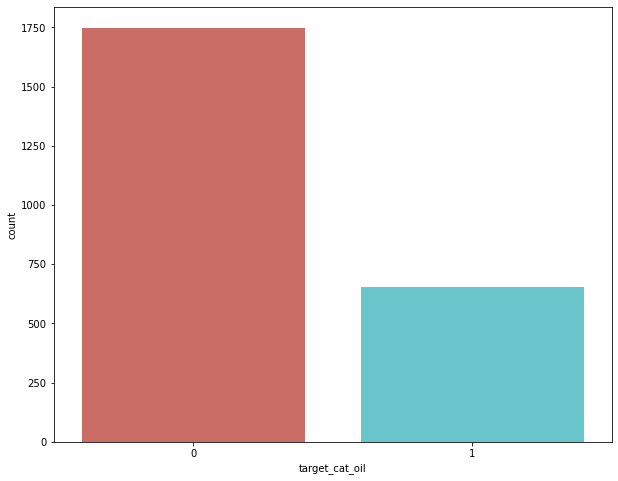

In [241]:
sns.countplot(x='target_cat_oil',data=df_training,palette='hls')
plt.show()

<Figure size 720x720 with 0 Axes>

<AxesSubplot:>

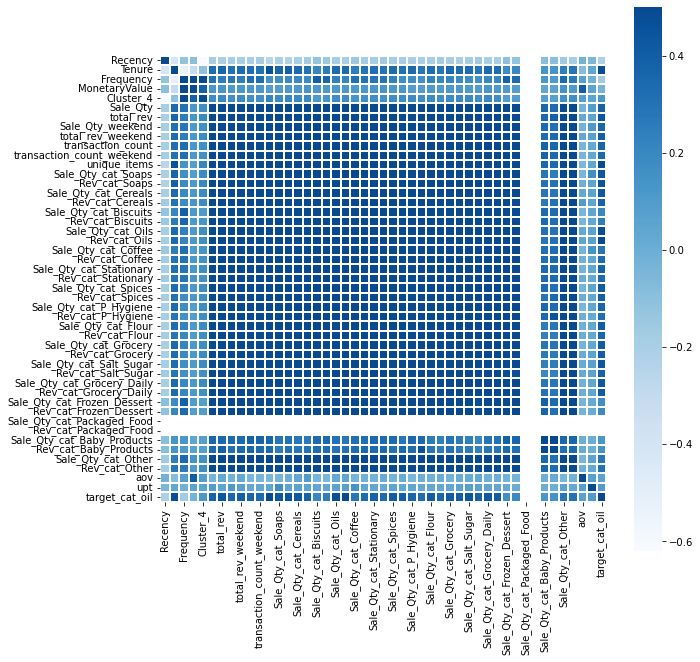

In [242]:
#Corrletion Map

corr = df_training.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=0.5, center=0,
            square=True, linewidths=2, cmap='Blues')
plt.show()

In [243]:
df_training.corr()['target_cat_oil'].sort_values(ascending=False)

target_cat_oil                 1.000000
unique_items                   0.518104
Rev_cat_Oils                   0.491102
Sale_Qty_cat_Oils              0.475867
Tenure                         0.475732
Rev_cat_Soaps                  0.439095
total_rev                      0.434496
Sale_Qty_cat_Salt_Sugar        0.431443
Sale_Qty_cat_Soaps             0.429682
Sale_Qty_cat_Cereals           0.424704
Sale_Qty_cat_Grocery_Daily     0.423425
Sale_Qty_cat_Grocery           0.412199
Rev_cat_Grocery_Daily          0.411752
Sale_Qty_cat_Flour             0.406150
Sale_Qty_cat_Spices            0.405050
Rev_cat_Grocery                0.401377
total_rev_weekend              0.394881
Rev_cat_Spices                 0.393695
Sale_Qty                       0.376601
Rev_cat_Cereals                0.374529
Sale_Qty_cat_Stationary        0.372229
Rev_cat_Salt_Sugar             0.369986
transaction_count              0.362931
Sale_Qty_cat_P_Hygiene         0.360586
Sale_Qty_weekend               0.354359


In [244]:
#drop high correlated features 
drop_cor_columns= ['Rev_cat_Oils','Sale_Qty_cat_Packaged_Food','Rev_cat_Packaged_Food','Cluster_4']
df_training1 = df_training.drop(drop_cor_columns,axis = 1)

In [245]:
df_training = df_training1 
df_training

,Recency,Tenure,Frequency,MonetaryValue,Sale_Qty,total_rev,Sale_Qty_weekend,total_rev_weekend,transaction_count,transaction_count_weekend,unique_items,Sale_Qty_cat_Soaps,Rev_cat_Soaps,Sale_Qty_cat_Cereals,Rev_cat_Cereals,Sale_Qty_cat_Biscuits,Rev_cat_Biscuits,Sale_Qty_cat_Oils,Sale_Qty_cat_Coffee,Rev_cat_Coffee,Sale_Qty_cat_Stationary,Rev_cat_Stationary,Sale_Qty_cat_Spices,Rev_cat_Spices,Sale_Qty_cat_P_Hygiene,Rev_cat_P_Hygiene,Sale_Qty_cat_Flour,Rev_cat_Flour,Sale_Qty_cat_Grocery,Rev_cat_Grocery,Sale_Qty_cat_Salt_Sugar,Rev_cat_Salt_Sugar,Sale_Qty_cat_Grocery_Daily,Rev_cat_Grocery_Daily,Sale_Qty_cat_Frozen_Dessert,Rev_cat_Frozen_Dessert,Sale_Qty_cat_Baby_Products,Rev_cat_Baby_Products,Sale_Qty_cat_Other,Rev_cat_Other,aov,upt,target_cat_oil
5,60,225,0.035556,9.511956,41.0,2281,0.0,0.0,34,0.0,28,4.0,187.0,2.0,67.0,0.0,0.0,0.0,1.0,100.0,15.0,1235.0,1.0,26.0,1.0,58.0,4.0,161.0,3.0,91.0,4.0,147.0,3.0,154.0,1.0,35.0,0.0,0.0,2.0,20.0,67.088235,1.205882,0
10,89,127,0.015748,36.193780,119.0,4922,0.0,0.0,59,0.0,57,54.0,370.0,7.0,461.0,10.0,117.0,8.0,4.0,577.0,7.0,427.0,6.0,438.0,4.0,143.0,9.0,704.0,2.0,127.0,4.0,145.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,163.0,83.423729,2.016949,1
18,115,101,0.069307,100.874653,250.1,10913,6.0,191.0,163,6.0,139,50.0,1493.0,31.1,1919.0,23.0,196.0,14.0,29.0,310.0,21.0,1375.0,28.0,785.0,4.0,361.0,7.0,278.0,13.0,516.0,21.0,793.0,4.0,309.0,0.0,0.0,0.0,0.0,5.0,284.0,66.950920,1.534356,1
20,52,251,0.071713,9.270040,70.0,2581,26.0,1413.0,52,19.0,45,3.0,46.0,1.0,110.0,12.0,193.0,3.0,1.0,18.0,6.0,374.0,4.0,40.0,2.0,33.0,1.0,42.0,1.0,42.0,2.0,78.0,2.0,284.0,9.0,375.0,0.0,0.0,23.0,395.0,49.634615,1.346154,0
24,207,79,0.088608,23.118228,34.0,1879,11.0,481.0,28,9.0,28,2.0,133.0,9.0,508.0,7.0,113.0,4.0,0.0,0.0,0.0,0.0,3.0,165.0,1.0,28.0,1.0,38.0,4.0,296.0,2.0,31.0,1.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,67.107143,1.214286,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3439,60,1,1.000000,119.640000,1.0,134,0.0,0.0,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134.000000,1.000000,0
3440,61,1,1.000000,614.530000,7.0,661,0.0,0.0,5,0.0,5,1.0,100.0,0.0,0.0,3.0,43.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,196.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132.200000,1.400000,0
3441,61,1,1.000000,391.790000,6.0,421,0.0,0.0,6,0.0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,95.0,3.0,129.0,0.0,0.0,1.0,180.0,0.0,0.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.166667,1.000000,0
3442,61,1,1.000000,144.760000,1.0,152,0.0,0.0,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,152.000000,1.000000,0


### Splitting the data

In [246]:


X = df_training.drop(['target_cat_oil',], axis=1)
y = df_training[['target_cat_oil']]



<Figure size 1440x1080 with 0 Axes>

<AxesSubplot:>

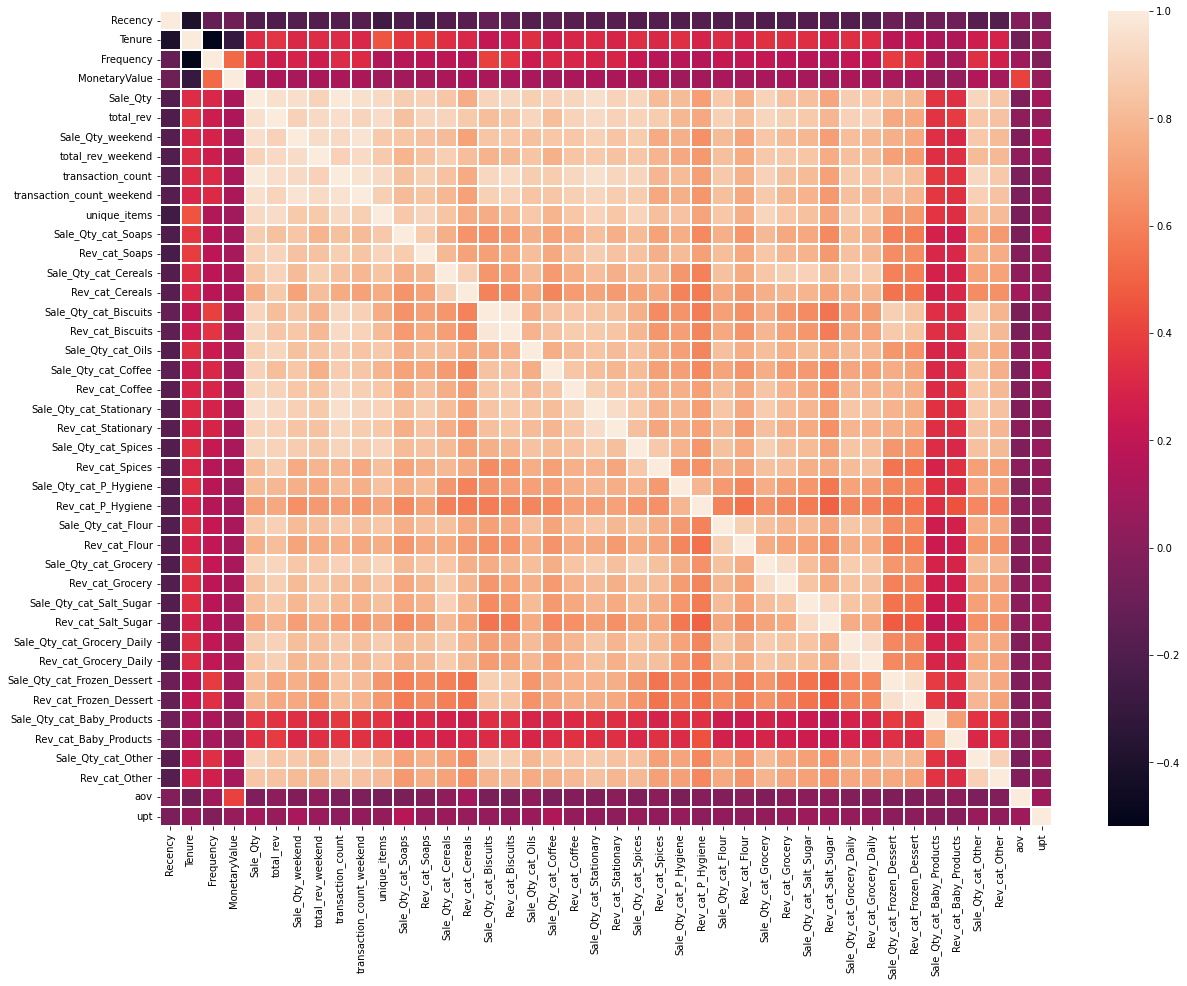

In [247]:
#Plotting again
plt.figure(figsize=(20,15))
sns.heatmap(X.corr(),linewidth=2)
plt.show()

In [248]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [249]:
corr_features = correlation(X, 0.9)
len(set(corr_features))

21

In [250]:
corr_features

{'Rev_cat_Biscuits',
 'Rev_cat_Coffee',
 'Rev_cat_Frozen_Dessert',
 'Rev_cat_Grocery',
 'Rev_cat_Grocery_Daily',
 'Rev_cat_Salt_Sugar',
 'Rev_cat_Soaps',
 'Rev_cat_Stationary',
 'Sale_Qty_cat_Biscuits',
 'Sale_Qty_cat_Cereals',
 'Sale_Qty_cat_Grocery',
 'Sale_Qty_cat_Oils',
 'Sale_Qty_cat_Other',
 'Sale_Qty_cat_Spices',
 'Sale_Qty_cat_Stationary',
 'Sale_Qty_weekend',
 'total_rev',
 'total_rev_weekend',
 'transaction_count',
 'transaction_count_weekend',
 'unique_items'}

In [251]:
#removed corrlection >0.9 in features
X = X.drop(corr_features,axis=1)
X

,Recency,Tenure,Frequency,MonetaryValue,Sale_Qty,Sale_Qty_cat_Soaps,Rev_cat_Cereals,Sale_Qty_cat_Coffee,Rev_cat_Spices,Sale_Qty_cat_P_Hygiene,Rev_cat_P_Hygiene,Sale_Qty_cat_Flour,Rev_cat_Flour,Sale_Qty_cat_Salt_Sugar,Sale_Qty_cat_Grocery_Daily,Sale_Qty_cat_Frozen_Dessert,Sale_Qty_cat_Baby_Products,Rev_cat_Baby_Products,Rev_cat_Other,aov,upt
5,60,225,0.035556,9.511956,41.0,4.0,67.0,1.0,26.0,1.0,58.0,4.0,161.0,4.0,3.0,1.0,0.0,0.0,20.0,67.088235,1.205882
10,89,127,0.015748,36.193780,119.0,54.0,461.0,4.0,438.0,4.0,143.0,9.0,704.0,4.0,0.0,0.0,0.0,0.0,163.0,83.423729,2.016949
18,115,101,0.069307,100.874653,250.1,50.0,1919.0,29.0,785.0,4.0,361.0,7.0,278.0,21.0,4.0,0.0,0.0,0.0,284.0,66.950920,1.534356
20,52,251,0.071713,9.270040,70.0,3.0,110.0,1.0,40.0,2.0,33.0,1.0,42.0,2.0,2.0,9.0,0.0,0.0,395.0,49.634615,1.346154
24,207,79,0.088608,23.118228,34.0,2.0,508.0,0.0,165.0,1.0,28.0,1.0,38.0,2.0,1.0,0.0,0.0,0.0,0.0,67.107143,1.214286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3439,60,1,1.000000,119.640000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134.000000,1.000000
3440,61,1,1.000000,614.530000,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,132.200000,1.400000
3441,61,1,1.000000,391.790000,6.0,0.0,0.0,0.0,129.0,0.0,0.0,1.0,180.0,1.0,0.0,0.0,0.0,0.0,0.0,70.166667,1.000000
3442,61,1,1.000000,144.760000,1.0,0.0,0.0,0.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,152.000000,1.000000


In [252]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=44)

In [253]:
y_train.value_counts()
y_test.value_counts()

target_cat_oil
0                 1399
1                  524
dtype: int64

target_cat_oil
0                 350
1                 131
dtype: int64

# Standalization 

In [254]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Model Building


In [255]:
from sklearn.linear_model import LogisticRegression
#adding class_weight to balance y
classifier7 = LogisticRegression(solver='liblinear', class_weight='balanced')
classifier7.fit(X_train,y_train.values.ravel())


LogisticRegression(class_weight='balanced', solver='liblinear')

In [256]:
y_pred7 = classifier7.predict(X_test)
print(np.concatenate((y_pred7.reshape(len(y_pred7),1), y_test.values.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]

# Metric Evaluation

[[309  41]
 [ 31 100]]


Text(0.5, 0, 'Predictions')

Text(0, 0.5, 'Actuals')

Text(0.5, 1.0, 'Confusion Matrix')

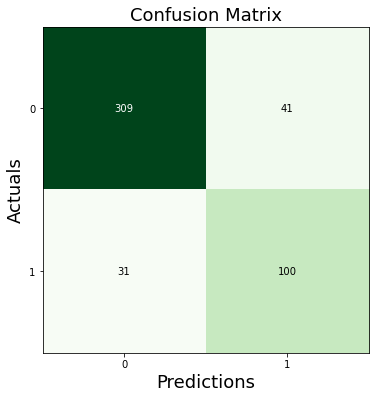

In [257]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm7 = confusion_matrix(y_test, y_pred7)
print(cm7)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm7, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [258]:
logreg=accuracy_score(y_test,y_pred7)
rocreg=roc_auc_score(y_test, y_pred7)
print('Accuracy : ',logreg,'\nROC Score : ',rocreg)

Accuracy :  0.8503118503118503 
ROC Score :  0.8231079607415485


# Hyperparameter tunning

In [259]:
from sklearn.model_selection import GridSearchCV
parameters_lr = [{'penalty':['l1','l2'],'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
grid_search_lr = GridSearchCV(estimator = classifier7,
                           param_grid = parameters_lr,
                           scoring = 'roc_auc',
                           cv = 10,
                           n_jobs = -1)
grid_search_lr.fit(X_train, y_train.values.ravel())
best_accuracy_lr = grid_search_lr.best_score_
best_paramaeter_lr = grid_search_lr.best_params_  
print("Best roc_auc of LR: {:.2f} %".format(best_accuracy_lr.mean()*100))
print("Best Parameter of LR:", best_paramaeter_lr)

GridSearchCV(cv=10,
             estimator=LogisticRegression(class_weight='balanced',
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l1', 'l2']}],
             scoring='roc_auc')

Best roc_auc of LR: 93.75 %
Best Parameter of LR: {'C': 1, 'penalty': 'l1'}


### Apply the parameters

In [260]:
final_clf = LogisticRegression(C=1,penalty='l1',solver='liblinear', class_weight='balanced', random_state=42)
final_clf.fit(X_train,y_train.values.ravel())

LogisticRegression(C=1, class_weight='balanced', penalty='l1', random_state=42,
                   solver='liblinear')

In [261]:
y_pred = final_clf.predict(X_test)

[[310  40]
 [ 30 101]]


Text(0.5, 0, 'Predictions')

Text(0, 0.5, 'Actuals')

Text(0.5, 1.0, 'Confusion Matrix')

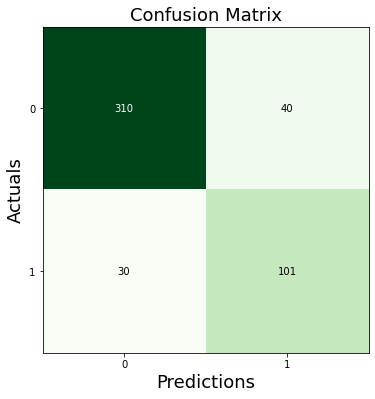

In [262]:
cm7 = confusion_matrix(y_test, y_pred)
print(cm7)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm7, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [263]:
logreg=accuracy_score(y_test,y_pred)
rocreg=roc_auc_score(y_test, y_pred)
print('Accuracy : ',logreg,'\nROC Score : ',rocreg)


Accuracy :  0.8544698544698545 
ROC Score :  0.8283533260632496


In [264]:
#print summary
logreg = final_clf.fit(X_train,y_train)
logreg
print("Training set score: {:.3f}".format(logreg.score(X_train,y_train.values.ravel())))
print("Test set score: {:.3f}".format(logreg.score(X_test,y_test.values.ravel())))

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

/Users/mitchleeson/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, class_weight='balanced', penalty='l1', random_state=42,
                   solver='liblinear')

Training set score: 0.873
Test set score: 0.854
Optimization terminated successfully.
         Current function value: 0.313383
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:         target_cat_oil   No. Observations:                 2404
Model:                          Logit   Df Residuals:                     2383
Method:                           MLE   Df Model:                           20
Date:                Wed, 07 Dec 2022   Pseudo R-squ.:                  0.4649
Time:                        19:08:23   Log-Likelihood:                -753.37
converged:                       True   LL-Null:                       -1408.0
Covariance Type:            nonrobust   LLR p-value:                3.066e-265
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Recency                  

Text(0.5, 1.0, 'Receiver Operating Characteristic')

(0.0, 1.0)

(0.0, 1.0)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

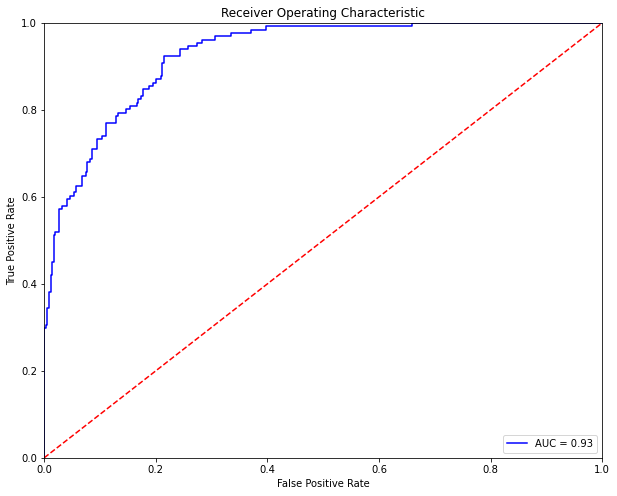

In [265]:
#Plotting curve
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = final_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [266]:
#drop insignificant features



In [267]:
# Storing the params
result_params = pd.DataFrame(result.params,columns=['coef'],)
result_params['odds'] = np.exp(result_params['coef'])
result_params.sort_values(by=['coef'], ascending = False)

,coef,odds
Sale_Qty_cat_Salt_Sugar,0.150801,1.162765
Sale_Qty_cat_Flour,0.062856,1.064873
Sale_Qty_cat_Grocery_Daily,0.050288,1.051574
Sale_Qty,0.022726,1.022987
MonetaryValue,0.003705,1.003712
aov,0.003561,1.003567
Rev_cat_Flour,0.000335,1.000335
Rev_cat_Baby_Products,0.000312,1.000312
Rev_cat_Spices,0.000249,1.000249
Rev_cat_P_Hygiene,0.000091,1.000091


In [268]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print('recall score = ',recall_score(y_test,y_pred))
print('precision score = ',precision_score(y_test,y_pred))

recall score =  0.7709923664122137
precision score =  0.7163120567375887


In [269]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       350
           1       0.72      0.77      0.74       131

    accuracy                           0.85       481
   macro avg       0.81      0.83      0.82       481
weighted avg       0.86      0.85      0.86       481



## Predict Cluster=1 our target customers

In [270]:
target_1 = df_testing

In [271]:
target_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1051 entries, 0 to 3454
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Recency                      1051 non-null   int64  
 1   Tenure                       1051 non-null   int64  
 2   Frequency                    1051 non-null   float64
 3   MonetaryValue                1051 non-null   float64
 4   Cluster_4                    1051 non-null   int32  
 5   Sale_Qty                     1051 non-null   float64
 6   total_rev                    1051 non-null   int64  
 7   Sale_Qty_weekend             1051 non-null   float64
 8   total_rev_weekend            1051 non-null   float64
 9   transaction_count            1051 non-null   int64  
 10  transaction_count_weekend    1051 non-null   float64
 11  unique_items                 1051 non-null   int64  
 12  Sale_Qty_cat_Soaps           1051 non-null   float64
 13  Rev_cat_Soaps     

In [272]:
target_1.head()

,Recency,Tenure,Frequency,MonetaryValue,Cluster_4,Sale_Qty,total_rev,Sale_Qty_weekend,total_rev_weekend,transaction_count,transaction_count_weekend,unique_items,Sale_Qty_cat_Soaps,Rev_cat_Soaps,Sale_Qty_cat_Cereals,Rev_cat_Cereals,Sale_Qty_cat_Biscuits,Rev_cat_Biscuits,Sale_Qty_cat_Oils,Rev_cat_Oils,Sale_Qty_cat_Coffee,Rev_cat_Coffee,Sale_Qty_cat_Stationary,Rev_cat_Stationary,Sale_Qty_cat_Spices,Rev_cat_Spices,Sale_Qty_cat_P_Hygiene,Rev_cat_P_Hygiene,Sale_Qty_cat_Flour,Rev_cat_Flour,Sale_Qty_cat_Grocery,Rev_cat_Grocery,Sale_Qty_cat_Salt_Sugar,Rev_cat_Salt_Sugar,Sale_Qty_cat_Grocery_Daily,Rev_cat_Grocery_Daily,Sale_Qty_cat_Frozen_Dessert,Rev_cat_Frozen_Dessert,Sale_Qty_cat_Packaged_Food,Rev_cat_Packaged_Food,Sale_Qty_cat_Baby_Products,Rev_cat_Baby_Products,Sale_Qty_cat_Other,Rev_cat_Other,aov,upt,target_cat_oil
0,182,46,0.434783,18.481304,1,42.0,965,13.0,505.0,31,11.0,29,4.0,208.0,0.0,0.0,18.0,140.0,1.0,204.0,7.0,138.0,1.0,15.0,2.0,10.0,1.0,23.0,0.0,0.0,2.0,20.0,1.0,55.0,0.0,0.0,4.0,70.0,0.0,0.0,0.0,0.0,1.0,82.0,31.129032,1.354839,0
3,177,58,0.982759,83.401552,1,124.0,5342,30.0,1609.0,92,20.0,81,15.0,886.0,3.0,161.0,43.0,581.0,5.0,809.0,11.0,795.0,6.0,336.0,8.0,374.0,3.0,169.0,6.0,252.0,1.0,58.0,4.0,156.0,1.0,27.0,11.0,302.0,0.0,0.0,1.0,25.0,6.0,411.0,58.065217,1.347826,1
8,215,1,1.000000,56.100000,1,3.0,60,0.0,0.0,3,0.0,3,0.0,0.0,0.0,0.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.000000,1.000000,0
25,215,1,1.000000,37.000000,1,1.0,37,0.0,0.0,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.000000,1.000000,0
32,167,126,0.119048,51.474444,1,221.0,6867,0.0,0.0,94,0.0,72,126.0,1727.0,13.0,730.0,14.0,157.0,10.0,1599.0,5.0,90.0,7.0,126.0,17.0,485.0,5.0,190.0,7.0,997.0,6.0,139.0,2.0,71.0,4.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,356.0,73.053191,2.351064,1


In [273]:
#userids=target_1.Customer_code
#target_1 = target_1.drop('Customer_code',axis=1)
#target_1 = target_1.drop('Cluster_4',axis=1)
target_1 = target_1.drop(drop_cor_columns,axis=1)
target_1 = target_1.drop(corr_features,axis=1)                   
target_1_prediction =target_1.drop('target_cat_oil',axis=1)

In [274]:
propensities_cat_oil = final_clf.predict(target_1_prediction)
propensities_cat_oil = pd.DataFrame(propensities_cat_oil)

/Users/mitchleeson/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [275]:
propensities_cat_oil.sort_values(by=[0], ascending = False)

,0
0,1
690,1
692,1
693,1
694,1
...,...
227,0
42,0
463,0
355,0


In [276]:
propensities_cat_oil.value_counts()

1    1043
0       8
dtype: int64

In [277]:
df_testingID = df_testingID.to_frame()

In [278]:
merged = df_testingID.merge(propensities_cat_oil, left_index=True, right_index=True, how='inner')
merged

,Customer_code,0
0,MDY/001/0001,1
3,MDY/001/0004,1
8,MDY/001/0009,1
25,MDY/001/0027,1
32,MDY/001/0034,1
60,MDY/001/0063,1
81,MDY/001/0084,0
92,MDY/001/0095,1
102,MDY/001/0105,1
131,MDY/001/0135,1


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

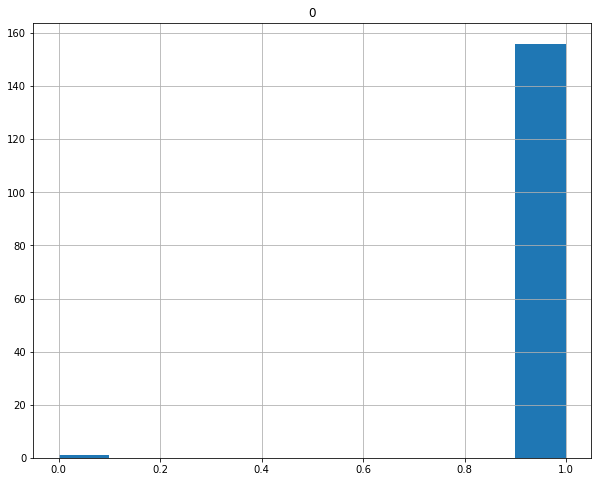

In [279]:
merged.hist()

In [280]:
propensities_cat_oil

,0
0,1
1,1
2,1
3,1
4,1
...,...
1046,1
1047,1
1048,1
1049,1


# CHURN

In [281]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
#import statsmodels.api as sm
from sklearn.metrics import (confusion_matrix, roc_auc_score,f1_score,accuracy_score)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [282]:
import statsmodels.api as sm

In [283]:
cdf = pd.read_excel("DunningMMA831.xlsx", sheet_name='Propensity_V5')

In [284]:
cdf.head()

,Sl No,Invoice Date,Customer code,Join_Before_Feb,HSN Code,Item Name,Main Category,UOM,Total Price,GST,Sale Qty,Total Before Tax,Price per item,Sale Amt (After Tax),Price Per Item (Excluding GST)
0,251,2021-12-12,MDY/001/1138,1,1905.0,Unibic Wafers Strawbery 5 Rs,_Biscuits,Pkt(24 Pcs),104.0,0.18,1.0,88.135593,88.14,104,85.28
1,243,2021-12-12,MDY/001/1138,1,9109.0,Morchai Dust Elacchi Mix 250g,_Coffee,Pcs,76.0,0.05,1.0,72.380952,72.38,76,72.20
2,241,2021-12-12,MDY/001/1138,1,1905.0,Hi Fi Biscuits 5 Rs,_Biscuits,Pkt(12 Pcs),54.0,0.18,1.0,45.762712,45.76,54,44.28
3,247,2021-12-12,MDY/001/1138,1,1905.0,Unibic Wafers Rich Chocolate 10 Rs,_Biscuits,Pcs,9.0,0.18,5.0,7.627119,38.14,45,7.38
4,251,2021-12-12,MDY/001/1138,1,1905.0,Dark Fantasy 35 Rs,_Biscuits,Pcs,32.0,0.18,1.0,27.118644,27.12,32,26.24


In [285]:
cdf1 = cdf.drop(columns = ['Sl No','HSN Code','Item Name','UOM'])
cdf1.head()

,Invoice Date,Customer code,Join_Before_Feb,Main Category,Total Price,GST,Sale Qty,Total Before Tax,Price per item,Sale Amt (After Tax),Price Per Item (Excluding GST)
0,2021-12-12,MDY/001/1138,1,_Biscuits,104.0,0.18,1.0,88.135593,88.14,104,85.28
1,2021-12-12,MDY/001/1138,1,_Coffee,76.0,0.05,1.0,72.380952,72.38,76,72.20
2,2021-12-12,MDY/001/1138,1,_Biscuits,54.0,0.18,1.0,45.762712,45.76,54,44.28
3,2021-12-12,MDY/001/1138,1,_Biscuits,9.0,0.18,5.0,7.627119,38.14,45,7.38
4,2021-12-12,MDY/001/1138,1,_Biscuits,32.0,0.18,1.0,27.118644,27.12,32,26.24


In [286]:
cdf1['Customer code'] = pd.Series(cdf1['Customer code'], dtype="string") #Convert customer code to string

In [287]:
cdf1.dtypes

Invoice Date                      datetime64[ns]
Customer code                             string
Join_Before_Feb                            int64
Main Category                             object
Total Price                              float64
GST                                      float64
Sale Qty                                 float64
Total Before Tax                         float64
Price per item                           float64
Sale Amt (After Tax)                       int64
Price Per Item (Excluding GST)           float64
dtype: object

In [288]:
cdf1['Date2'] = cdf1['Invoice Date']

In [289]:
d = {'Invoice Date':'First_Purchase', 'Date2':'Last_Purchase'}

TL = cdf1.groupby('Customer code',as_index = False).agg(
    {'Invoice Date':'min','Date2':'max'}).rename(columns = d) #Getting First Purchase and Lst Purchase Date
TL['Days_Since_Last_Purchase'] = (pd.to_datetime('2022-10-01') - TL['Last_Purchase']).astype('timedelta64[D]') #Determine churned or not
TL['Targeting Group'] = (pd.to_datetime('2022-10-31') - TL['Last_Purchase']).astype('timedelta64[D]') #Determine churned or not
TL['Days_Since_First_Purchase'] = (pd.to_datetime('2022-10-01') - TL['First_Purchase']).astype('timedelta64[D]') #Determine targeting groups
TL['Duration'] = (TL['Last_Purchase'] - TL['First_Purchase']).astype('timedelta64[D]') #Duration as Customer
TL

,Customer code,First_Purchase,Last_Purchase,Days_Since_Last_Purchase,Targeting Group,Days_Since_First_Purchase,Duration
0,MDY/001/0001,2022-03-19,2022-05-03,151.0,181.0,196.0,45.0
1,MDY/001/0002,2022-01-01,2022-10-29,-28.0,2.0,273.0,301.0
2,MDY/001/0003,2022-01-15,2022-10-26,-25.0,5.0,259.0,284.0
3,MDY/001/0004,2022-03-12,2022-05-08,146.0,176.0,203.0,57.0
4,MDY/001/0005,2022-02-14,2022-10-26,-25.0,5.0,229.0,254.0
...,...,...,...,...,...,...,...
3505,MDY/001/3507,2021-12-31,2021-12-31,274.0,304.0,274.0,0.0
3506,MDY/001/3508,2021-12-31,2021-12-31,274.0,304.0,274.0,0.0
3507,MDY/001/3509,2021-12-30,2021-12-30,275.0,305.0,275.0,0.0
3508,MDY/001/3510,2021-12-30,2021-12-30,275.0,305.0,275.0,0.0


<AxesSubplot:>

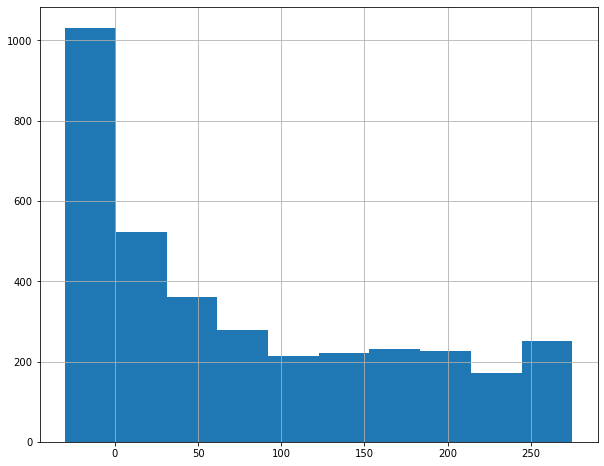

In [290]:
TL['Days_Since_Last_Purchase'].hist()

<AxesSubplot:>

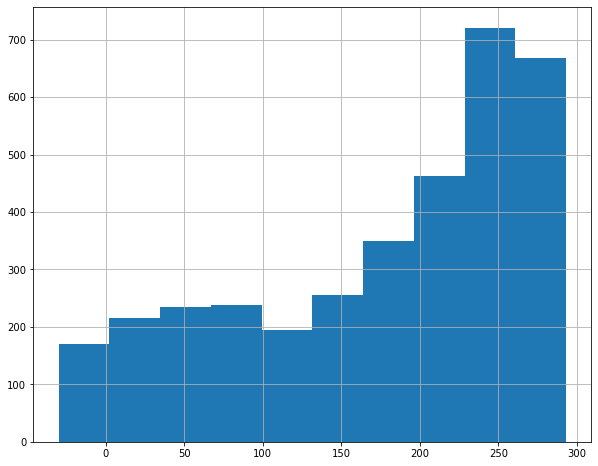

In [291]:
TL['Days_Since_First_Purchase'].hist()

## Problem Statement:
### I want to know how many existing customers are likely to churn(define a group) / churn pattern(that would be applied on the whole dataset).
### For the predicting group we are targeting customers who purchase in the past 30 days.

### Training: everyone from the first date til the cut-off date (30 days before)

### Churn period : prior 30 days

#### Those target days can be changed after discussing

,Customer code,First_Purchase,Last_Purchase,Days_Since_Last_Purchase,Days_Since_First_Purchase,Duration,Churned,Target_Indicator
0,MDY/001/0001,2022-03-19,2022-05-03,151.0,196.0,45.0,1,0
1,MDY/001/0002,2022-01-01,2022-10-29,-28.0,273.0,301.0,0,1
2,MDY/001/0003,2022-01-15,2022-10-26,-25.0,259.0,284.0,0,1
3,MDY/001/0004,2022-03-12,2022-05-08,146.0,203.0,57.0,1,0
4,MDY/001/0005,2022-02-14,2022-10-26,-25.0,229.0,254.0,0,1
...,...,...,...,...,...,...,...,...
3505,MDY/001/3507,2021-12-31,2021-12-31,274.0,274.0,0.0,1,0
3506,MDY/001/3508,2021-12-31,2021-12-31,274.0,274.0,0.0,1,0
3507,MDY/001/3509,2021-12-30,2021-12-30,275.0,275.0,0.0,1,0
3508,MDY/001/3510,2021-12-30,2021-12-30,275.0,275.0,0.0,1,0


<AxesSubplot:>

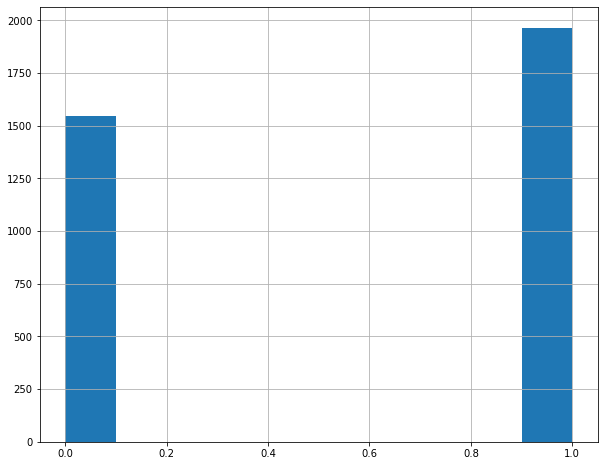

In [292]:
TL['Churned'] = np.where(TL['Days_Since_Last_Purchase'] >= 30,1,0)
TL['Target_Indicator'] = np.where(TL['Targeting Group'] <= 30,1,0)
#This would be the churned set to map back.
TL1 = TL.drop(columns = ['Targeting Group'])
TL1
TL1['Churned'].hist()

<AxesSubplot:>

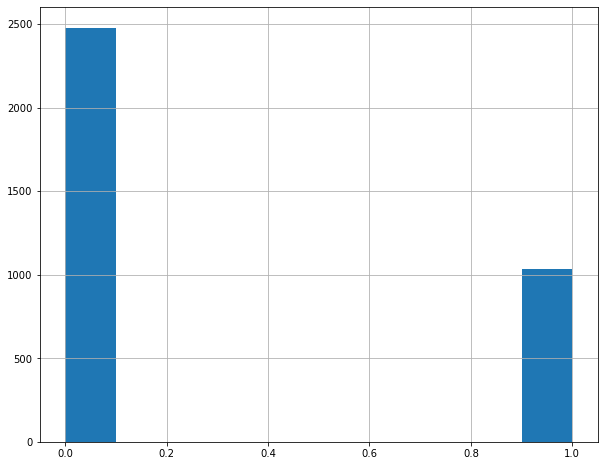

In [293]:
TL1['Target_Indicator'].hist()

In [294]:
TL = TL1

#### Let the churned indicator sit here....Proceed with the main raw data cdf1

In [295]:
cdf2 = cdf1.drop(columns = ['Total Price','Sale Amt (After Tax)','Price per item','Price Per Item (Excluding GST)','Date2']) #Dropping correlated columns
cdf2['Weekday'] = cdf2['Invoice Date'].dt.day_name() #adding in weekday indicator
cdf2['IsWeekend'] = np.where(cdf2['Weekday'].isin(['Sunday','Saturday']),1,0)
cdf2.head()

,Invoice Date,Customer code,Join_Before_Feb,Main Category,GST,Sale Qty,Total Before Tax,Weekday,IsWeekend
0,2021-12-12,MDY/001/1138,1,_Biscuits,0.18,1.0,88.135593,Sunday,1
1,2021-12-12,MDY/001/1138,1,_Coffee,0.05,1.0,72.380952,Sunday,1
2,2021-12-12,MDY/001/1138,1,_Biscuits,0.18,1.0,45.762712,Sunday,1
3,2021-12-12,MDY/001/1138,1,_Biscuits,0.18,5.0,7.627119,Sunday,1
4,2021-12-12,MDY/001/1138,1,_Biscuits,0.18,1.0,27.118644,Sunday,1


In [296]:
merged = cdf2.groupby(['Customer code','Join_Before_Feb'], as_index = False).sum()
merged = merged.drop(columns = ['GST','IsWeekend'],axis = 1)
cats = cdf2['Main Category'].unique()

for cat in cats:
    # it is cat, but not cat , not Huhu as well
    d = {'Total Before Tax':f"Rev_cat{cat}", 'Sale Qty':f"Qty_cat{cat}"}
    Fin = pd.DataFrame(cdf2.loc[cdf2['Main Category'] == cat,:].groupby
                       (by = 'Customer code').agg
                       ({'Total Before Tax':'mean','Sale Qty':'mean'}).rename(columns = d).reset_index())
    merged = pd.merge(merged,Fin,on = 'Customer code', how = 'left').fillna(0)

merged.head()

,Customer code,Join_Before_Feb,Sale Qty,Total Before Tax,Rev_cat_Biscuits,Qty_cat_Biscuits,Rev_cat_Coffee,Qty_cat_Coffee,Rev_cat_Cereals,Qty_cat_Cereals,Rev_cat_Oils,Qty_cat_Oils,Rev_cat_GroceryDaily,Qty_cat_GroceryDaily,Rev_cat_Soaps,Qty_cat_Soaps,Rev_cat_SaltSugar,Qty_cat_SaltSugar,Rev_cat_Spices,Qty_cat_Spices,Rev_cat_Stationary,Qty_cat_Stationary,Rev_cat_PackagedFood,Qty_cat_PackagedFood,Rev_cat_Flour,Qty_cat_Flour,Rev_cat_PHygiene,Qty_cat_PHygiene,Rev_cat_Grocery,Qty_cat_Grocery,Rev_cat_BabyProducts,Qty_cat_BabyProducts,Rev_cat_FrozenDessert,Qty_cat_FrozenDessert,Rev_catOther,Qty_catOther
0,MDY/001/0001,0,42.0,760.739003,7.994717,1.636364,16.703238,1.166667,78.095238,1.000000,182.142857,1.000000,0.000000,0.000000,50.282486,1.333333,55.000000,1.000000,4.464286,2.000000,14.285714,1.000000,0.000000,0.000000,0.000000,0.000000,19.491525,1.000000,8.928571,2.000000,0.000000,0.0,14.830508,1.000000,0.000000,0.000000
1,MDY/001/0002,1,813.0,16375.722054,10.485086,1.347826,36.629077,15.681818,105.321839,1.103448,204.706960,1.307692,46.056878,1.000000,56.441095,4.688525,28.787879,1.454545,75.846772,1.050000,68.194051,1.142857,45.833333,1.000000,114.380952,1.125000,91.251246,1.058824,68.744956,1.000000,0.000000,0.0,0.000000,0.000000,37.877976,1.250000
2,MDY/001/0003,1,274.0,13553.078521,44.545964,1.333333,103.269011,1.437500,141.892269,1.130435,165.554659,1.333333,78.500000,1.000000,31.926150,3.185185,36.734694,1.714286,55.741715,1.937500,92.099388,1.130435,63.660714,1.000000,41.695238,1.200000,84.205355,1.000000,65.373509,1.000000,0.000000,0.0,52.754237,1.500000,71.372074,1.000000
3,MDY/001/0004,0,124.0,4389.624924,16.468478,1.592593,65.887411,1.000000,53.666667,1.000000,154.095238,1.000000,27.000000,1.000000,56.844850,1.153846,37.142857,1.333333,50.211310,2.000000,59.932203,1.200000,40.000000,1.000000,42.771429,1.200000,49.011299,1.000000,55.238095,1.000000,21.186441,1.0,24.915254,2.200000,77.232143,1.250000
4,MDY/001/0005,1,659.0,32540.913459,18.644993,1.500000,100.839736,1.538462,63.237265,1.246377,160.215506,1.636364,51.665574,1.684211,94.435573,1.530120,33.800454,1.142857,75.571170,1.083333,52.012741,1.904762,45.144942,1.333333,50.844720,1.217391,77.268849,1.103448,58.217180,1.210526,0.000000,0.0,53.753027,1.285714,32.977743,1.134615


In [297]:
RFM = mba.copy()
RFM = df.reset_index()
RFM = RFM.sort_values(by = 'Customer_code').rename(columns = {"Customer_code":"Customer code"}).reset_index(drop = True)
RFM.head()

,index,Customer code,Recency,Tenure,Frequency,MonetaryValue,Cluster_4,Sale_Qty,total_rev,Sale_Qty_weekend,total_rev_weekend,transaction_count,transaction_count_weekend,unique_items,Sale_Qty_cat_Soaps,Rev_cat_Soaps,Sale_Qty_cat_Cereals,Rev_cat_Cereals,Sale_Qty_cat_Biscuits,Rev_cat_Biscuits,Sale_Qty_cat_Oils,Rev_cat_Oils,Sale_Qty_cat_Coffee,Rev_cat_Coffee,Sale_Qty_cat_Stationary,Rev_cat_Stationary,Sale_Qty_cat_Spices,Rev_cat_Spices,Sale_Qty_cat_P_Hygiene,Rev_cat_P_Hygiene,Sale_Qty_cat_Flour,Rev_cat_Flour,Sale_Qty_cat_Grocery,Rev_cat_Grocery,Sale_Qty_cat_Salt_Sugar,Rev_cat_Salt_Sugar,Sale_Qty_cat_Grocery_Daily,Rev_cat_Grocery_Daily,Sale_Qty_cat_Frozen_Dessert,Rev_cat_Frozen_Dessert,Sale_Qty_cat_Packaged_Food,Rev_cat_Packaged_Food,Sale_Qty_cat_Baby_Products,Rev_cat_Baby_Products,Sale_Qty_cat_Other,Rev_cat_Other,aov,upt,target_cat_oil
0,0,MDY/001/0001,182,46,0.434783,18.481304,1,42.0,965,13.0,505.0,31,11.0,29,4.0,208.0,0.0,0.0,18.0,140.0,1.0,204.0,7.0,138.0,1.0,15.0,2.00,10.0,1.0,23.0,0.0,0.0,2.0,20.0,1.0,55.0,0.0,0.0,4.0,70.0,0.0,0.0,0.0,0.0,1.00,82.0,31.129032,1.354839,0
1,1,MDY/001/0002,3,302,0.172185,62.817020,2,813.0,20631,336.0,7231.0,240,90.0,170,286.0,5092.0,32.0,3239.0,31.0,372.0,17.0,3361.0,345.0,1553.0,8.0,531.0,21.00,1665.0,18.0,1795.0,9.0,1008.0,4.0,305.0,16.0,529.0,18.0,857.0,0.0,0.0,0.0,0.0,0.0,0.0,8.00,324.0,85.962500,3.387500,1
2,2,MDY/001/0003,6,285,0.115789,55.060912,2,274.0,17017,128.0,6276.0,171,69.0,149,86.0,1827.0,25.0,3460.0,20.0,821.0,12.0,2151.0,23.0,2026.0,26.0,2437.0,31.00,1119.0,9.0,891.0,6.0,259.0,9.0,627.0,12.0,461.0,4.0,314.0,6.0,314.0,0.0,0.0,0.0,0.0,5.00,310.0,99.514620,1.602339,1
3,3,MDY/001/0004,177,58,0.982759,83.401552,1,124.0,5342,30.0,1609.0,92,20.0,81,15.0,886.0,3.0,161.0,43.0,581.0,5.0,809.0,11.0,795.0,6.0,336.0,8.00,374.0,3.0,169.0,6.0,252.0,1.0,58.0,4.0,156.0,1.0,27.0,11.0,302.0,0.0,0.0,1.0,25.0,6.00,411.0,58.065217,1.347826,1
4,4,MDY/001/0005,6,255,0.219608,151.733451,3,659.0,42433,182.0,10788.0,473,117.0,355,127.0,10098.0,85.0,5340.0,54.0,980.0,36.0,6346.0,40.0,2998.0,80.0,3201.0,39.25,2888.0,32.0,2830.0,28.0,1451.0,45.0,2825.0,24.0,791.0,32.0,1275.0,9.0,493.0,0.0,0.0,0.0,0.0,27.75,917.0,89.710359,1.393235,1


In [298]:
merged1 = pd.merge(merged,RFM[['Customer code','Recency','Tenure','Frequency','MonetaryValue','transaction_count','Sale_Qty_weekend','total_rev_weekend','transaction_count_weekend']],on = 'Customer code',how = 'left')
merged1

,Customer code,Join_Before_Feb,Sale Qty,Total Before Tax,Rev_cat_Biscuits,Qty_cat_Biscuits,Rev_cat_Coffee,Qty_cat_Coffee,Rev_cat_Cereals,Qty_cat_Cereals,Rev_cat_Oils,Qty_cat_Oils,Rev_cat_GroceryDaily,Qty_cat_GroceryDaily,Rev_cat_Soaps,Qty_cat_Soaps,Rev_cat_SaltSugar,Qty_cat_SaltSugar,Rev_cat_Spices,Qty_cat_Spices,Rev_cat_Stationary,Qty_cat_Stationary,Rev_cat_PackagedFood,Qty_cat_PackagedFood,Rev_cat_Flour,Qty_cat_Flour,Rev_cat_PHygiene,Qty_cat_PHygiene,Rev_cat_Grocery,Qty_cat_Grocery,Rev_cat_BabyProducts,Qty_cat_BabyProducts,Rev_cat_FrozenDessert,Qty_cat_FrozenDessert,Rev_catOther,Qty_catOther,Recency,Tenure,Frequency,MonetaryValue,transaction_count,Sale_Qty_weekend,total_rev_weekend,transaction_count_weekend
0,MDY/001/0001,0,42.0,760.739003,7.994717,1.636364,16.703238,1.166667,78.095238,1.000000,182.142857,1.000000,0.000000,0.000000,50.282486,1.333333,55.000000,1.000000,4.464286,2.000000,14.285714,1.000000,0.000000,0.000000,0.000000,0.000000,19.491525,1.000000,8.928571,2.000000,0.000000,0.0,14.830508,1.000000,0.000000,0.000000,182.0,46.0,0.434783,18.481304,31.0,13.0,505.0,11.0
1,MDY/001/0002,1,813.0,16375.722054,10.485086,1.347826,36.629077,15.681818,105.321839,1.103448,204.706960,1.307692,46.056878,1.000000,56.441095,4.688525,28.787879,1.454545,75.846772,1.050000,68.194051,1.142857,45.833333,1.000000,114.380952,1.125000,91.251246,1.058824,68.744956,1.000000,0.000000,0.0,0.000000,0.000000,37.877976,1.250000,3.0,302.0,0.172185,62.817020,240.0,336.0,7231.0,90.0
2,MDY/001/0003,1,274.0,13553.078521,44.545964,1.333333,103.269011,1.437500,141.892269,1.130435,165.554659,1.333333,78.500000,1.000000,31.926150,3.185185,36.734694,1.714286,55.741715,1.937500,92.099388,1.130435,63.660714,1.000000,41.695238,1.200000,84.205355,1.000000,65.373509,1.000000,0.000000,0.0,52.754237,1.500000,71.372074,1.000000,6.0,285.0,0.115789,55.060912,171.0,128.0,6276.0,69.0
3,MDY/001/0004,0,124.0,4389.624924,16.468478,1.592593,65.887411,1.000000,53.666667,1.000000,154.095238,1.000000,27.000000,1.000000,56.844850,1.153846,37.142857,1.333333,50.211310,2.000000,59.932203,1.200000,40.000000,1.000000,42.771429,1.200000,49.011299,1.000000,55.238095,1.000000,21.186441,1.0,24.915254,2.200000,77.232143,1.250000,177.0,58.0,0.982759,83.401552,92.0,30.0,1609.0,20.0
4,MDY/001/0005,1,659.0,32540.913459,18.644993,1.500000,100.839736,1.538462,63.237265,1.246377,160.215506,1.636364,51.665574,1.684211,94.435573,1.530120,33.800454,1.142857,75.571170,1.083333,52.012741,1.904762,45.144942,1.333333,50.844720,1.217391,77.268849,1.103448,58.217180,1.210526,0.000000,0.0,53.753027,1.285714,32.977743,1.134615,6.0,255.0,0.219608,151.733451,473.0,182.0,10788.0,117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3505,MDY/001/3507,1,3.0,33.728814,16.864407,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,305.0,1.0,1.000000,43.730000,2.0,0.0,0.0,0.0
3506,MDY/001/3508,1,1.0,8.474576,8.474576,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,305.0,1.0,1.000000,8.470000,1.0,0.0,0.0,0.0
3507,MDY/001/3509,1,2.0,60.084746,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.084746,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,306.0,1.0,1.000000,60.080000,2.0,0.0,0.0,0.0
3508,MDY/001/3510,1,8.0,76.271186,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [299]:
#Merge with Churn Status

merged2 = pd.merge(merged1,TL, on = 'Customer code', how = 'left').drop(columns = ['First_Purchase','Last_Purchase'])
#There are some NAs inside, those are the outliers identified by EDA : Small business owners outliers, according to Mitch

merged2 = merged2.dropna().reset_index(drop = True)
merged2.head()

,Customer code,Join_Before_Feb,Sale Qty,Total Before Tax,Rev_cat_Biscuits,Qty_cat_Biscuits,Rev_cat_Coffee,Qty_cat_Coffee,Rev_cat_Cereals,Qty_cat_Cereals,Rev_cat_Oils,Qty_cat_Oils,Rev_cat_GroceryDaily,Qty_cat_GroceryDaily,Rev_cat_Soaps,Qty_cat_Soaps,Rev_cat_SaltSugar,Qty_cat_SaltSugar,Rev_cat_Spices,Qty_cat_Spices,Rev_cat_Stationary,Qty_cat_Stationary,Rev_cat_PackagedFood,Qty_cat_PackagedFood,Rev_cat_Flour,Qty_cat_Flour,Rev_cat_PHygiene,Qty_cat_PHygiene,Rev_cat_Grocery,Qty_cat_Grocery,Rev_cat_BabyProducts,Qty_cat_BabyProducts,Rev_cat_FrozenDessert,Qty_cat_FrozenDessert,Rev_catOther,Qty_catOther,Recency,Tenure,Frequency,MonetaryValue,transaction_count,Sale_Qty_weekend,total_rev_weekend,transaction_count_weekend,Days_Since_Last_Purchase,Days_Since_First_Purchase,Duration,Churned,Target_Indicator
0,MDY/001/0001,0,42.0,760.739003,7.994717,1.636364,16.703238,1.166667,78.095238,1.000000,182.142857,1.000000,0.000000,0.000000,50.282486,1.333333,55.000000,1.000000,4.464286,2.000000,14.285714,1.000000,0.000000,0.000000,0.000000,0.000000,19.491525,1.000000,8.928571,2.000000,0.000000,0.0,14.830508,1.000000,0.000000,0.000000,182.0,46.0,0.434783,18.481304,31.0,13.0,505.0,11.0,151.0,196.0,45.0,1,0
1,MDY/001/0002,1,813.0,16375.722054,10.485086,1.347826,36.629077,15.681818,105.321839,1.103448,204.706960,1.307692,46.056878,1.000000,56.441095,4.688525,28.787879,1.454545,75.846772,1.050000,68.194051,1.142857,45.833333,1.000000,114.380952,1.125000,91.251246,1.058824,68.744956,1.000000,0.000000,0.0,0.000000,0.000000,37.877976,1.250000,3.0,302.0,0.172185,62.817020,240.0,336.0,7231.0,90.0,-28.0,273.0,301.0,0,1
2,MDY/001/0003,1,274.0,13553.078521,44.545964,1.333333,103.269011,1.437500,141.892269,1.130435,165.554659,1.333333,78.500000,1.000000,31.926150,3.185185,36.734694,1.714286,55.741715,1.937500,92.099388,1.130435,63.660714,1.000000,41.695238,1.200000,84.205355,1.000000,65.373509,1.000000,0.000000,0.0,52.754237,1.500000,71.372074,1.000000,6.0,285.0,0.115789,55.060912,171.0,128.0,6276.0,69.0,-25.0,259.0,284.0,0,1
3,MDY/001/0004,0,124.0,4389.624924,16.468478,1.592593,65.887411,1.000000,53.666667,1.000000,154.095238,1.000000,27.000000,1.000000,56.844850,1.153846,37.142857,1.333333,50.211310,2.000000,59.932203,1.200000,40.000000,1.000000,42.771429,1.200000,49.011299,1.000000,55.238095,1.000000,21.186441,1.0,24.915254,2.200000,77.232143,1.250000,177.0,58.0,0.982759,83.401552,92.0,30.0,1609.0,20.0,146.0,203.0,57.0,1,0
4,MDY/001/0005,1,659.0,32540.913459,18.644993,1.500000,100.839736,1.538462,63.237265,1.246377,160.215506,1.636364,51.665574,1.684211,94.435573,1.530120,33.800454,1.142857,75.571170,1.083333,52.012741,1.904762,45.144942,1.333333,50.844720,1.217391,77.268849,1.103448,58.217180,1.210526,0.000000,0.0,53.753027,1.285714,32.977743,1.134615,6.0,255.0,0.219608,151.733451,473.0,182.0,10788.0,117.0,-25.0,229.0,254.0,0,1


In [300]:
df_fin = merged2

## Modeling1 - Churn prediction ( confused with what we shall separate as groups prd and train)

In [301]:
customermap = pd.DataFrame(df_fin['Customer code'])

y_target = df_fin.loc[df_fin['Target_Indicator'] == 1].drop(columns = ['Churned','Customer code'])
Training = df_fin.loc[df_fin['Target_Indicator'] == 0].drop(columns = 'Customer code')


In [302]:
X = Training.drop(columns = 'Churned')
y = Training['Churned']

<Figure size 720x720 with 0 Axes>

<AxesSubplot:>

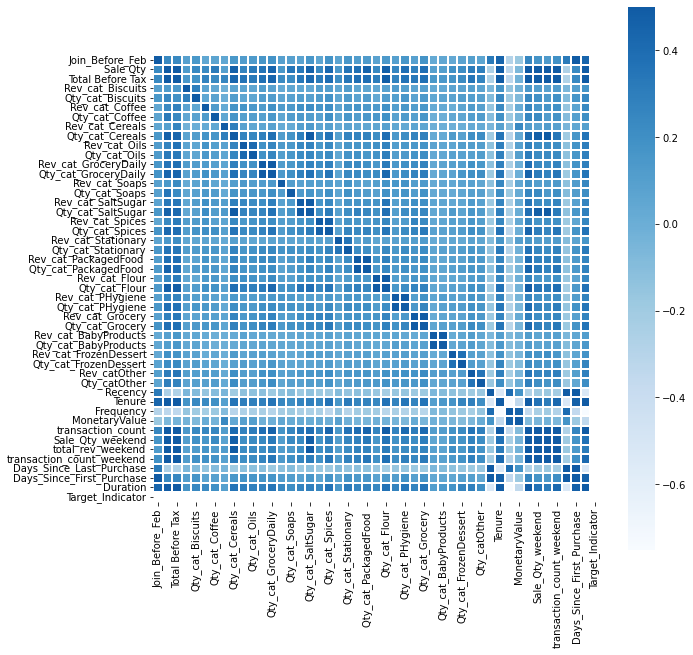

In [303]:
corr = X.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=0.5, center=0,
            square=True, linewidths=2, cmap='Blues')
plt.show()

In [304]:
corr_matrix = corr.abs().unstack().sort_values(ascending=False).drop_duplicates()

pd.set_option('display.max_rows', 1000)
df_cor = corr_matrix.to_frame(name='Corr').sort_values(by = 'Corr',ascending = False)
df_cor_99 =  pd.DataFrame(df_cor[df_cor['Corr']>=0.80])
df_cor_99.iloc[:,0]

Join_Before_Feb            Join_Before_Feb      1.000000
Days_Since_Last_Purchase   Recency              1.000000
transaction_count          Sale Qty             0.936354
Total Before Tax           transaction_count    0.911000
transaction_count_weekend  Sale_Qty_weekend     0.881514
total_rev_weekend          Sale_Qty_weekend     0.857929
Total Before Tax           Sale Qty             0.850783
Name: Corr, dtype: float64

In [305]:
#MultiCollinear Variables - Identify the variables which are multicollinear
def vif_calculation(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return(vif)

from statsmodels.stats.outliers_influence import variance_inflation_factor
multi_collinear = vif_calculation(X).sort_values(by='VIF', ascending=False)
multi_collinear[:10]

/Users/mitchleeson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/mitchleeson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,variables,VIF
45,Duration,inf
44,Days_Since_First_Purchase,inf
43,Days_Since_Last_Purchase,inf
36,Tenure,inf
35,Recency,inf
39,transaction_count,29.781805
1,Sale Qty,21.583128
40,Sale_Qty_weekend,18.402956
42,transaction_count_weekend,11.317027
2,Total Before Tax,11.183708


In [306]:
drop = ['Target_Indicator',
        'Join_Before_Feb',
        'transaction_count',
        #'transaction_count_weekend',
        'Total Before Tax',
        'Sale Qty',
        'Sale_Qty_weekend',
        'total_rev_weekend',
        'Duration',
        'Days_Since_First_Purchase',
        'Days_Since_Last_Purchase',
        'Recency',
        'Tenure',
        'Frequency',
        'MonetaryValue'
]

In [307]:
X1 = X.drop(columns = drop)

In [308]:
X1

,Rev_cat_Biscuits,Qty_cat_Biscuits,Rev_cat_Coffee,Qty_cat_Coffee,Rev_cat_Cereals,Qty_cat_Cereals,Rev_cat_Oils,Qty_cat_Oils,Rev_cat_GroceryDaily,Qty_cat_GroceryDaily,Rev_cat_Soaps,Qty_cat_Soaps,Rev_cat_SaltSugar,Qty_cat_SaltSugar,Rev_cat_Spices,Qty_cat_Spices,Rev_cat_Stationary,Qty_cat_Stationary,Rev_cat_PackagedFood,Qty_cat_PackagedFood,Rev_cat_Flour,Qty_cat_Flour,Rev_cat_PHygiene,Qty_cat_PHygiene,Rev_cat_Grocery,Qty_cat_Grocery,Rev_cat_BabyProducts,Qty_cat_BabyProducts,Rev_cat_FrozenDessert,Qty_cat_FrozenDessert,Rev_catOther,Qty_catOther,transaction_count_weekend
0,7.994717,1.636364,16.703238,1.166667,78.095238,1.0,182.142857,1.0,0.000000,0.0,50.282486,1.333333,55.000000,1.000000,4.464286,2.0,14.285714,1.000000,0.000000,0.0,0.000000,0.000000,19.491525,1.0,8.928571,2.0,0.000000,0.0,14.830508,1.0,0.000000,0.00,11.0
3,16.468478,1.592593,65.887411,1.000000,53.666667,1.0,154.095238,1.0,27.000000,1.0,56.844850,1.153846,37.142857,1.333333,50.211310,2.0,59.932203,1.200000,40.000000,1.0,42.771429,1.200000,49.011299,1.0,55.238095,1.0,21.186441,1.0,24.915254,2.2,77.232143,1.25,20.0
5,0.000000,0.000000,100.000000,1.000000,33.500000,1.0,0.000000,0.0,51.333333,1.0,50.508475,1.333333,34.761905,1.333333,24.761905,1.0,101.002898,1.363636,0.000000,0.0,39.738095,1.000000,58.000000,1.0,27.777778,1.0,0.000000,0.0,29.661017,1.0,10.000000,2.00,0.0
8,4.237288,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,47.619048,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.0
10,14.048628,2.000000,132.646949,1.000000,64.319728,1.0,134.911219,2.0,0.000000,0.0,16.094280,6.750000,33.841270,1.333333,66.736111,1.0,63.140974,1.166667,20.327381,1.5,87.591837,1.285714,33.188458,1.0,59.226190,1.0,0.000000,0.0,0.000000,0.0,97.457627,1.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,16.864407,1.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.0
3451,8.474576,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.0
3452,5.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,55.084746,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.0
3453,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,22.881356,2.333333,0.000000,0.000000,0.000000,0.0,7.627119,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.0


In [309]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_curve,f1_score,auc,confusion_matrix


In [310]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, stratify=y, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1701, 33)
(1701,)
(730, 33)
(730,)


In [311]:
X_traincol = X_train.columns

In [312]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [313]:
import sklearn.metrics as metrics
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

RandomForestClassifier(max_features='auto', max_leaf_nodes=30, n_estimators=500,
                       n_jobs=-1, oob_score=True, random_state=50)

0.7986301369863014


In [314]:
from sklearn.metrics import classification_report

In [315]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.58      0.12      0.20       152
           1       0.81      0.98      0.88       578

    accuracy                           0.80       730
   macro avg       0.69      0.55      0.54       730
weighted avg       0.76      0.80      0.74       730



<Figure size 288x216 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, ' RANDOM FOREST CONFUSION MATRIX')

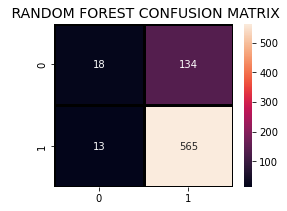

In [316]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

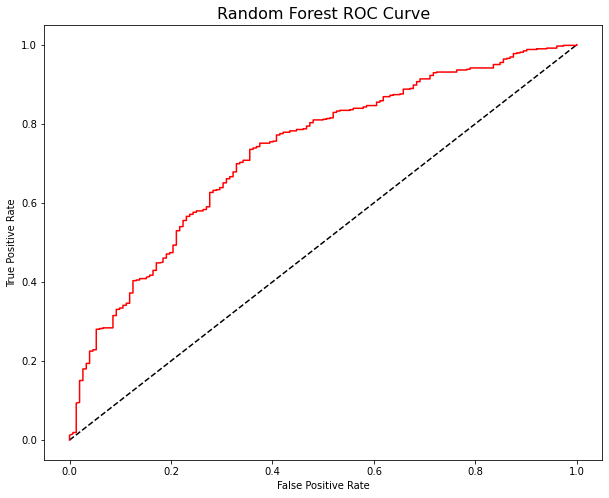

In [317]:

y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

In [318]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

LogisticRegression()

Logistic Regression accuracy is : 0.8


In [319]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.56      0.18      0.28       152
           1       0.82      0.96      0.88       578

    accuracy                           0.80       730
   macro avg       0.69      0.57      0.58       730
weighted avg       0.76      0.80      0.76       730



<Figure size 288x216 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'LOGISTIC REGRESSION CONFUSION MATRIX')

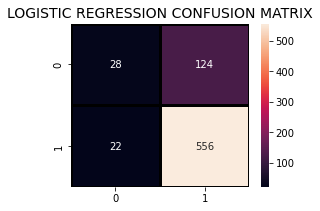

In [320]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

In [321]:
confusion_matrix(y_test, lr_pred)
tn, fp, fn, tp = confusion_matrix(y_test, lr_pred).ravel()
(tn, fp, fn, tp)

array([[ 28, 124],
       [ 22, 556]])

(28, 124, 22, 556)

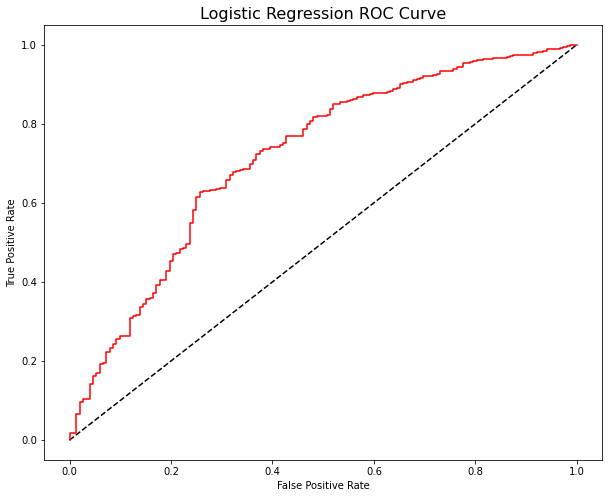

In [322]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

In [323]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

GradientBoostingClassifier()

Gradient Boosting Classifier 0.7863013698630137


In [324]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.47      0.18      0.26       152
           1       0.81      0.95      0.88       578

    accuracy                           0.79       730
   macro avg       0.64      0.56      0.57       730
weighted avg       0.74      0.79      0.75       730



<Figure size 288x216 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Gradient Boosting Classifier Confusion Matrix')

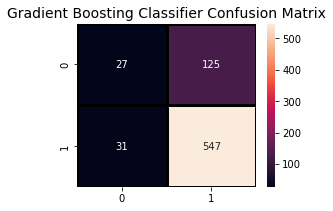

In [325]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

In [326]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf0 = RandomForestClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2),('rf', clf0)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

VotingClassifier(estimators=[('gbc', GradientBoostingClassifier()),
                             ('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier())],
                 voting='soft')

Final Accuracy Score 
0.7945205479452054


In [327]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.52      0.17      0.26       152
           1       0.81      0.96      0.88       578

    accuracy                           0.79       730
   macro avg       0.67      0.56      0.57       730
weighted avg       0.75      0.79      0.75       730



<Figure size 288x216 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'FINAL CONFUSION MATRIX')

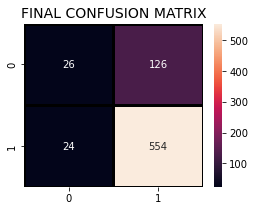

In [328]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()


In [329]:
from sklearn.inspection import permutation_importance
perm = permutation_importance(eclf1, X_train, y_train)

In [330]:
perm.importances_mean

array([0.00776014, 0.00999412, 0.00529101, 0.00282187, 0.00493827,
       0.00340976, 0.00728983, 0.00329218, 0.00470312, 0.0021164 ,
       0.01034685, 0.00705467, 0.00940623, 0.0021164 , 0.00705467,
       0.00705467, 0.01128748, 0.0031746 , 0.00117578, 0.00152851,
       0.01740153, 0.00505585, 0.00529101, 0.0021164 , 0.00552616,
       0.00141093, 0.0010582 , 0.0010582 , 0.0042328 , 0.00529101,
       0.01375661, 0.01869489, 0.01951793])

In [331]:
# sorted_idx

NameError: name 'sorted_idx' is not defined

<BarContainer object of 10 artists>

([<matplotlib.axis.YTick at 0x7f8aae6ae070>,
 [Text(0, 0, 'Rev_cat_Oils'),
  Text(0, 1, 'Rev_cat_Biscuits'),
  Text(0, 2, 'Rev_cat_SaltSugar'),
  Text(0, 3, 'Qty_cat_Biscuits'),
  Text(0, 4, 'Rev_cat_Soaps'),
  Text(0, 5, 'Rev_cat_Stationary'),
  Text(0, 6, 'Rev_catOther'),
  Text(0, 7, 'Rev_cat_Flour'),
  Text(0, 8, 'Qty_catOther'),
  Text(0, 9, 'transaction_count_weekend')])

Text(0.5, 1.0, 'Permutation Importance')

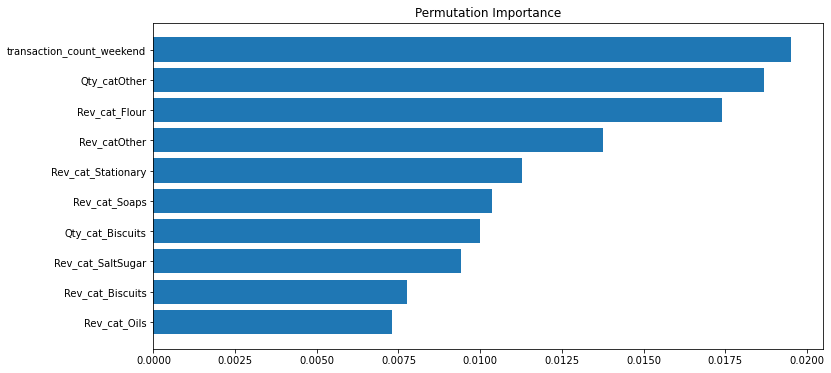

In [332]:
sorted_idx = perm.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(10), perm.importances_mean[sorted_idx[-10:]], align='center')
plt.yticks(range(10), np.array(X_traincol)[sorted_idx[-10:]])
plt.title('Permutation Importance')

In [333]:
#Prediction

In [334]:
customermap

,Customer code
0,MDY/001/0001
1,MDY/001/0002
2,MDY/001/0003
3,MDY/001/0004
4,MDY/001/0005
...,...
3450,MDY/001/3507
3451,MDY/001/3508
3452,MDY/001/3509
3453,MDY/001/3510


In [335]:
y_target

,Join_Before_Feb,Sale Qty,Total Before Tax,Rev_cat_Biscuits,Qty_cat_Biscuits,Rev_cat_Coffee,Qty_cat_Coffee,Rev_cat_Cereals,Qty_cat_Cereals,Rev_cat_Oils,Qty_cat_Oils,Rev_cat_GroceryDaily,Qty_cat_GroceryDaily,Rev_cat_Soaps,Qty_cat_Soaps,Rev_cat_SaltSugar,Qty_cat_SaltSugar,Rev_cat_Spices,Qty_cat_Spices,Rev_cat_Stationary,Qty_cat_Stationary,Rev_cat_PackagedFood,Qty_cat_PackagedFood,Rev_cat_Flour,Qty_cat_Flour,Rev_cat_PHygiene,Qty_cat_PHygiene,Rev_cat_Grocery,Qty_cat_Grocery,Rev_cat_BabyProducts,Qty_cat_BabyProducts,Rev_cat_FrozenDessert,Qty_cat_FrozenDessert,Rev_catOther,Qty_catOther,Recency,Tenure,Frequency,MonetaryValue,transaction_count,Sale_Qty_weekend,total_rev_weekend,transaction_count_weekend,Days_Since_Last_Purchase,Days_Since_First_Purchase,Duration,Target_Indicator
1,1,813.0,16375.722054,10.485086,1.347826,36.629077,15.681818,105.321839,1.103448,204.706960,1.307692,46.056878,1.000000,56.441095,4.688525,28.787879,1.454545,75.846772,1.050000,68.194051,1.142857,45.833333,1.000000,114.380952,1.125000,91.251246,1.058824,68.744956,1.000000,0.0,0.0,0.000000,0.000000,37.877976,1.250000,3.0,302.0,0.172185,62.817020,240.0,336.0,7231.0,90.0,-28.0,273.0,301.0,1
2,1,274.0,13553.078521,44.545964,1.333333,103.269011,1.437500,141.892269,1.130435,165.554659,1.333333,78.500000,1.000000,31.926150,3.185185,36.734694,1.714286,55.741715,1.937500,92.099388,1.130435,63.660714,1.000000,41.695238,1.200000,84.205355,1.000000,65.373509,1.000000,0.0,0.0,52.754237,1.500000,71.372074,1.000000,6.0,285.0,0.115789,55.060912,171.0,128.0,6276.0,69.0,-25.0,259.0,284.0,1
4,1,659.0,32540.913459,18.644993,1.500000,100.839736,1.538462,63.237265,1.246377,160.215506,1.636364,51.665574,1.684211,94.435573,1.530120,33.800454,1.142857,75.571170,1.083333,52.012741,1.904762,45.144942,1.333333,50.844720,1.217391,77.268849,1.103448,58.217180,1.210526,0.0,0.0,53.753027,1.285714,32.977743,1.134615,6.0,255.0,0.219608,151.733451,473.0,182.0,10788.0,117.0,-25.0,229.0,254.0,1
6,1,441.0,16281.044946,14.939425,1.515152,78.119679,1.666667,57.088828,1.410256,147.633929,1.750000,40.388889,1.000000,53.646932,1.873239,17.571429,1.214286,37.542749,1.272727,80.148273,1.193548,23.353175,1.833333,42.796825,1.266667,98.062954,1.142857,30.565837,1.142857,0.0,0.0,0.000000,0.000000,44.774684,1.000000,13.0,266.0,0.101504,77.042820,294.0,309.0,17555.0,205.0,-18.0,247.0,265.0,1
7,1,896.0,34648.786037,23.670427,1.595745,47.825298,2.419355,111.620106,1.022222,182.208018,1.387097,69.925096,1.181818,47.616891,3.597015,42.978304,1.047619,56.532886,1.134328,60.023465,1.218182,41.428571,1.000000,62.906926,1.136364,70.127895,1.192308,55.320599,1.148148,0.0,0.0,37.999395,1.800000,67.842971,1.142857,6.0,297.0,0.265993,133.884175,563.0,168.0,9753.0,100.0,-25.0,271.0,296.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,0,5.0,143.437248,12.719431,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,109.523810,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,8.474576,1.000000,31.0,7.0,0.285714,21.700000,4.0,5.0,164.0,4.0,0.0,6.0,6.0,1
2876,0,2.0,258.005448,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,174.107143,1.000000,83.898305,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,31.0,1.0,1.000000,258.010000,2.0,2.0,294.0,2.0,0.0,0.0,0.0,1
2877,0,18.0,647.441485,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.610169,2.500000,0.000000,0.000000,0.000000,0.000000,15.254237,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.238095,1.000000,0.0,0.0,40.254237,2.000000,110.000000,1.000000,31.0,1.0,1.000000,838.960000,

In [336]:
y_target1 = y_target.drop(columns = drop)

In [337]:
predictions = eclf1.predict(y_target1)

/Users/mitchleeson/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/Users/mitchleeson/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/mitchleeson/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [338]:
index = y_target.index.tolist()
index

[1,
 2,
 4,
 6,
 7,
 9,
 12,
 13,
 14,
 15,
 17,
 19,
 21,
 27,
 29,
 31,
 38,
 39,
 40,
 41,
 42,
 44,
 47,
 48,
 50,
 51,
 52,
 53,
 54,
 55,
 61,
 62,
 63,
 64,
 68,
 69,
 70,
 74,
 75,
 76,
 77,
 79,
 80,
 82,
 83,
 84,
 85,
 88,
 89,
 90,
 93,
 94,
 96,
 100,
 101,
 103,
 104,
 105,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 115,
 117,
 120,
 122,
 123,
 124,
 125,
 128,
 129,
 130,
 132,
 134,
 135,
 136,
 138,
 140,
 141,
 144,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 156,
 157,
 158,
 159,
 162,
 163,
 164,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 179,
 180,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 192,
 195,
 196,
 198,
 199,
 201,
 205,
 206,
 211,
 212,
 213,
 214,
 217,
 220,
 223,
 226,
 227,
 228,
 229,
 230,
 232,
 233,
 234,
 236,
 238,
 241,
 242,
 243,
 245,
 247,
 248,
 249,
 251,
 253,
 254,
 256,
 257,
 258,
 263,
 265,
 266,
 267,
 268,
 271,
 273,
 274,
 276,
 280,
 281,
 285,
 286,
 287,
 289,
 290,
 295,
 296,
 297,
 299,
 300,
 301,
 307,
 31

In [339]:
predFin = pd.DataFrame(predictions)
predFin['index'] = index
predFin = predFin.rename(columns={0: "Churn?"})
predFin.set_index('index',inplace = True)

fin1 = pd.merge(predFin,customermap,left_index=True,right_index=True, how='inner')

fin1


,Churn?,Customer code
1,0,MDY/001/0002
2,0,MDY/001/0003
4,0,MDY/001/0005
6,0,MDY/001/0007
7,0,MDY/001/0008
...,...,...
2875,0,MDY/001/2915
2876,0,MDY/001/2916
2877,0,MDY/001/2918
2878,0,MDY/001/2919


In [340]:
 lst = ['Customer code',
     'Rev_cat_Oils',
'Qty_cat_Biscuits',
'Rev_cat_Soaps',
'Rev_cat_Spices',
'Rev_cat_SaltSugar',
'Rev_cat_Stationary',
'Rev_catOther',
'Rev_cat_Flour',
'Qty_catOther',
'transaction_count_weekend'
]

In [341]:
fin2 = pd.merge(fin1,df_fin[lst],on = 'Customer code',how = 'left')
fin2

,Churn?,Customer code,Rev_cat_Oils,Qty_cat_Biscuits,Rev_cat_Soaps,Rev_cat_Spices,Rev_cat_SaltSugar,Rev_cat_Stationary,Rev_catOther,Rev_cat_Flour,Qty_catOther,transaction_count_weekend
0,0,MDY/001/0002,204.706960,1.347826,56.441095,75.846772,28.787879,68.194051,37.877976,114.380952,1.250000,90.0
1,0,MDY/001/0003,165.554659,1.333333,31.926150,55.741715,36.734694,92.099388,71.372074,41.695238,1.000000,69.0
2,0,MDY/001/0005,160.215506,1.500000,94.435573,75.571170,33.800454,52.012741,32.977743,50.844720,1.134615,117.0
3,0,MDY/001/0007,147.633929,1.515152,53.646932,37.542749,17.571429,80.148273,44.774684,42.796825,1.000000,205.0
4,0,MDY/001/0008,182.208018,1.595745,47.616891,56.532886,42.978304,60.023465,67.842971,62.906926,1.142857,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1019,0,MDY/001/2915,0.000000,1.500000,0.000000,109.523810,0.000000,0.000000,8.474576,0.000000,1.000000,4.0
1020,0,MDY/001/2916,0.000000,0.000000,0.000000,174.107143,0.000000,83.898305,0.000000,0.000000,0.000000,2.0
1021,0,MDY/001/2918,0.000000,0.000000,96.610169,0.000000,0.000000,15.254237,110.000000,0.000000,1.000000,9.0
1022,0,MDY/001/2919,139.925595,2.473684,98.474576,47.793651,24.775510,44.198340,30.448614,37.630952,1.833333,48.0
